In [1]:
import json

with open("./params.json", mode = "r", encoding = "utf-8") as f:
    data = json.load(f)
    model_path = data["model_path"]
    dataset_path_train = data["dataset_path"]["train"]
    dataset_path_test = data["dataset_path"]["test"]
    num_single_sample_timesteps = data["num_single_sample_timesteps"]
    input_window_length = data["input_window_length"]
    label_window_length = data["label_window_length"]
    input_features = data["input_features"]
    label_features = data["label_features"]

    # Usually window_stride = 1 since we want to check each input window
    window_stride = 20
    seed_val = 0

In [2]:
import torch
import random
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

torch.manual_seed(seed_val)
random.seed(seed_val)
np.random.seed(seed_val)

In [3]:
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

from utils.pipeline.Model import TimeSeriesHuggingFaceTransformer
from utils.pipeline.Data import get_mean_std_respected_temporal, WindowedIterableDataset
from utils.pipeline.Run import autoregress

/users/labnet5/gr5/abahari/Documents/Thesis/src/thesis/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# stats = get_mean_std_respected_temporal(
#     dataset_path = dataset_path_train,
#     cols = input_features
# )

input_stats = get_mean_std_respected_temporal(
    dataset_path = dataset_path_train,
    cols = input_features,
    num_single_sample_timesteps = num_single_sample_timesteps,
    input_window_len = input_window_length,
    label_window_len = label_window_length,
    window_stride = window_stride
)
if(set(input_features) == set(label_features)):
    output_stats = input_stats
else:
    output_stats = get_mean_std_respected_temporal(
        dataset_path = dataset_path_train,
        cols = label_features,
        num_single_sample_timesteps = num_single_sample_timesteps,
        input_window_len = input_window_length,
        label_window_len = label_window_length,
        window_stride = window_stride
    )

df_test = WindowedIterableDataset(
    dataset_path = dataset_path_test,
    input_stats = input_stats,
    label_stats = output_stats,
    input_features = input_features,
    label_features = label_features,
    num_single_sample_timesteps = num_single_sample_timesteps,
    stride = window_stride,
    input_window_length = input_window_length,
    label_window_length = label_window_length,
    inference = True
)

data_loader_test = DataLoader(
    df_test,
    batch_size = 1,    # One windowed datapoint at a time
    pin_memory = True
)

## Prediction

In [5]:
model = torch.load(model_path, weights_only = False).to(device)
model.eval()

TimeSeriesHuggingFaceTransformer(
  (shared): Embedding(1, 128)
  (encoder): T5Stack(
    (embed_tokens): Linear(in_features=6, out_features=128, bias=True)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=128, out_features=128, bias=False)
              (k): Linear(in_features=128, out_features=128, bias=False)
              (v): Linear(in_features=128, out_features=128, bias=False)
              (o): Linear(in_features=128, out_features=128, bias=False)
              (relative_attention_bias): Embedding(64, 8)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseActDense(
              (wi): Linear(in_features=128, out_features=64, bias=False)
              (wo): Linear(in_features=64, out_features=128, bias=False)
  

0it [00:00, ?it/s, single_test_loss=6.423570]

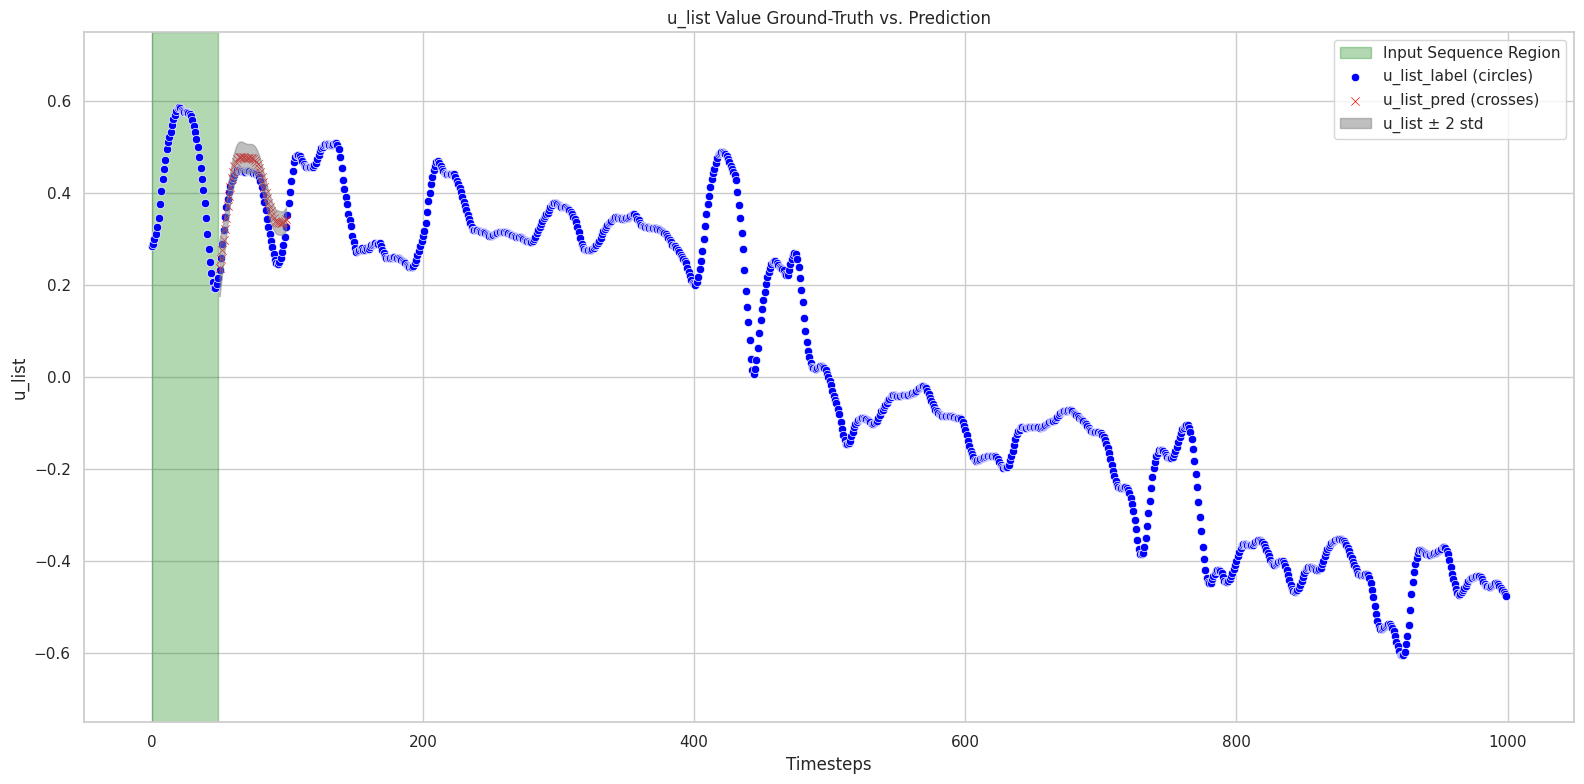

47it [00:00, 83.18it/s, single_test_loss=24.553337]

Output Timestep 51
    Input Timesteps [47 46 45 48 49 44 50 43  7  8]
    Scores ['0.02955', '0.02891', '0.02681', '0.02547', '0.02456', '0.02451', '0.02401', '0.02180', '0.02148', '0.02120']

Output Timestep 52
    Input Timesteps [47 46 45 48 44 49 50 43 42 27]
    Scores ['0.03040', '0.02966', '0.02761', '0.02627', '0.02542', '0.02509', '0.02455', '0.02275', '0.02204', '0.02093']

Output Timestep 53
    Input Timesteps [47 46 45 44 48 49 50 43 42 40]
    Scores ['0.02971', '0.02956', '0.02785', '0.02595', '0.02542', '0.02385', '0.02349', '0.02338', '0.02284', '0.02180']

Output Timestep 54
    Input Timesteps [46 47 45 44 48 43 42 49 50 40]
    Scores ['0.02864', '0.02827', '0.02735', '0.02579', '0.02421', '0.02344', '0.02304', '0.02266', '0.02249', '0.02245']

Output Timestep 55
    Input Timesteps [46 47 45 44 48 43 42 40 28 49]
    Scores ['0.02747', '0.02682', '0.02646', '0.02516', '0.02321', '0.02301', '0.02269', '0.02249', '0.02193', '0.02185']

Output Timestep 56
    Input T

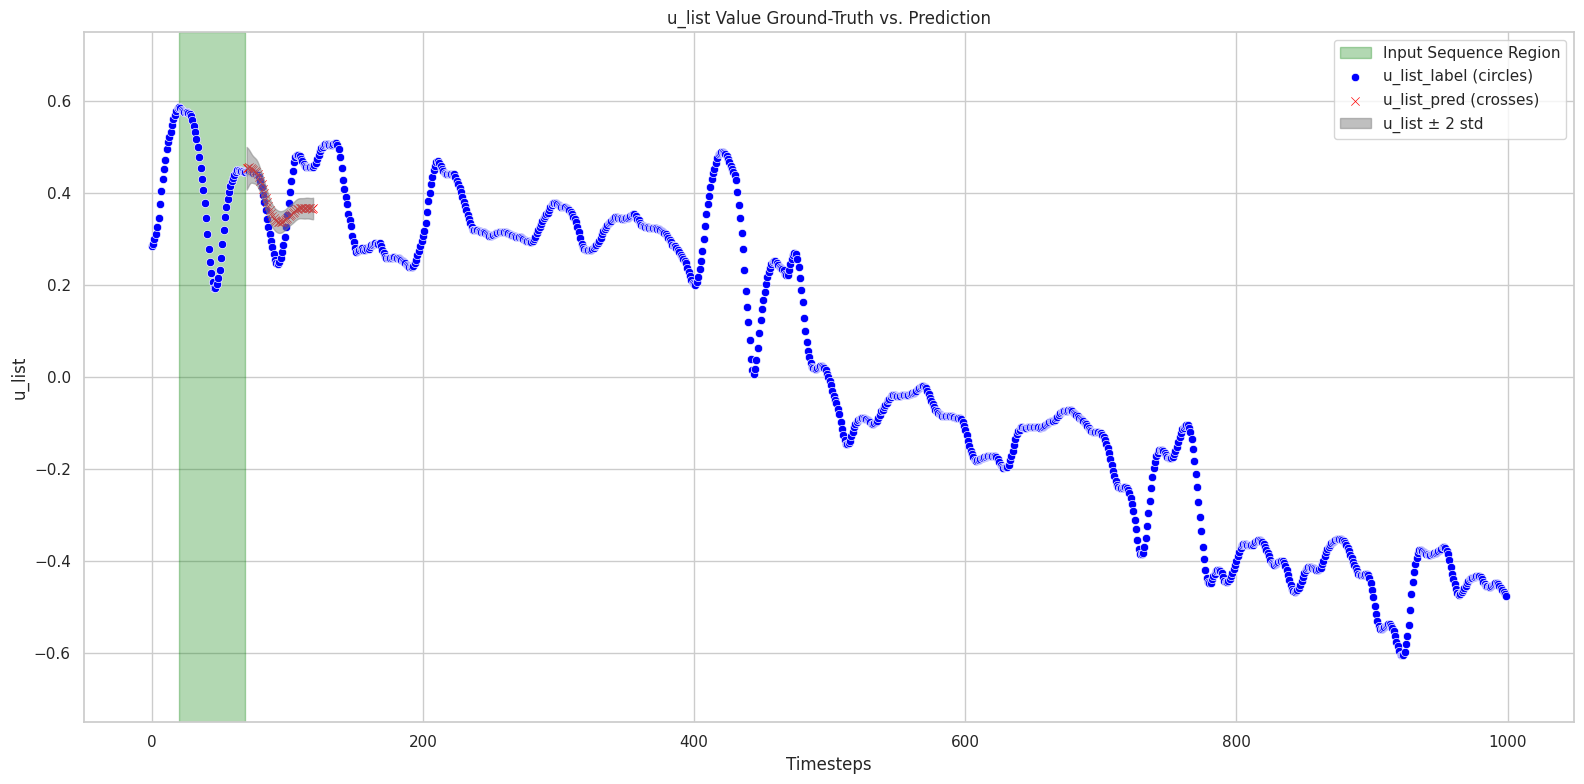

47it [00:01, 83.18it/s, single_test_loss=40.726448]

Output Timestep 71
    Input Timesteps [69 68 70 67 66 64 65 63 62 61]
    Scores ['0.04072', '0.04012', '0.03902', '0.03021', '0.02823', '0.02630', '0.02608', '0.02460', '0.02454', '0.02357']

Output Timestep 72
    Input Timesteps [69 68 70 67 66 65 64 63 62 61]
    Scores ['0.03932', '0.03930', '0.03785', '0.03144', '0.02955', '0.02732', '0.02732', '0.02548', '0.02522', '0.02413']

Output Timestep 73
    Input Timesteps [68 69 70 67 66 65 64 63 62 61]
    Scores ['0.03582', '0.03527', '0.03424', '0.03142', '0.03010', '0.02811', '0.02805', '0.02626', '0.02587', '0.02473']

Output Timestep 74
    Input Timesteps [68 69 67 66 70 65 64 63 62 61]
    Scores ['0.03120', '0.03027', '0.03022', '0.02969', '0.02964', '0.02818', '0.02817', '0.02659', '0.02619', '0.02510']

Output Timestep 75
    Input Timesteps [66 67 64 65 68 63 62 69 70 61]
    Scores ['0.02847', '0.02831', '0.02761', '0.02752', '0.02683', '0.02641', '0.02609', '0.02579', '0.02540', '0.02520']

Output Timestep 76
    Input T

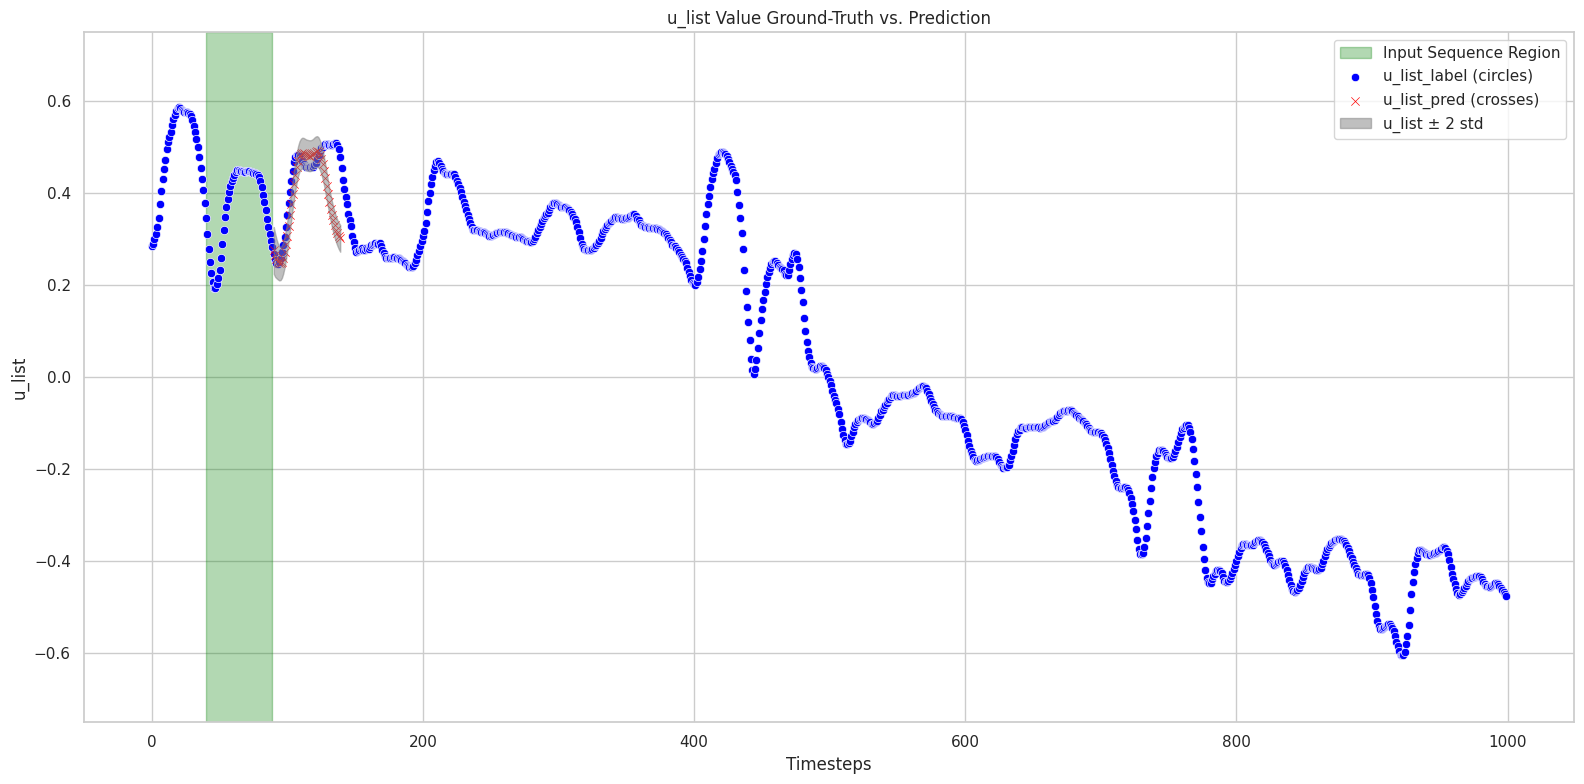

47it [00:01, 83.18it/s, single_test_loss=201.960480]

Output Timestep 91
    Input Timesteps [89 87 88 90 86 84 85 83 82 81]
    Scores ['0.03551', '0.03456', '0.03455', '0.03332', '0.03282', '0.03139', '0.03135', '0.03030', '0.02958', '0.02850']

Output Timestep 92
    Input Timesteps [89 87 88 90 86 84 85 83 82 81]
    Scores ['0.03348', '0.03288', '0.03269', '0.03208', '0.03158', '0.03075', '0.03050', '0.03002', '0.02952', '0.02864']

Output Timestep 93
    Input Timesteps [87 86 84 88 83 82 85 89 81 90]
    Scores ['0.03059', '0.02987', '0.02981', '0.02962', '0.02951', '0.02931', '0.02930', '0.02928', '0.02873', '0.02807']

Output Timestep 94
    Input Timesteps [82 83 84 81 87 86 85 80 88 89]
    Scores ['0.02842', '0.02833', '0.02825', '0.02813', '0.02795', '0.02774', '0.02758', '0.02700', '0.02628', '0.02486']

Output Timestep 95
    Input Timesteps [82 81 83 84 80 85 86 87 79 88]
    Scores ['0.02729', '0.02719', '0.02703', '0.02670', '0.02634', '0.02597', '0.02589', '0.02585', '0.02437', '0.02397']

Output Timestep 96
    Input T

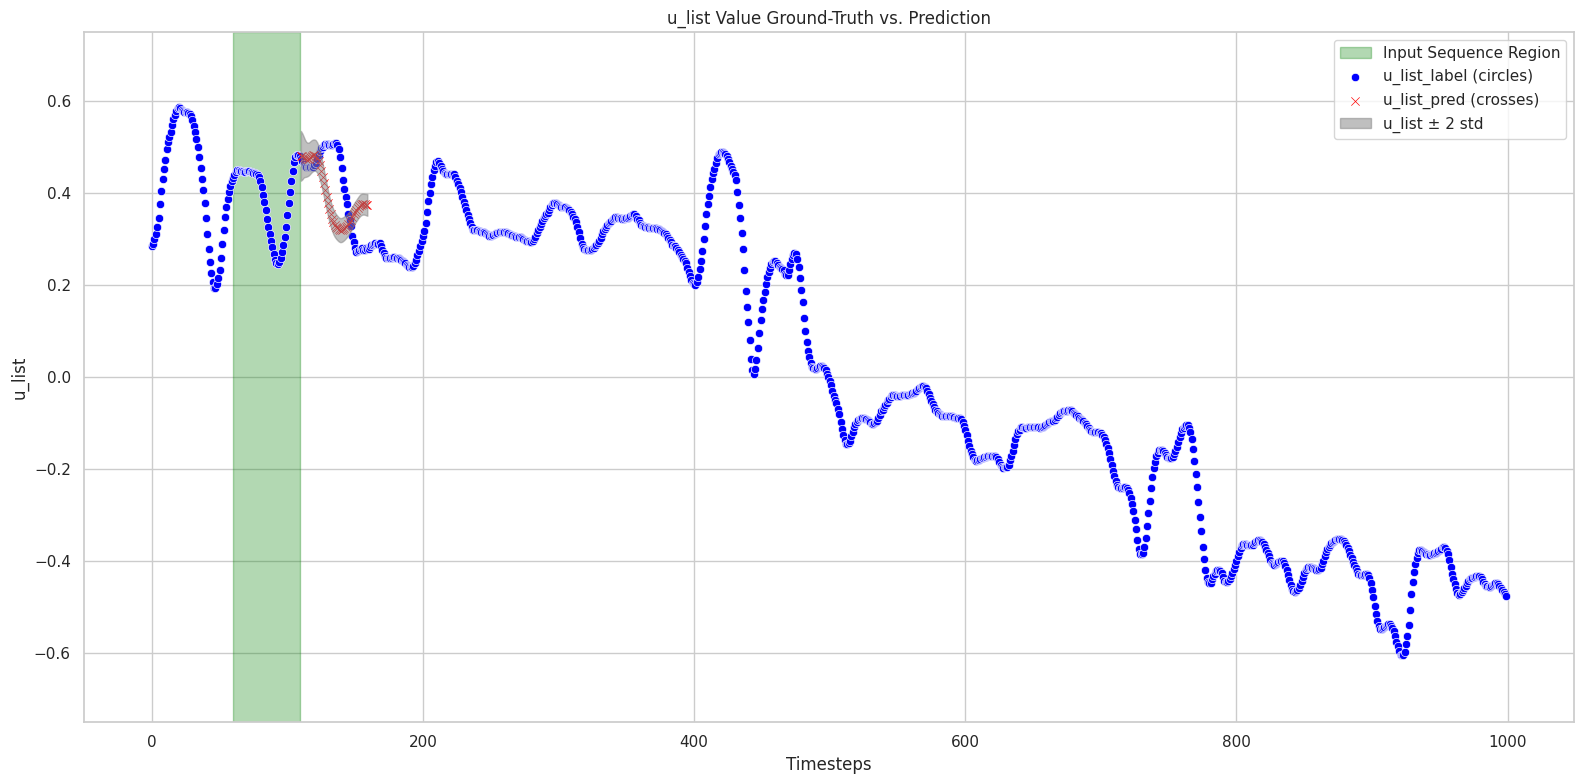

47it [00:01, 83.18it/s, single_test_loss=90.188271] 

Output Timestep 111
    Input Timesteps [107 106 108 105 109 104 110 103 102 101]
    Scores ['0.03450', '0.03419', '0.03399', '0.03196', '0.03123', '0.02983', '0.02917', '0.02855', '0.02811', '0.02643']

Output Timestep 112
    Input Timesteps [107 106 108 105 109 104 110 103 102 101]
    Scores ['0.03331', '0.03322', '0.03301', '0.03129', '0.03068', '0.02940', '0.02906', '0.02815', '0.02764', '0.02611']

Output Timestep 113
    Input Timesteps [106 107 108 105 109 104 110 103 102 101]
    Scores ['0.03133', '0.03104', '0.03072', '0.02981', '0.02904', '0.02839', '0.02797', '0.02727', '0.02672', '0.02519']

Output Timestep 114
    Input Timesteps [106 107 108 105 109 104 110 103  94 102]
    Scores ['0.02888', '0.02838', '0.02806', '0.02780', '0.02700', '0.02680', '0.02644', '0.02581', '0.02568', '0.02523']

Output Timestep 115
    Input Timesteps [106 107  94 108 105  93 109 104  92 110]
    Scores ['0.02657', '0.02604', '0.02593', '0.02579', '0.02577', '0.02535', '0.02516', '0.02503'

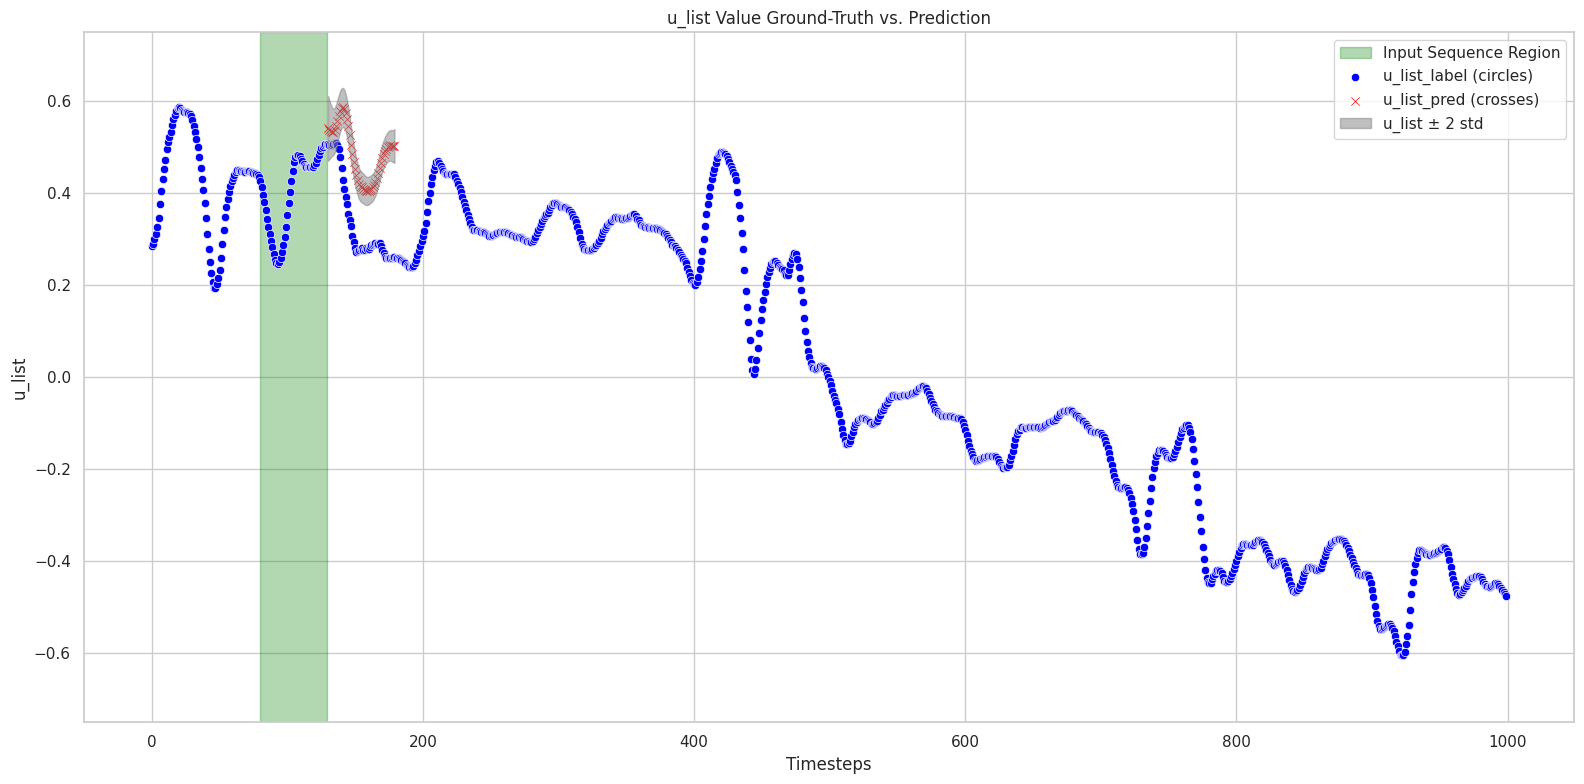

47it [00:01, 83.18it/s, single_test_loss=28.130764]

Output Timestep 131
    Input Timesteps [129 128 130 127 126 125 123 124 112 122]
    Scores ['0.03564', '0.03521', '0.03377', '0.03081', '0.02859', '0.02640', '0.02613', '0.02550', '0.02326', '0.02316']

Output Timestep 132
    Input Timesteps [129 128 130 127 126 125 123 124 112 122]
    Scores ['0.03614', '0.03609', '0.03344', '0.03133', '0.02885', '0.02678', '0.02605', '0.02579', '0.02346', '0.02341']

Output Timestep 133
    Input Timesteps [128 129 130 127 126 125 123 124 122 112]
    Scores ['0.03491', '0.03424', '0.03127', '0.03111', '0.02909', '0.02725', '0.02631', '0.02627', '0.02380', '0.02379']

Output Timestep 134
    Input Timesteps [128 129 127 126 130 125 124 123 112 122]
    Scores ['0.03224', '0.03109', '0.03005', '0.02897', '0.02843', '0.02746', '0.02658', '0.02652', '0.02412', '0.02411']

Output Timestep 135
    Input Timesteps [128 126 127 129 125 124 123 130 112 122]
    Scores ['0.02904', '0.02847', '0.02846', '0.02764', '0.02728', '0.02658', '0.02650', '0.02552'

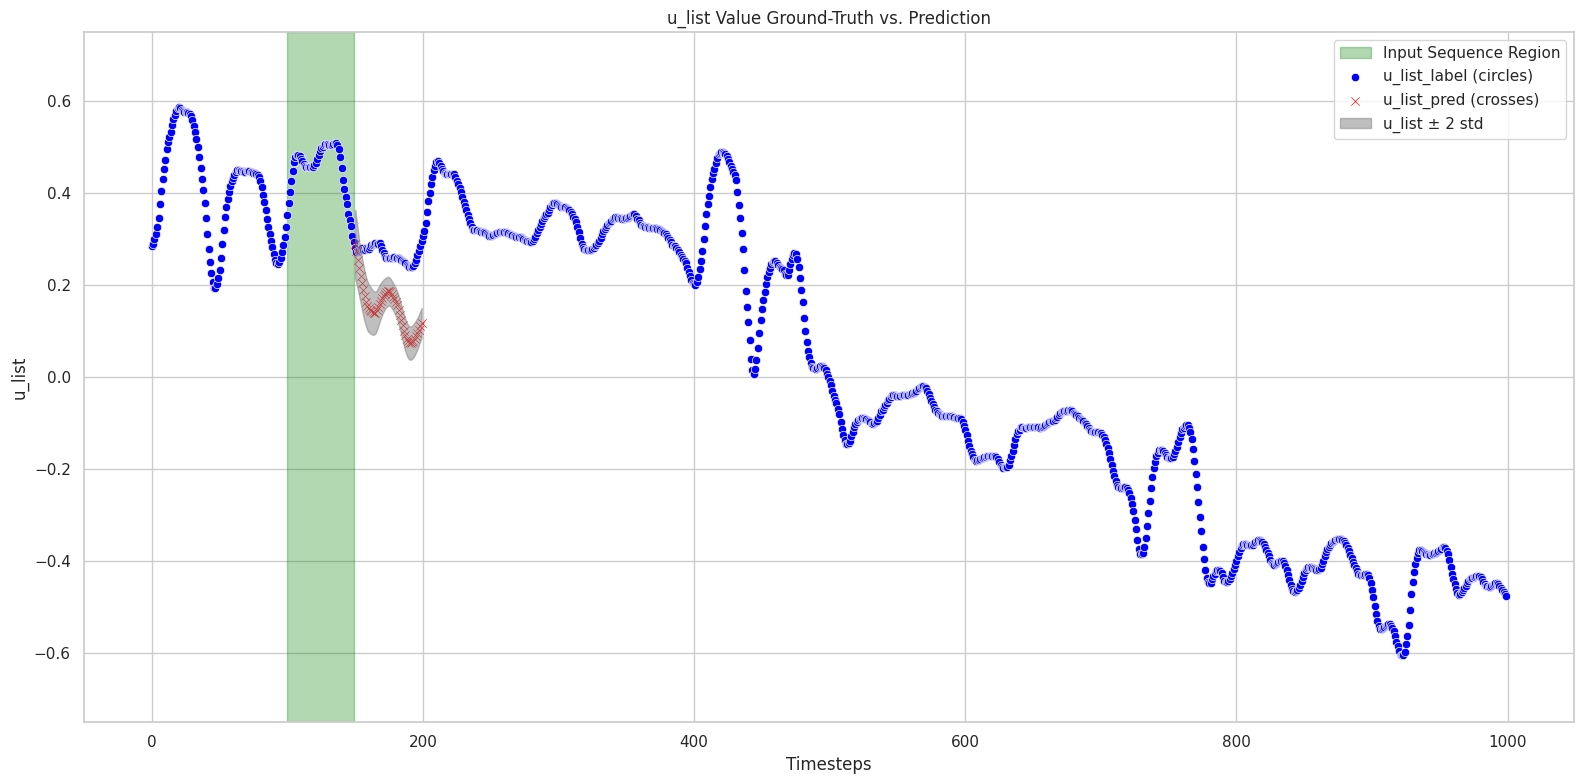

47it [00:02, 83.18it/s, single_test_loss=38.406246]

Output Timestep 151
    Input Timesteps [149 150 148 147 146 145 144 143 142 141]
    Scores ['0.03887', '0.03747', '0.03496', '0.03252', '0.03051', '0.02922', '0.02795', '0.02743', '0.02683', '0.02505']

Output Timestep 152
    Input Timesteps [149 150 148 147 146 145 144 143 142 141]
    Scores ['0.03787', '0.03639', '0.03474', '0.03263', '0.03071', '0.02946', '0.02817', '0.02759', '0.02696', '0.02521']

Output Timestep 153
    Input Timesteps [149 150 148 147 146 145 144 143 142 141]
    Scores ['0.03488', '0.03339', '0.03290', '0.03143', '0.02990', '0.02893', '0.02784', '0.02735', '0.02680', '0.02527']

Output Timestep 154
    Input Timesteps [149 148 150 147 146 145 144 143 142 141]
    Scores ['0.03121', '0.03024', '0.02979', '0.02944', '0.02839', '0.02774', '0.02692', '0.02656', '0.02615', '0.02497']

Output Timestep 155
    Input Timesteps [149 148 147 146 150 145 144 143 142 141]
    Scores ['0.02772', '0.02747', '0.02717', '0.02653', '0.02646', '0.02614', '0.02556', '0.02531'

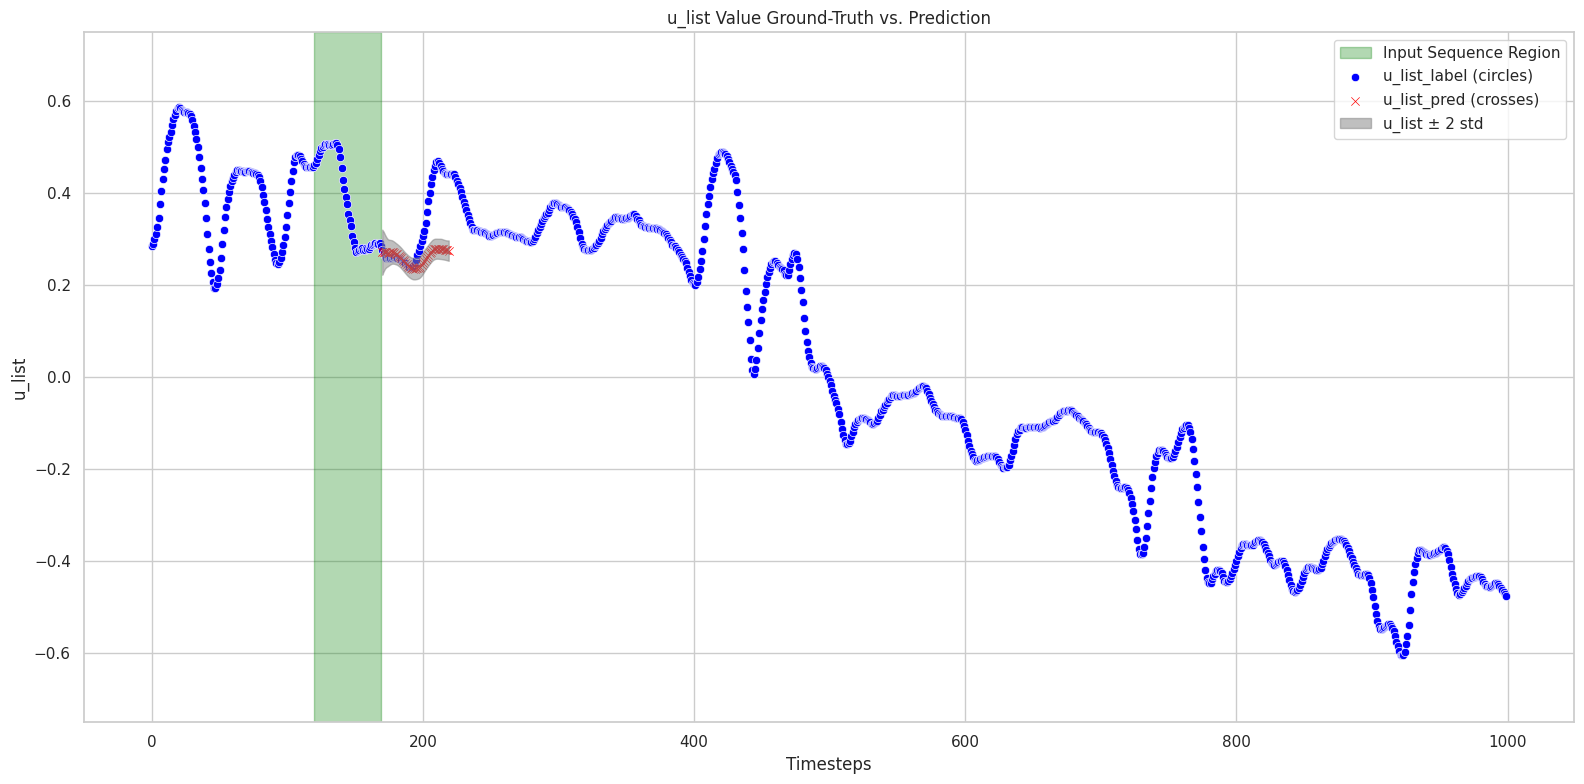

47it [00:02, 83.18it/s, single_test_loss=30.589663]

Output Timestep 171
    Input Timesteps [167 166 168 164 165 159 162 163 160 158]
    Scores ['0.02754', '0.02712', '0.02674', '0.02664', '0.02654', '0.02647', '0.02632', '0.02627', '0.02620', '0.02617']

Output Timestep 172
    Input Timesteps [167 166 159 168 164 158 162 156 165 160]
    Scores ['0.02734', '0.02695', '0.02688', '0.02671', '0.02670', '0.02664', '0.02659', '0.02658', '0.02657', '0.02654']

Output Timestep 173
    Input Timesteps [159 158 156 160 162 161 155 163 164 166]
    Scores ['0.02680', '0.02664', '0.02663', '0.02646', '0.02635', '0.02630', '0.02630', '0.02615', '0.02612', '0.02603']

Output Timestep 174
    Input Timesteps [159 158 156 160 155 161 162 157 154 163]
    Scores ['0.02624', '0.02613', '0.02613', '0.02593', '0.02579', '0.02576', '0.02564', '0.02558', '0.02557', '0.02534']

Output Timestep 175
    Input Timesteps [159 158 156 160 155 161 157 154 162 153]
    Scores ['0.02543', '0.02537', '0.02536', '0.02514', '0.02503', '0.02498', '0.02496', '0.02486'

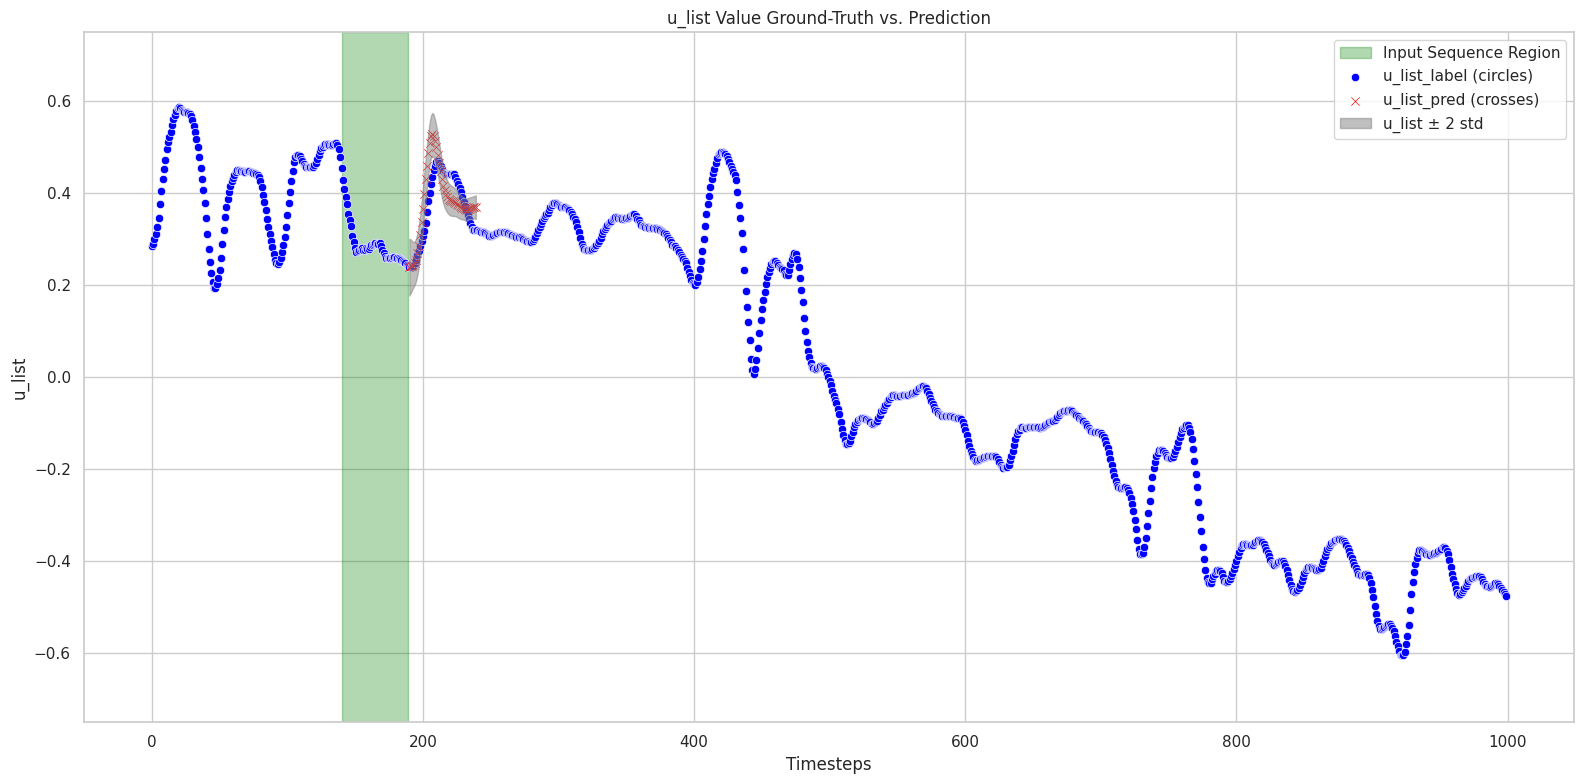

47it [00:02, 83.18it/s, single_test_loss=35.042557]

Output Timestep 191
    Input Timesteps [188 187 186 189 185 190 184 183 145 144]
    Scores ['0.03118', '0.03085', '0.03034', '0.02988', '0.02928', '0.02873', '0.02692', '0.02418', '0.02125', '0.02118']

Output Timestep 192
    Input Timesteps [186 187 188 185 189 190 184 183 145 144]
    Scores ['0.02878', '0.02861', '0.02826', '0.02823', '0.02727', '0.02683', '0.02608', '0.02351', '0.02110', '0.02095']

Output Timestep 193
    Input Timesteps [186 185 187 184 188 189 190 183 170 172]
    Scores ['0.02684', '0.02683', '0.02601', '0.02518', '0.02501', '0.02405', '0.02398', '0.02309', '0.02152', '0.02129']

Output Timestep 194
    Input Timesteps [185 186 184 187 188 183 190 189 170 171]
    Scores ['0.02552', '0.02518', '0.02431', '0.02408', '0.02297', '0.02266', '0.02225', '0.02219', '0.02211', '0.02172']

Output Timestep 195
    Input Timesteps [185 186 184 187 170 183 171 169 188 175]
    Scores ['0.02454', '0.02403', '0.02357', '0.02291', '0.02250', '0.02225', '0.02204', '0.02202'

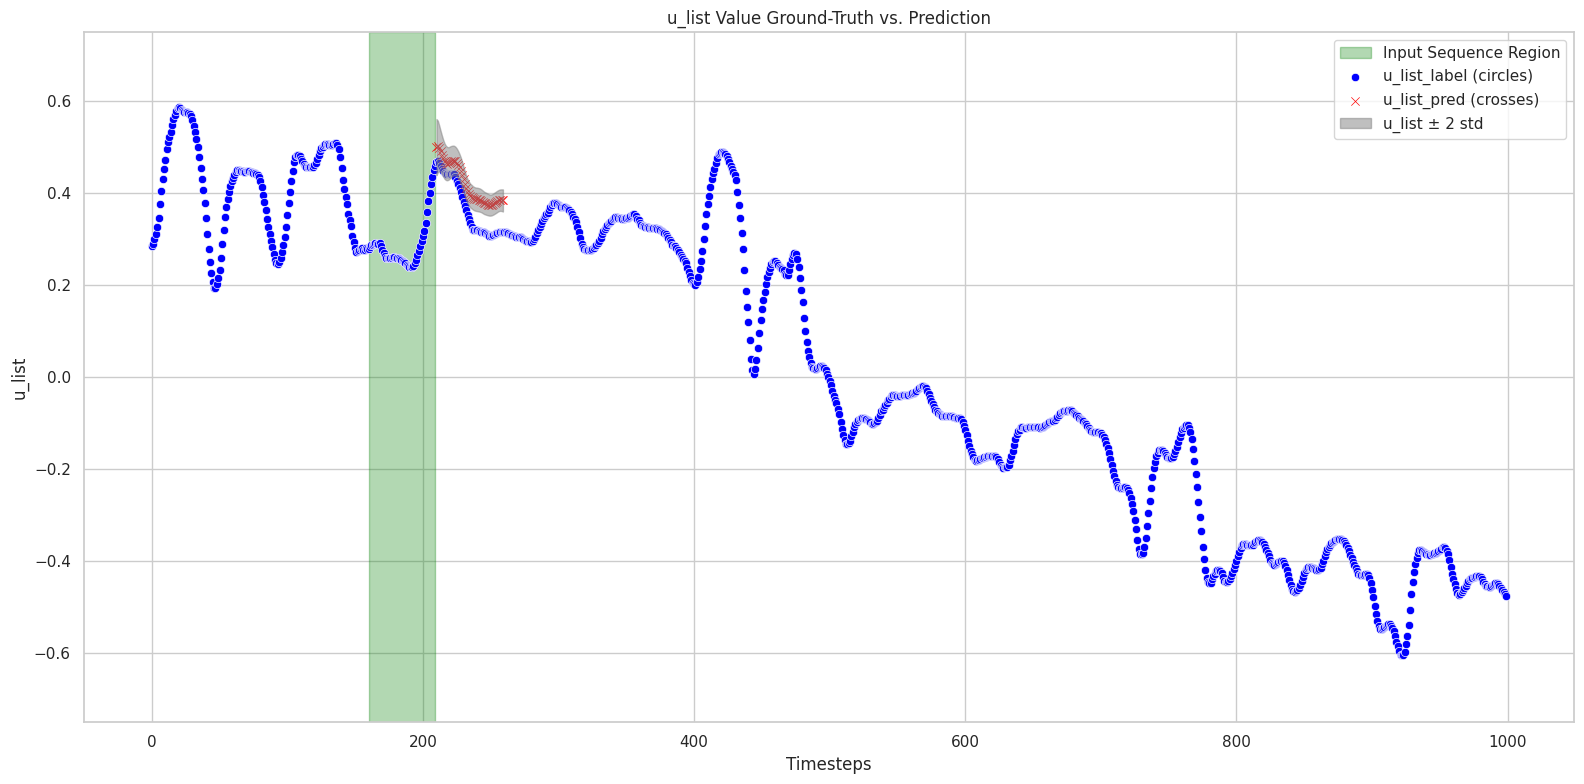

47it [00:03, 83.18it/s, single_test_loss=7.722723] 

Output Timestep 211
    Input Timesteps [208 209 207 210 206 204 203 202 205 201]
    Scores ['0.03683', '0.03624', '0.03226', '0.03222', '0.02769', '0.02633', '0.02619', '0.02616', '0.02607', '0.02519']

Output Timestep 212
    Input Timesteps [208 209 210 207 206 204 205 203 202 201]
    Scores ['0.03657', '0.03641', '0.03243', '0.03169', '0.02742', '0.02598', '0.02590', '0.02585', '0.02572', '0.02485']

Output Timestep 213
    Input Timesteps [208 209 207 210 206 204 205 203 202 201]
    Scores ['0.03414', '0.03393', '0.03051', '0.03039', '0.02736', '0.02622', '0.02615', '0.02609', '0.02591', '0.02507']

Output Timestep 214
    Input Timesteps [208 209 207 210 206 204 205 203 202 201]
    Scores ['0.03060', '0.03045', '0.02861', '0.02776', '0.02681', '0.02612', '0.02603', '0.02602', '0.02584', '0.02508']

Output Timestep 215
    Input Timesteps [208 209 207 206 204 203 205 202 210 201]
    Scores ['0.02724', '0.02706', '0.02674', '0.02605', '0.02581', '0.02574', '0.02568', '0.02557'

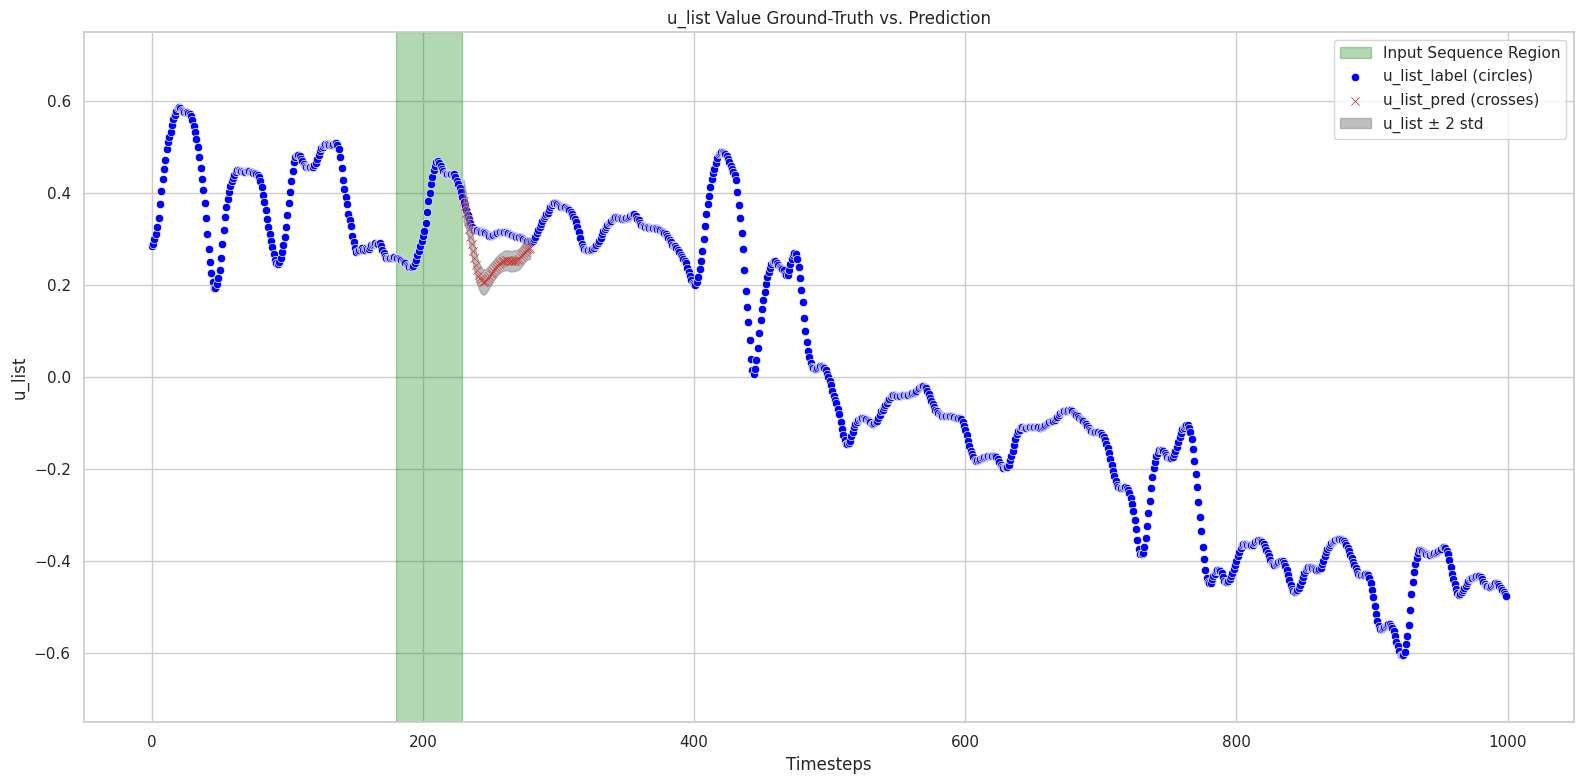

56it [00:03, 13.21it/s, single_test_loss=31.011774]

Output Timestep 231
    Input Timesteps [229 228 227 226 230 225 224 223 222 221]
    Scores ['0.03858', '0.03769', '0.03684', '0.03477', '0.03283', '0.03214', '0.03024', '0.02919', '0.02794', '0.02615']

Output Timestep 232
    Input Timesteps [227 228 229 226 225 230 224 223 222 221]
    Scores ['0.03746', '0.03742', '0.03676', '0.03553', '0.03294', '0.03143', '0.03104', '0.02988', '0.02859', '0.02679']

Output Timestep 233
    Input Timesteps [227 228 226 229 225 224 223 230 222 221]
    Scores ['0.03630', '0.03535', '0.03487', '0.03353', '0.03274', '0.03115', '0.03000', '0.02919', '0.02883', '0.02724']

Output Timestep 234
    Input Timesteps [227 226 228 225 224 229 223 222 221 230]
    Scores ['0.03385', '0.03299', '0.03228', '0.03145', '0.03024', '0.02996', '0.02919', '0.02823', '0.02699', '0.02674']

Output Timestep 235
    Input Timesteps [227 226 225 228 224 223 222 229 221 230]
    Scores ['0.03073', '0.03032', '0.02931', '0.02892', '0.02846', '0.02753', '0.02683', '0.02656'

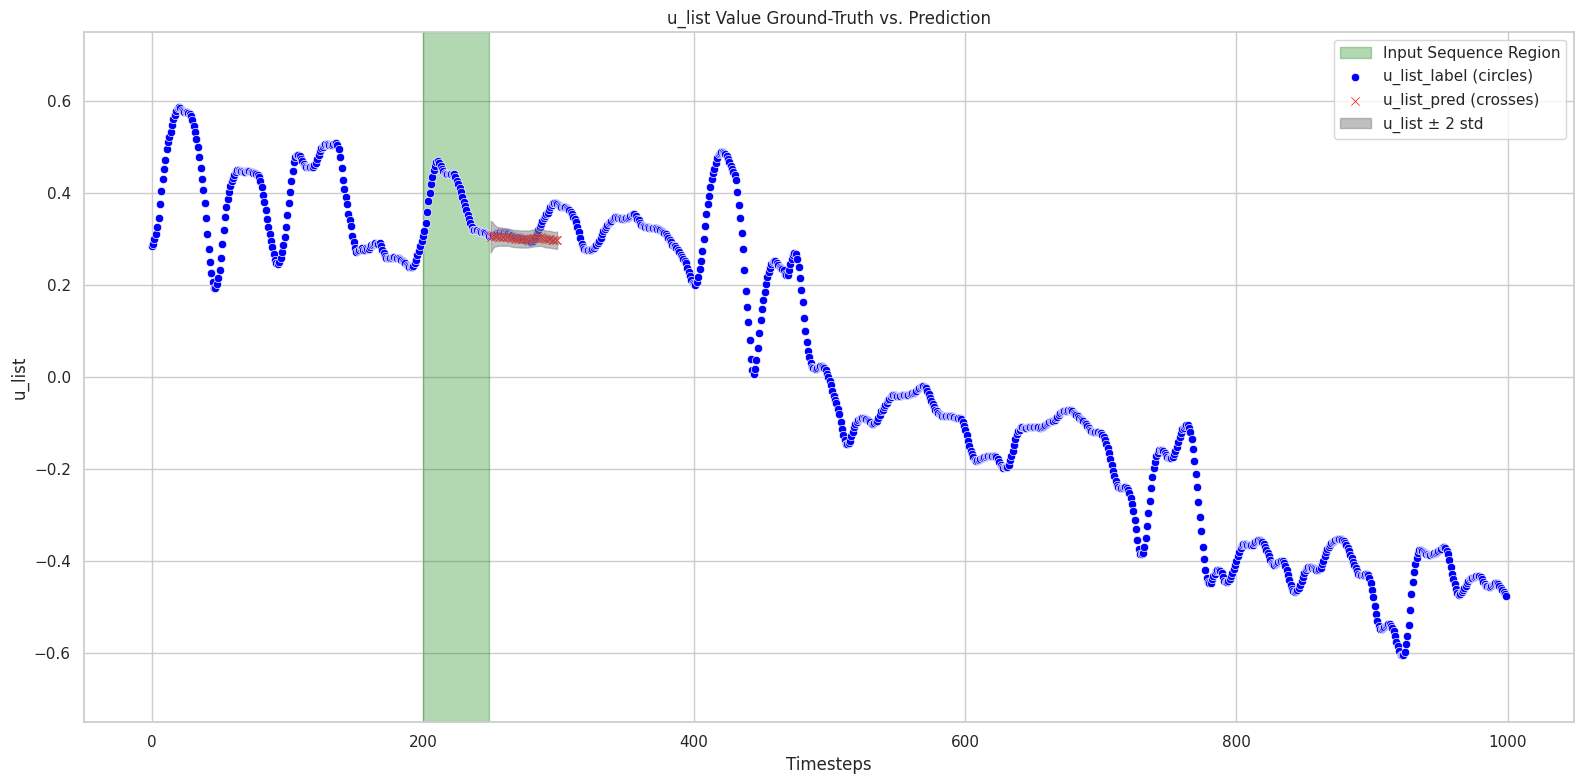

56it [00:03, 13.21it/s, single_test_loss=28.796213]

Output Timestep 251
    Input Timesteps [248 247 246 245 244 249 243 242 241 240]
    Scores ['0.03038', '0.03029', '0.02896', '0.02876', '0.02837', '0.02836', '0.02812', '0.02745', '0.02739', '0.02710']

Output Timestep 252
    Input Timesteps [247 248 246 245 244 243 241 249 242 240]
    Scores ['0.02959', '0.02944', '0.02865', '0.02864', '0.02840', '0.02827', '0.02772', '0.02768', '0.02768', '0.02749']

Output Timestep 253
    Input Timesteps [247 245 243 244 246 241 240 242 239 248]
    Scores ['0.02785', '0.02776', '0.02776', '0.02773', '0.02759', '0.02750', '0.02737', '0.02736', '0.02735', '0.02708']

Output Timestep 254
    Input Timesteps [239 241 240 243 244 242 245 238 246 247]
    Scores ['0.02679', '0.02675', '0.02673', '0.02671', '0.02657', '0.02654', '0.02645', '0.02640', '0.02618', '0.02596']

Output Timestep 255
    Input Timesteps [239 240 241 238 242 243 237 244 245 236]
    Scores ['0.02598', '0.02587', '0.02581', '0.02573', '0.02558', '0.02557', '0.02538', '0.02536'

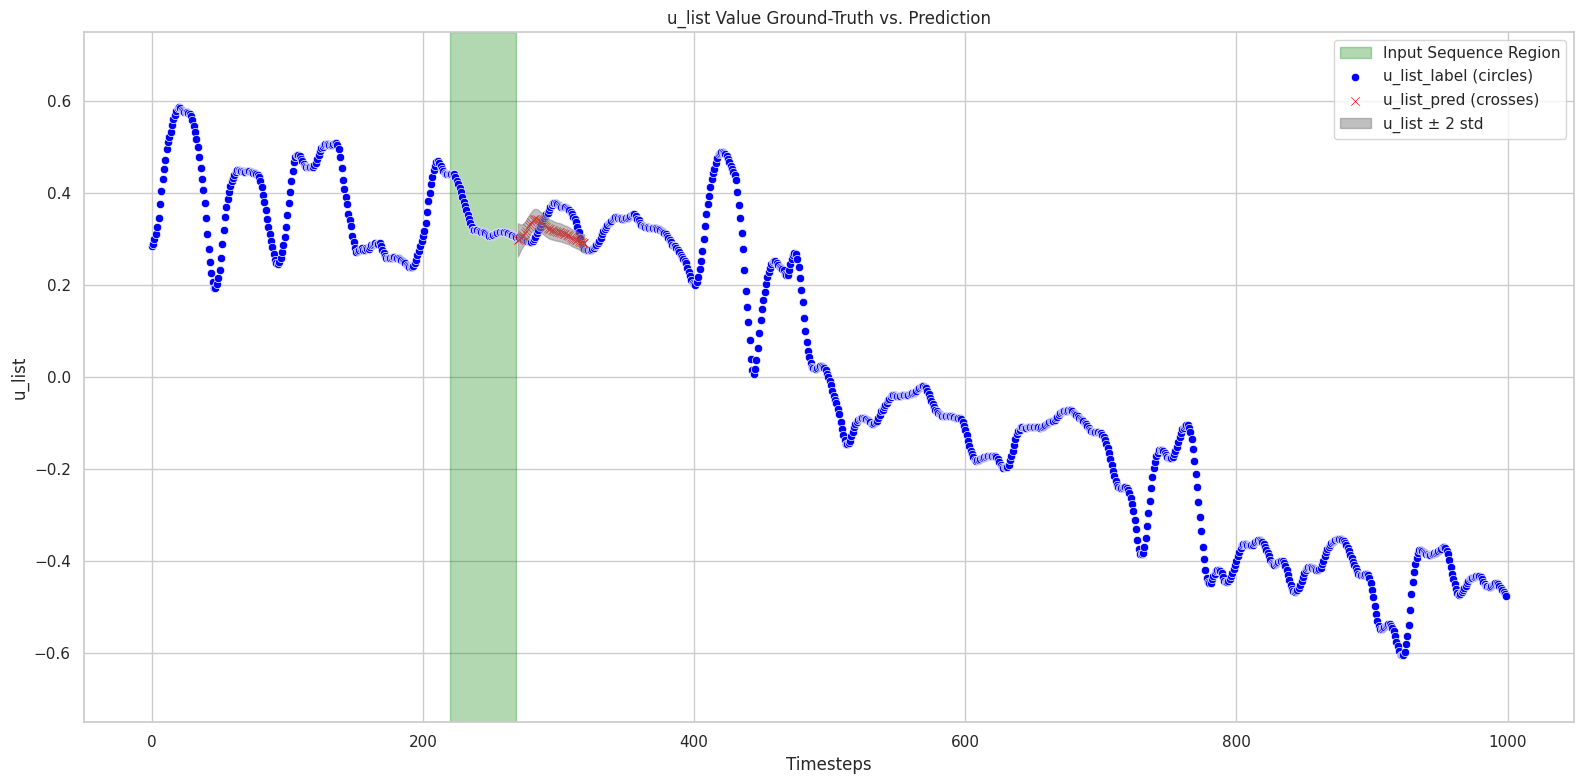

56it [00:04, 13.21it/s, single_test_loss=15.897760]

Output Timestep 271
    Input Timesteps [266 267 265 264 268 269 263 262 270 261]
    Scores ['0.02994', '0.02966', '0.02832', '0.02693', '0.02659', '0.02562', '0.02539', '0.02481', '0.02468', '0.02325']

Output Timestep 272
    Input Timesteps [266 267 265 264 263 268 262 269 261 270]
    Scores ['0.02997', '0.02947', '0.02857', '0.02743', '0.02608', '0.02581', '0.02557', '0.02445', '0.02418', '0.02361']

Output Timestep 273
    Input Timesteps [266 267 265 264 263 262 261 268 260 269]
    Scores ['0.02918', '0.02849', '0.02817', '0.02736', '0.02632', '0.02593', '0.02486', '0.02462', '0.02392', '0.02310']

Output Timestep 274
    Input Timesteps [266 265 267 264 263 262 261 260 268 256]
    Scores ['0.02790', '0.02723', '0.02720', '0.02667', '0.02590', '0.02562', '0.02488', '0.02409', '0.02370', '0.02233']

Output Timestep 275
    Input Timesteps [266 265 267 264 263 262 261 260 268 256]
    Scores ['0.02658', '0.02613', '0.02600', '0.02573', '0.02516', '0.02492', '0.02443', '0.02379'

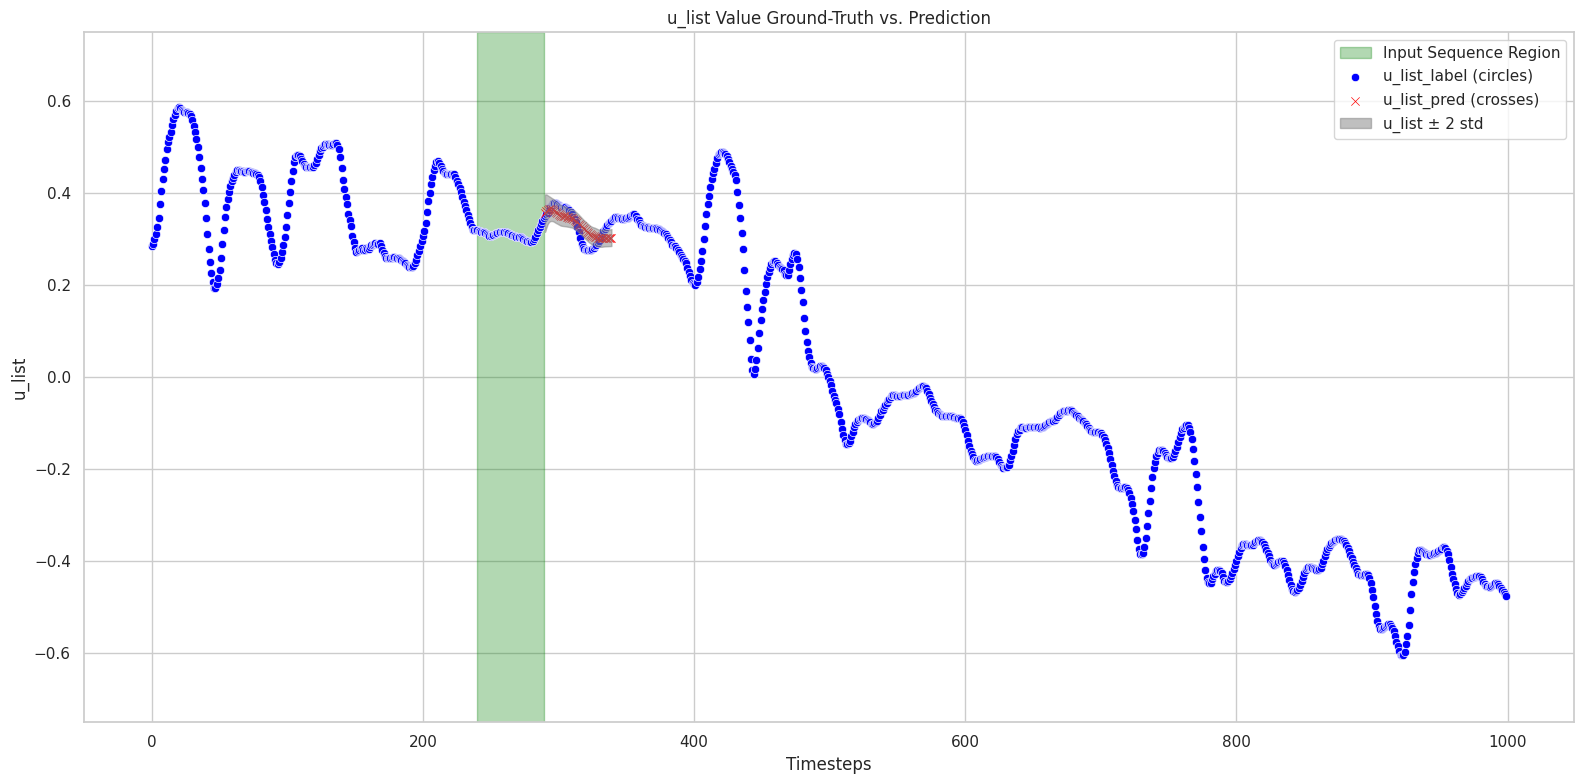

56it [00:04, 13.21it/s, single_test_loss=6.113430] 

Output Timestep 291
    Input Timesteps [289 288 290 287 286 285 283 282 284 281]
    Scores ['0.03136', '0.03125', '0.02989', '0.02967', '0.02839', '0.02802', '0.02699', '0.02685', '0.02641', '0.02626']

Output Timestep 292
    Input Timesteps [289 288 290 287 286 285 283 282 284 281]
    Scores ['0.03080', '0.03055', '0.02942', '0.02931', '0.02826', '0.02792', '0.02716', '0.02706', '0.02664', '0.02654']

Output Timestep 293
    Input Timesteps [287 289 288 286 285 290 283 282 281 284]
    Scores ['0.02816', '0.02815', '0.02813', '0.02766', '0.02750', '0.02721', '0.02712', '0.02709', '0.02673', '0.02667']

Output Timestep 294
    Input Timesteps [285 286 287 282 283 281 279 284 280 278]
    Scores ['0.02653', '0.02649', '0.02647', '0.02647', '0.02644', '0.02631', '0.02614', '0.02609', '0.02581', '0.02557']

Output Timestep 295
    Input Timesteps [279 281 282 283 285 280 284 286 278 277]
    Scores ['0.02562', '0.02555', '0.02554', '0.02549', '0.02544', '0.02534', '0.02528', '0.02527'

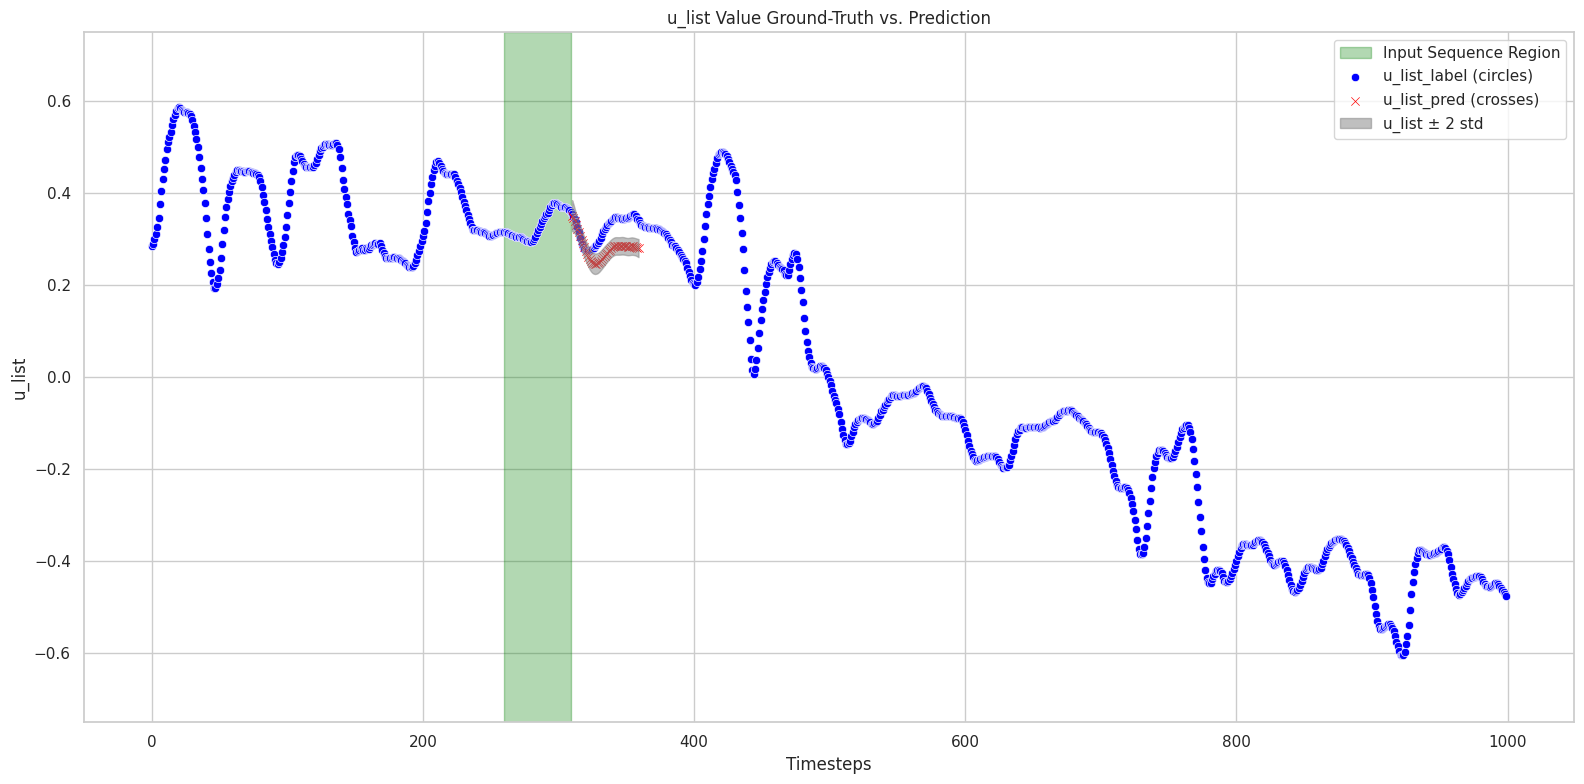

60it [00:04,  9.67it/s, single_test_loss=14.302788]

Output Timestep 311
    Input Timesteps [307 306 308 309 305 304 310 303 302 301]
    Scores ['0.03337', '0.03247', '0.03224', '0.03199', '0.03038', '0.02944', '0.02831', '0.02701', '0.02668', '0.02522']

Output Timestep 312
    Input Timesteps [307 306 308 305 309 304 303 310 302 301]
    Scores ['0.03380', '0.03304', '0.03147', '0.03109', '0.03054', '0.03006', '0.02783', '0.02731', '0.02730', '0.02607']

Output Timestep 313
    Input Timesteps [307 306 305 304 308 309 303 302 301 310]
    Scores ['0.03264', '0.03225', '0.03072', '0.02976', '0.02944', '0.02809', '0.02800', '0.02727', '0.02651', '0.02563']

Output Timestep 314
    Input Timesteps [307 306 305 304 303 308 302 301 309 300]
    Scores ['0.03061', '0.03054', '0.02948', '0.02863', '0.02739', '0.02712', '0.02655', '0.02626', '0.02567', '0.02534']

Output Timestep 315
    Input Timesteps [306 307 305 304 303 301 302 308 300 299]
    Scores ['0.02841', '0.02829', '0.02772', '0.02693', '0.02618', '0.02539', '0.02526', '0.02486'

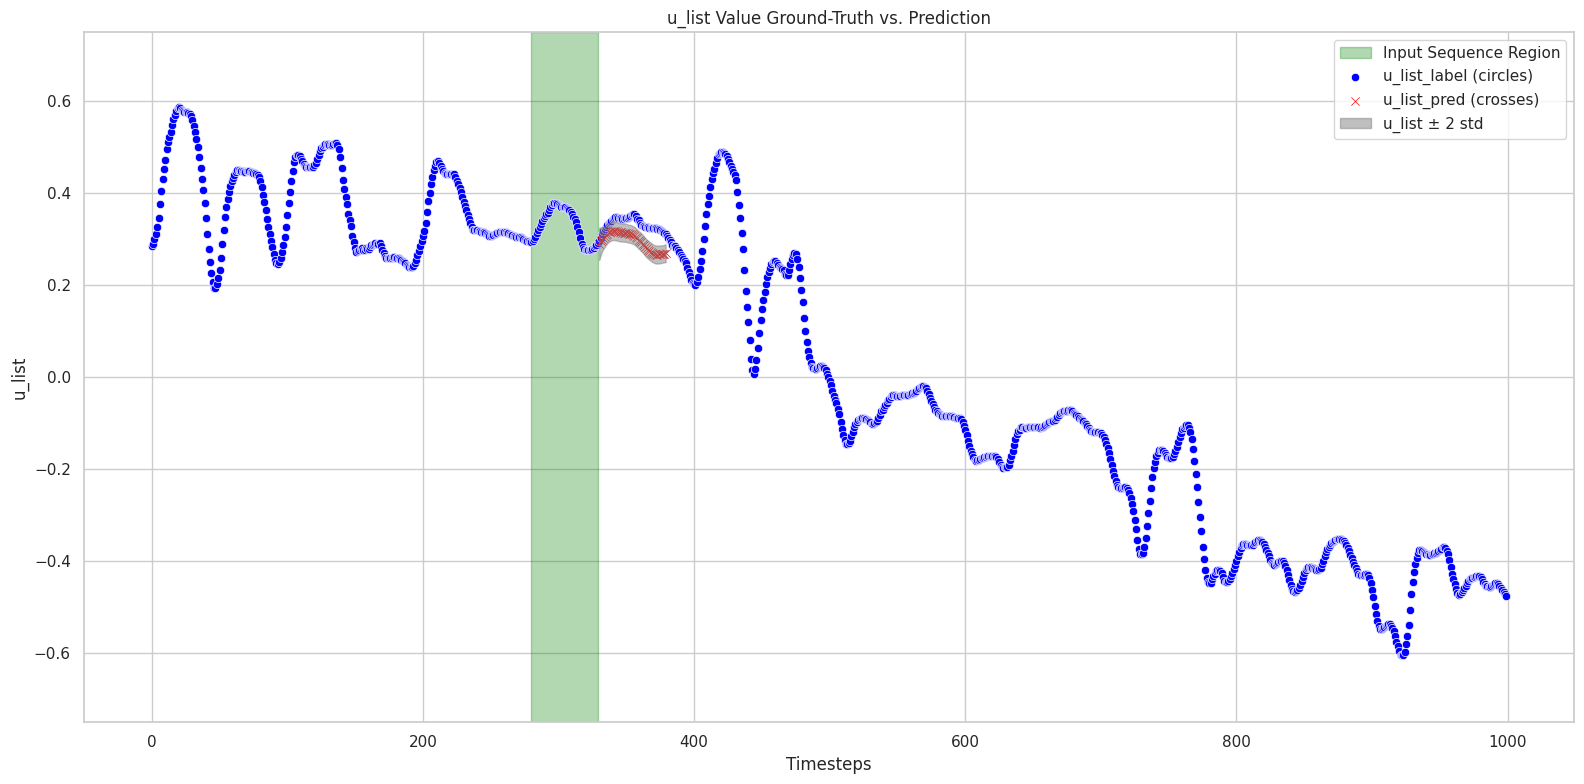

60it [00:05,  9.67it/s, single_test_loss=56.036243]

Output Timestep 331
    Input Timesteps [328 327 329 326 330 325 324 323 322 321]
    Scores ['0.03766', '0.03614', '0.03596', '0.03369', '0.03358', '0.03125', '0.03010', '0.02890', '0.02876', '0.02779']

Output Timestep 332
    Input Timesteps [328 327 329 326 330 325 324 323 322 321]
    Scores ['0.03581', '0.03580', '0.03395', '0.03392', '0.03189', '0.03177', '0.03070', '0.02954', '0.02933', '0.02833']

Output Timestep 333
    Input Timesteps [327 326 328 325 329 324 323 322 330 321]
    Scores ['0.03377', '0.03278', '0.03238', '0.03122', '0.03060', '0.03041', '0.02943', '0.02925', '0.02908', '0.02832']

Output Timestep 334
    Input Timesteps [327 326 325 324 328 323 322 321 329 319]
    Scores ['0.03104', '0.03080', '0.02982', '0.02931', '0.02894', '0.02858', '0.02848', '0.02775', '0.02741', '0.02728']

Output Timestep 335
    Input Timesteps [326 327 325 324 322 323 321 319 320 328]
    Scores ['0.02862', '0.02834', '0.02812', '0.02786', '0.02739', '0.02738', '0.02694', '0.02667'

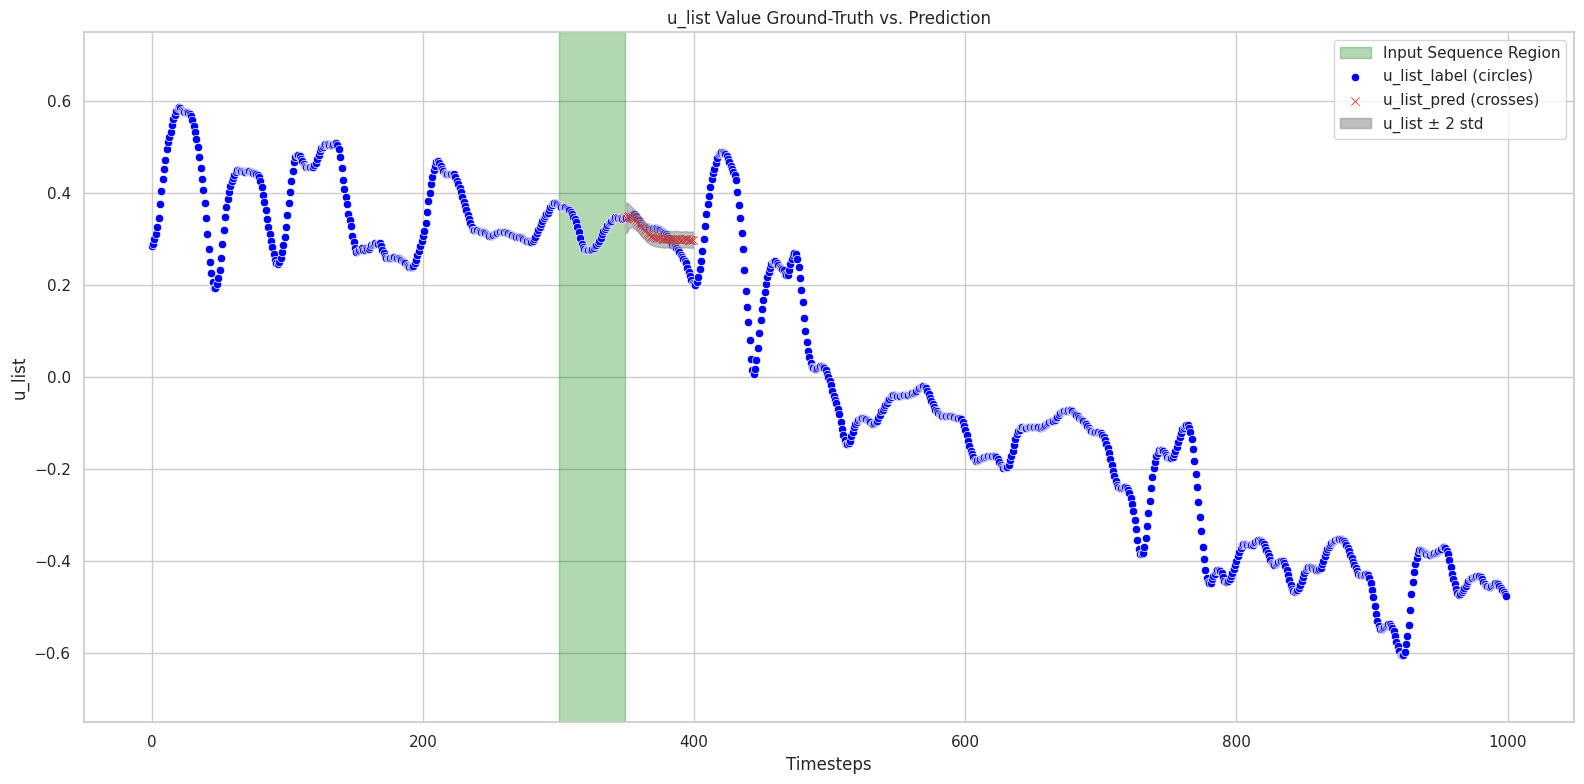

60it [00:05,  9.67it/s, single_test_loss=110.394035]

Output Timestep 351
    Input Timesteps [347 348 346 345 349 344 343 350 342 341]
    Scores ['0.03158', '0.03154', '0.03086', '0.02988', '0.02976', '0.02839', '0.02774', '0.02766', '0.02706', '0.02665']

Output Timestep 352
    Input Timesteps [347 348 346 345 349 344 343 342 341 350]
    Scores ['0.03085', '0.03072', '0.03039', '0.02970', '0.02908', '0.02860', '0.02814', '0.02764', '0.02736', '0.02724']

Output Timestep 353
    Input Timesteps [347 346 345 348 344 343 342 341 340 349]
    Scores ['0.02946', '0.02936', '0.02900', '0.02896', '0.02833', '0.02807', '0.02780', '0.02770', '0.02744', '0.02720']

Output Timestep 354
    Input Timesteps [346 345 347 344 343 341 342 340 348 339]
    Scores ['0.02798', '0.02786', '0.02781', '0.02747', '0.02735', '0.02729', '0.02724', '0.02720', '0.02702', '0.02664']

Output Timestep 355
    Input Timesteps [346 345 340 341 344 347 343 342 339 338]
    Scores ['0.02665', '0.02665', '0.02644', '0.02642', '0.02641', '0.02634', '0.02632', '0.02630'

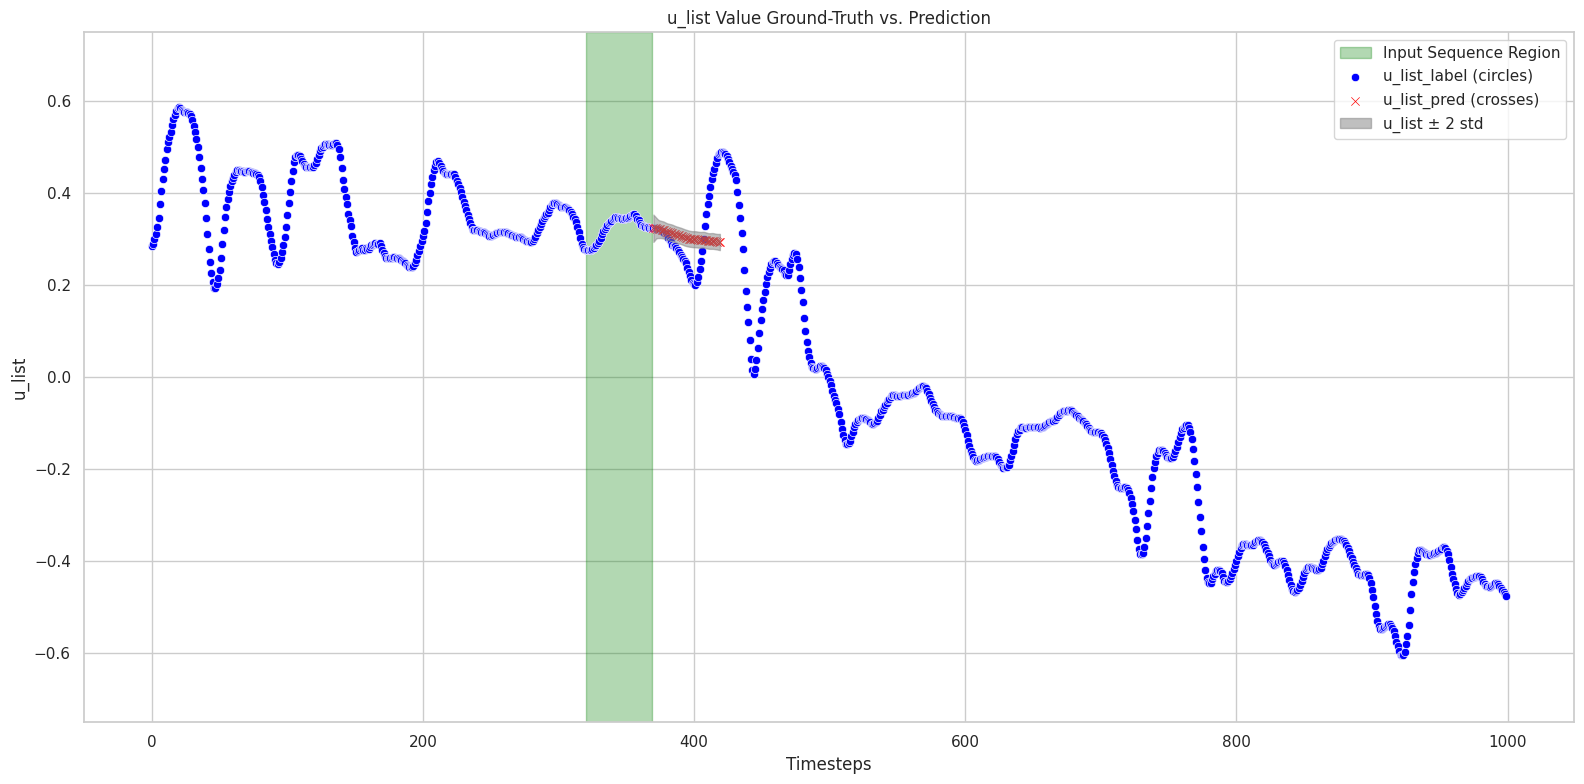

63it [00:05,  7.91it/s, single_test_loss=141.970779]

Output Timestep 371
    Input Timesteps [368 369 367 366 370 365 364 363 362 355]
    Scores ['0.03177', '0.03176', '0.02956', '0.02908', '0.02897', '0.02761', '0.02659', '0.02638', '0.02590', '0.02511']

Output Timestep 372
    Input Timesteps [368 369 367 366 365 370 364 363 362 361]
    Scores ['0.03045', '0.02999', '0.02972', '0.02964', '0.02842', '0.02759', '0.02751', '0.02731', '0.02681', '0.02595']

Output Timestep 373
    Input Timesteps [366 367 365 368 364 363 362 369 361 360]
    Scores ['0.02913', '0.02863', '0.02837', '0.02781', '0.02770', '0.02754', '0.02706', '0.02701', '0.02641', '0.02624']

Output Timestep 374
    Input Timesteps [366 365 364 367 363 362 361 360 355 356]
    Scores ['0.02781', '0.02742', '0.02696', '0.02694', '0.02686', '0.02643', '0.02602', '0.02599', '0.02573', '0.02571']

Output Timestep 375
    Input Timesteps [366 365 364 363 355 356 362 357 354 360]
    Scores ['0.02638', '0.02624', '0.02594', '0.02587', '0.02555', '0.02551', '0.02546', '0.02538'

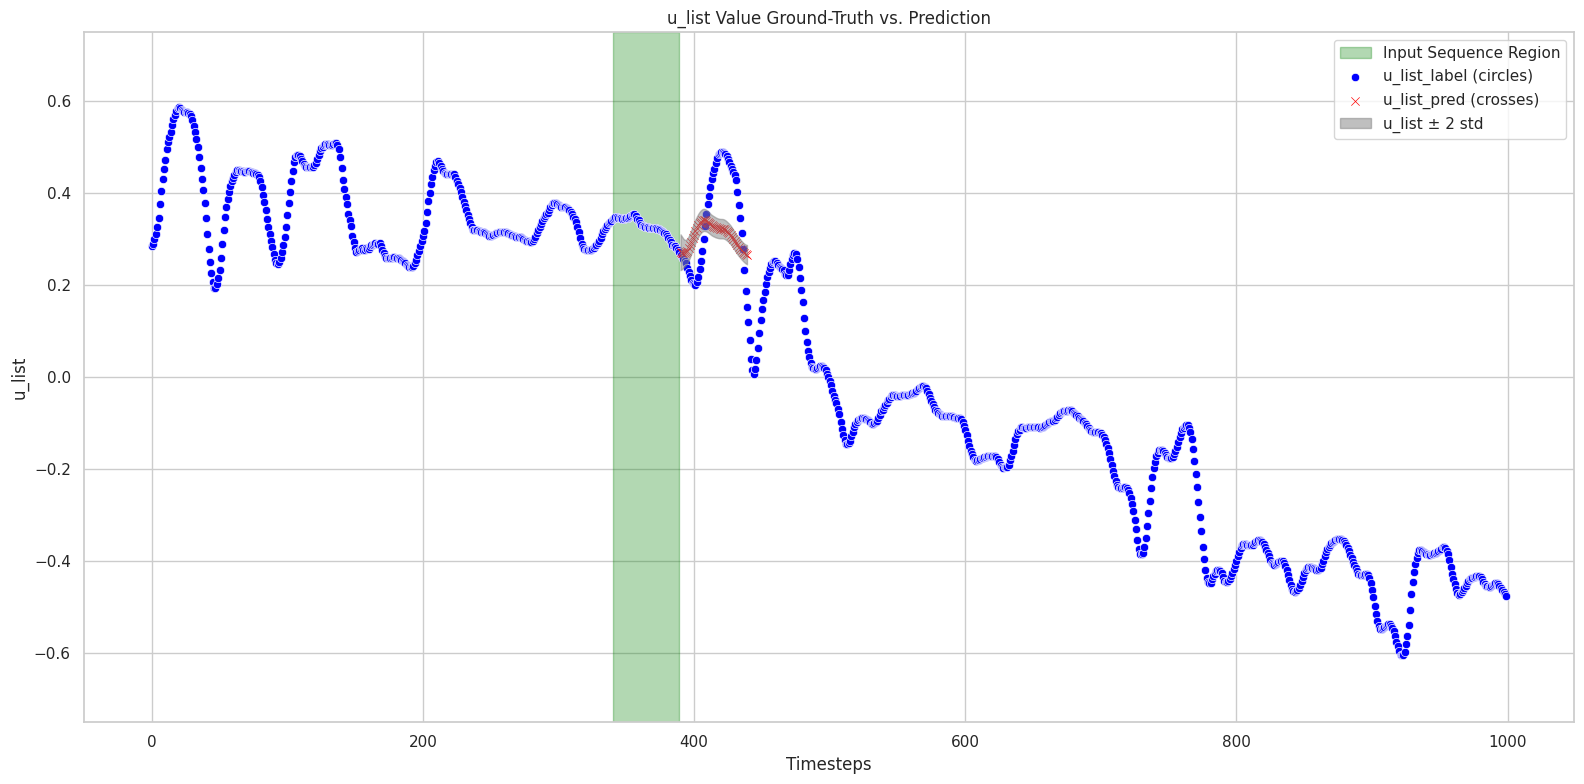

63it [00:05,  7.91it/s, single_test_loss=23.784019] 

Output Timestep 391
    Input Timesteps [388 389 387 390 386 385 384 382 383 381]
    Scores ['0.03696', '0.03591', '0.03370', '0.03313', '0.03153', '0.03019', '0.02941', '0.02799', '0.02756', '0.02683']

Output Timestep 392
    Input Timesteps [388 389 387 390 386 385 384 382 383 381]
    Scores ['0.03575', '0.03445', '0.03346', '0.03194', '0.03162', '0.03034', '0.02966', '0.02834', '0.02795', '0.02723']

Output Timestep 393
    Input Timesteps [388 387 389 386 385 384 390 382 383 381]
    Scores ['0.03252', '0.03179', '0.03110', '0.03063', '0.02971', '0.02924', '0.02918', '0.02822', '0.02788', '0.02727']

Output Timestep 394
    Input Timesteps [387 386 388 385 384 389 382 383 381 390]
    Scores ['0.02962', '0.02905', '0.02905', '0.02851', '0.02824', '0.02758', '0.02755', '0.02725', '0.02678', '0.02618']

Output Timestep 395
    Input Timesteps [387 386 385 384 382 383 388 381 380 389]
    Scores ['0.02757', '0.02739', '0.02713', '0.02700', '0.02658', '0.02634', '0.02622', '0.02600'

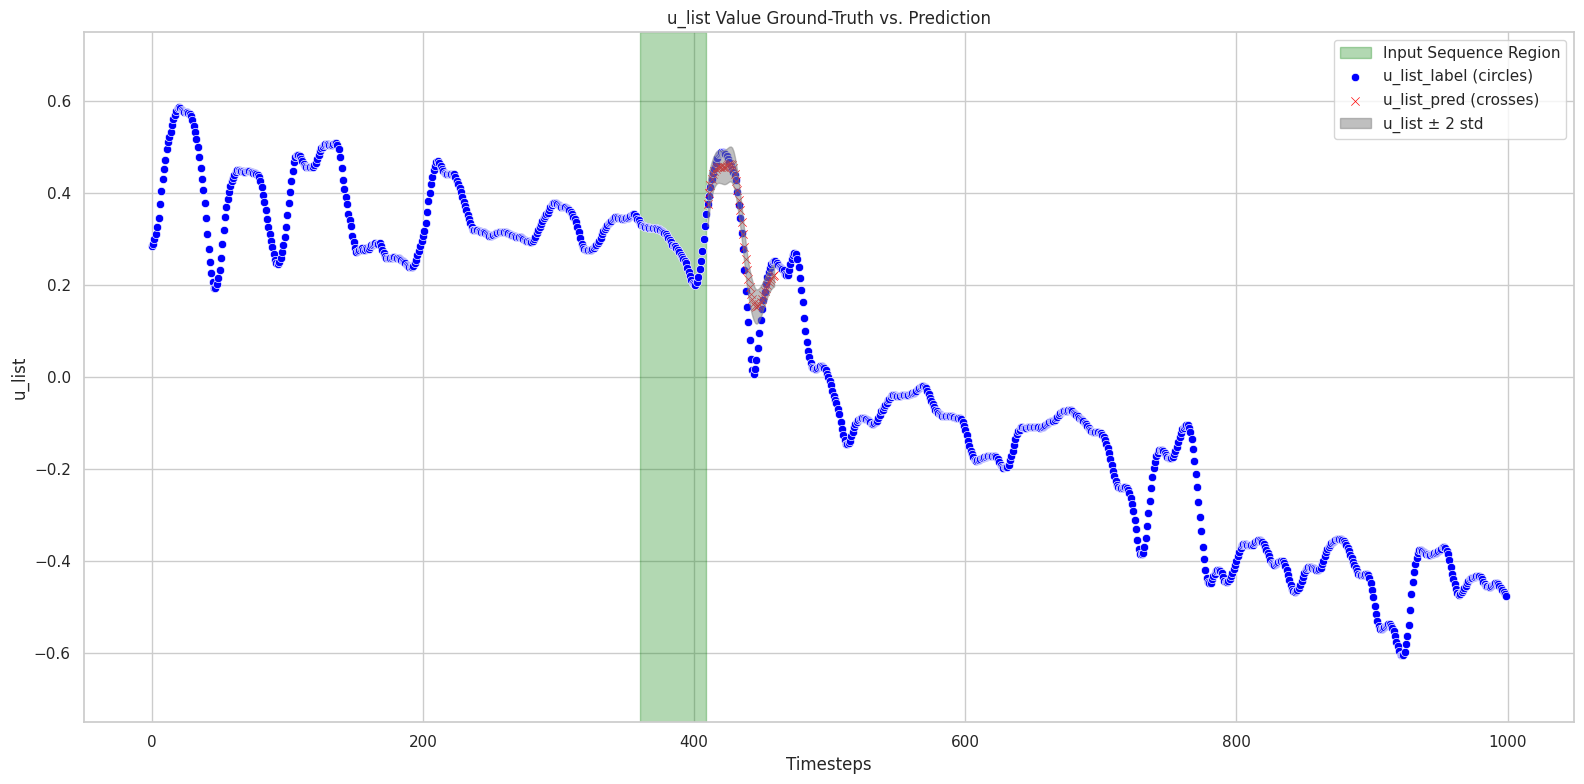

65it [00:06,  6.91it/s, single_test_loss=7.344349] 

Output Timestep 411
    Input Timesteps [408 407 406 409 405 404 410 403 400 401]
    Scores ['0.04017', '0.03987', '0.03788', '0.03473', '0.03471', '0.03129', '0.03064', '0.02903', '0.02644', '0.02616']

Output Timestep 412
    Input Timesteps [407 408 406 405 409 404 410 403 400 401]
    Scores ['0.03771', '0.03758', '0.03639', '0.03391', '0.03303', '0.03175', '0.02974', '0.02952', '0.02696', '0.02665']

Output Timestep 413
    Input Timesteps [407 408 406 405 404 409 403 410 400 401]
    Scores ['0.03404', '0.03364', '0.03354', '0.03203', '0.03125', '0.03032', '0.02943', '0.02804', '0.02730', '0.02695']

Output Timestep 414
    Input Timesteps [406 407 404 405 408 403 400 409 401 402]
    Scores ['0.02995', '0.02981', '0.02978', '0.02934', '0.02923', '0.02856', '0.02725', '0.02708', '0.02685', '0.02651']

Output Timestep 415
    Input Timesteps [404 403 400 405 406 401 402 407 399 408]
    Scores ['0.02768', '0.02706', '0.02675', '0.02641', '0.02638', '0.02629', '0.02590', '0.02588'

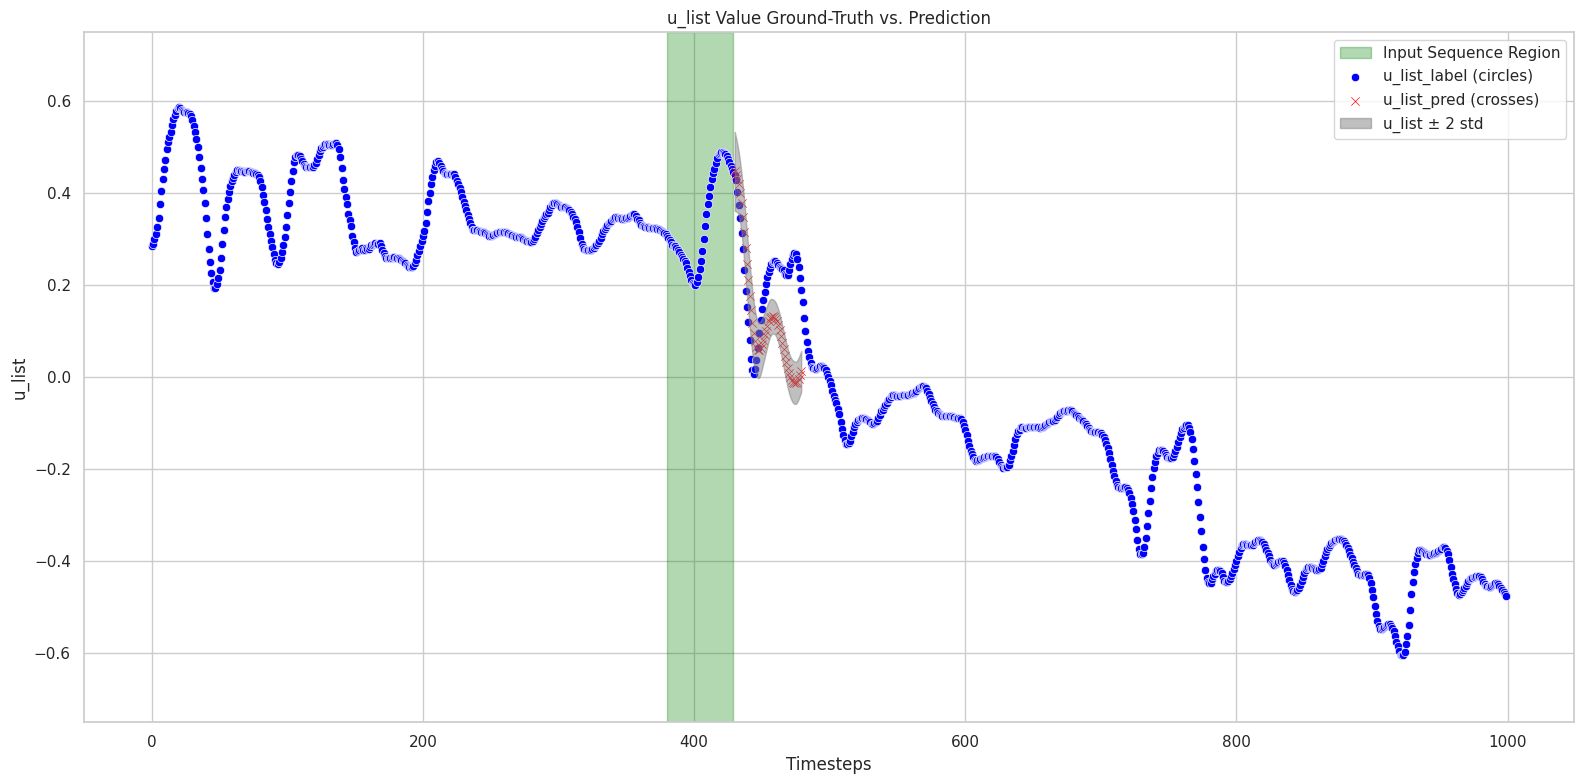

65it [00:06,  6.91it/s, single_test_loss=7.237029]

Output Timestep 431
    Input Timesteps [430 429 428 427 426 425 423 424 422 421]
    Scores ['0.03924', '0.03853', '0.03585', '0.03316', '0.03048', '0.02840', '0.02668', '0.02653', '0.02502', '0.02237']

Output Timestep 432
    Input Timesteps [430 429 428 427 426 425 423 424 422 421]
    Scores ['0.03869', '0.03801', '0.03553', '0.03294', '0.03032', '0.02840', '0.02689', '0.02671', '0.02541', '0.02287']

Output Timestep 433
    Input Timesteps [430 429 428 427 426 425 423 424 422 419]
    Scores ['0.03623', '0.03544', '0.03324', '0.03118', '0.02906', '0.02756', '0.02659', '0.02625', '0.02542', '0.02322']

Output Timestep 434
    Input Timesteps [430 429 428 427 426 425 423 424 422 419]
    Scores ['0.03256', '0.03174', '0.02996', '0.02853', '0.02711', '0.02612', '0.02568', '0.02522', '0.02489', '0.02345']

Output Timestep 435
    Input Timesteps [430 429 428 427 426 423 425 422 424 418]
    Scores ['0.02873', '0.02801', '0.02666', '0.02578', '0.02497', '0.02444', '0.02444', '0.02400'

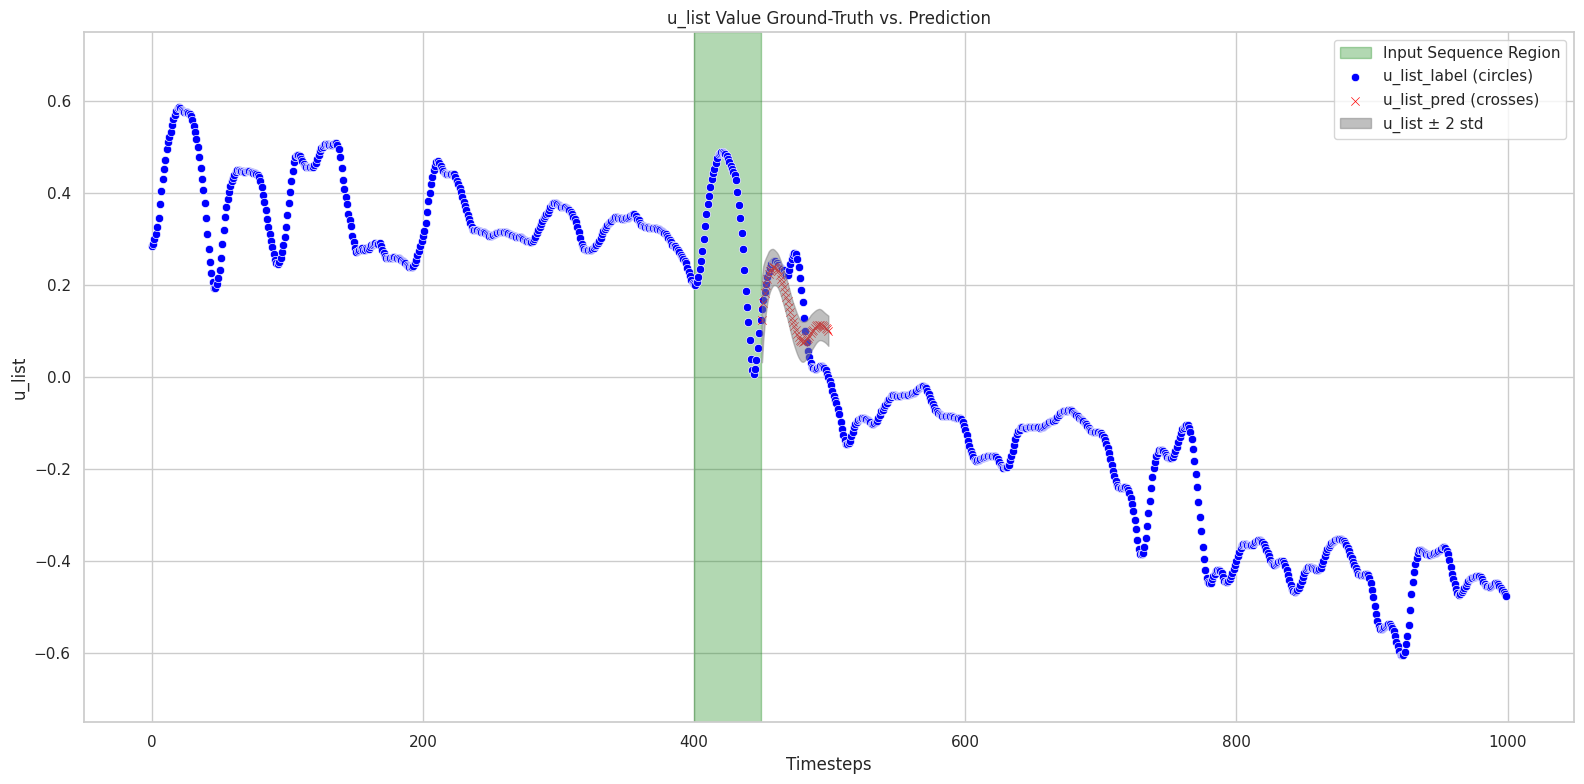

67it [00:07,  5.79it/s, single_test_loss=3.075046]

Output Timestep 451
    Input Timesteps [440 437 441 436 442 438 435 443 439 401]
    Scores ['0.02448', '0.02443', '0.02437', '0.02380', '0.02377', '0.02364', '0.02357', '0.02335', '0.02320', '0.02291']

Output Timestep 452
    Input Timesteps [437 440 441 436 438 435 442 401 443 439]
    Scores ['0.02504', '0.02489', '0.02462', '0.02438', '0.02433', '0.02414', '0.02402', '0.02402', '0.02392', '0.02390']

Output Timestep 453
    Input Timesteps [437 401 440 436 438 435 402 439 441 446]
    Scores ['0.02500', '0.02475', '0.02442', '0.02440', '0.02436', '0.02419', '0.02405', '0.02399', '0.02392', '0.02327']

Output Timestep 454
    Input Timesteps [401 437 402 436 435 438 439 434 440 432]
    Scores ['0.02509', '0.02466', '0.02443', '0.02425', '0.02413', '0.02404', '0.02369', '0.02340', '0.02337', '0.02313']

Output Timestep 455
    Input Timesteps [401 402 437 435 436 434 438 432 429 433]
    Scores ['0.02504', '0.02447', '0.02413', '0.02407', '0.02403', '0.02365', '0.02351', '0.02345'

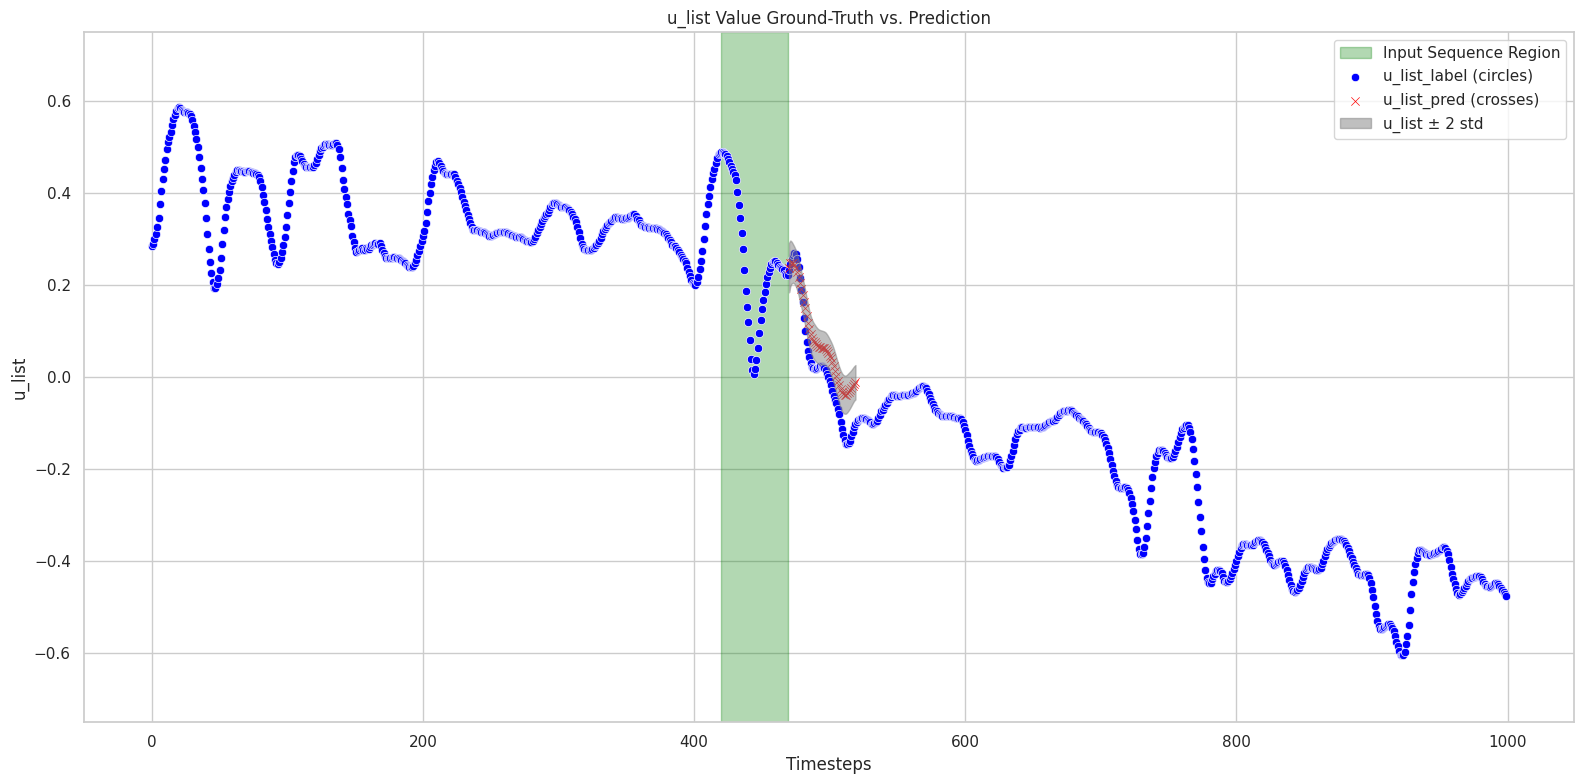

68it [00:07,  5.42it/s, single_test_loss=0.584191]

Output Timestep 471
    Input Timesteps [469 468 470 467 466 465 464 463 462 461]
    Scores ['0.04482', '0.04470', '0.04373', '0.03370', '0.03288', '0.02978', '0.02667', '0.02604', '0.02554', '0.02390']

Output Timestep 472
    Input Timesteps [468 469 470 467 466 465 464 463 462 461]
    Scores ['0.04393', '0.04345', '0.04233', '0.03424', '0.03348', '0.03033', '0.02715', '0.02648', '0.02599', '0.02431']

Output Timestep 473
    Input Timesteps [468 469 470 467 466 465 464 463 462 461]
    Scores ['0.04064', '0.03971', '0.03877', '0.03329', '0.03282', '0.03008', '0.02723', '0.02667', '0.02626', '0.02469']

Output Timestep 474
    Input Timesteps [468 469 470 467 466 465 464 463 462 461]
    Scores ['0.03638', '0.03516', '0.03441', '0.03151', '0.03134', '0.02916', '0.02682', '0.02642', '0.02614', '0.02479']

Output Timestep 475
    Input Timesteps [468 469 470 466 467 465 464 463 462 461]
    Scores ['0.03212', '0.03077', '0.03014', '0.02936', '0.02936', '0.02775', '0.02599', '0.02575'

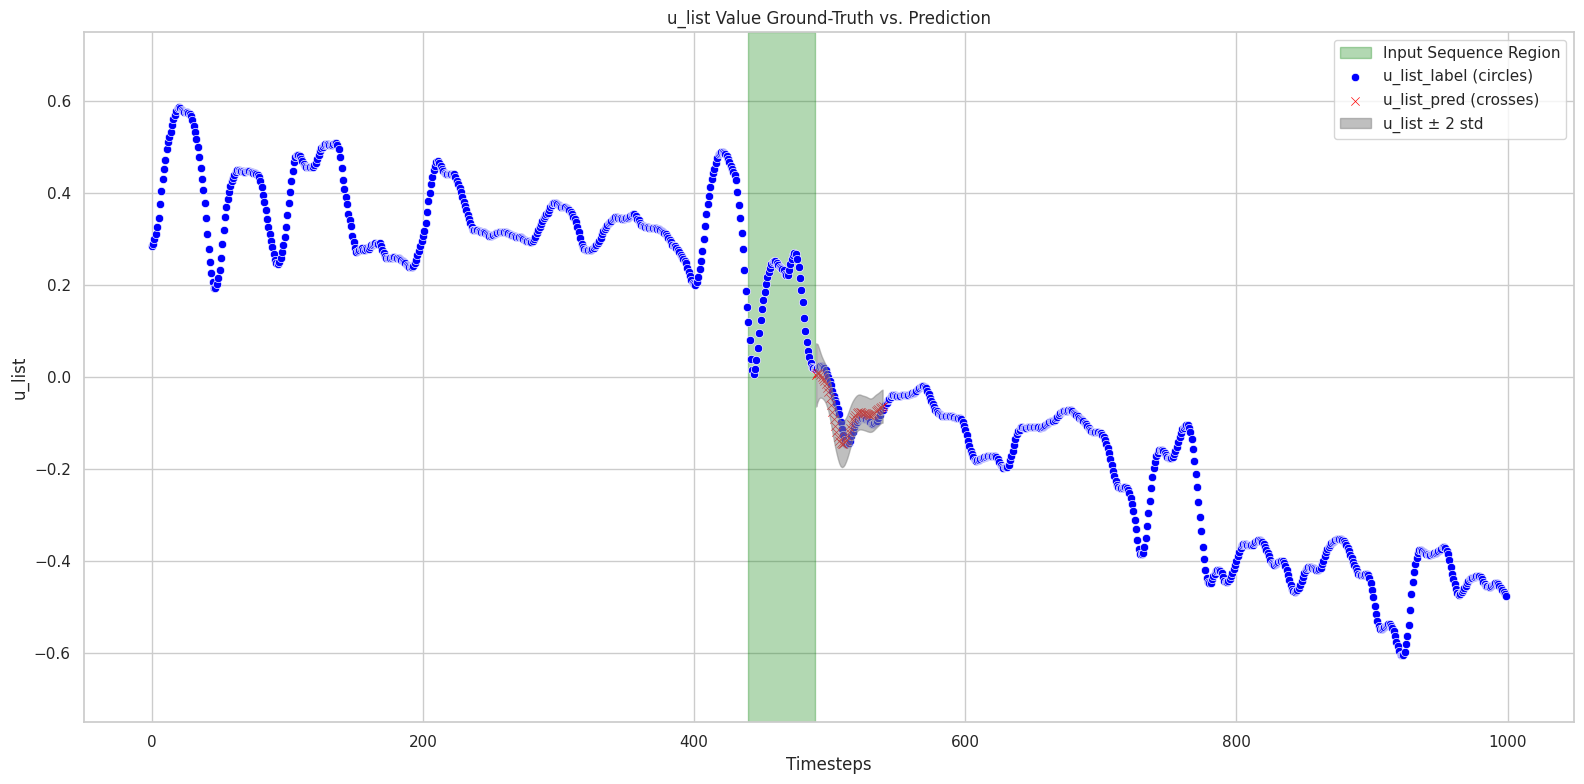

69it [00:07,  5.07it/s, single_test_loss=0.284973]

Output Timestep 491
    Input Timesteps [489 488 490 487 486 485 484 483 482 481]
    Scores ['0.03552', '0.03533', '0.03351', '0.03305', '0.03275', '0.03142', '0.02946', '0.02872', '0.02760', '0.02551']

Output Timestep 492
    Input Timesteps [489 488 490 487 486 485 484 483 482 481]
    Scores ['0.03508', '0.03461', '0.03344', '0.03233', '0.03204', '0.03082', '0.02914', '0.02852', '0.02751', '0.02562']

Output Timestep 493
    Input Timesteps [489 488 490 487 486 485 484 483 482 477]
    Scores ['0.03225', '0.03199', '0.03096', '0.03030', '0.03017', '0.02927', '0.02810', '0.02775', '0.02703', '0.02563']

Output Timestep 494
    Input Timesteps [489 488 486 487 490 485 484 483 482 477]
    Scores ['0.02873', '0.02872', '0.02788', '0.02783', '0.02773', '0.02735', '0.02667', '0.02656', '0.02615', '0.02546']

Output Timestep 495
    Input Timesteps [488 486 489 487 485 483 484 482 477 490]
    Scores ['0.02579', '0.02568', '0.02567', '0.02550', '0.02547', '0.02523', '0.02518', '0.02508'

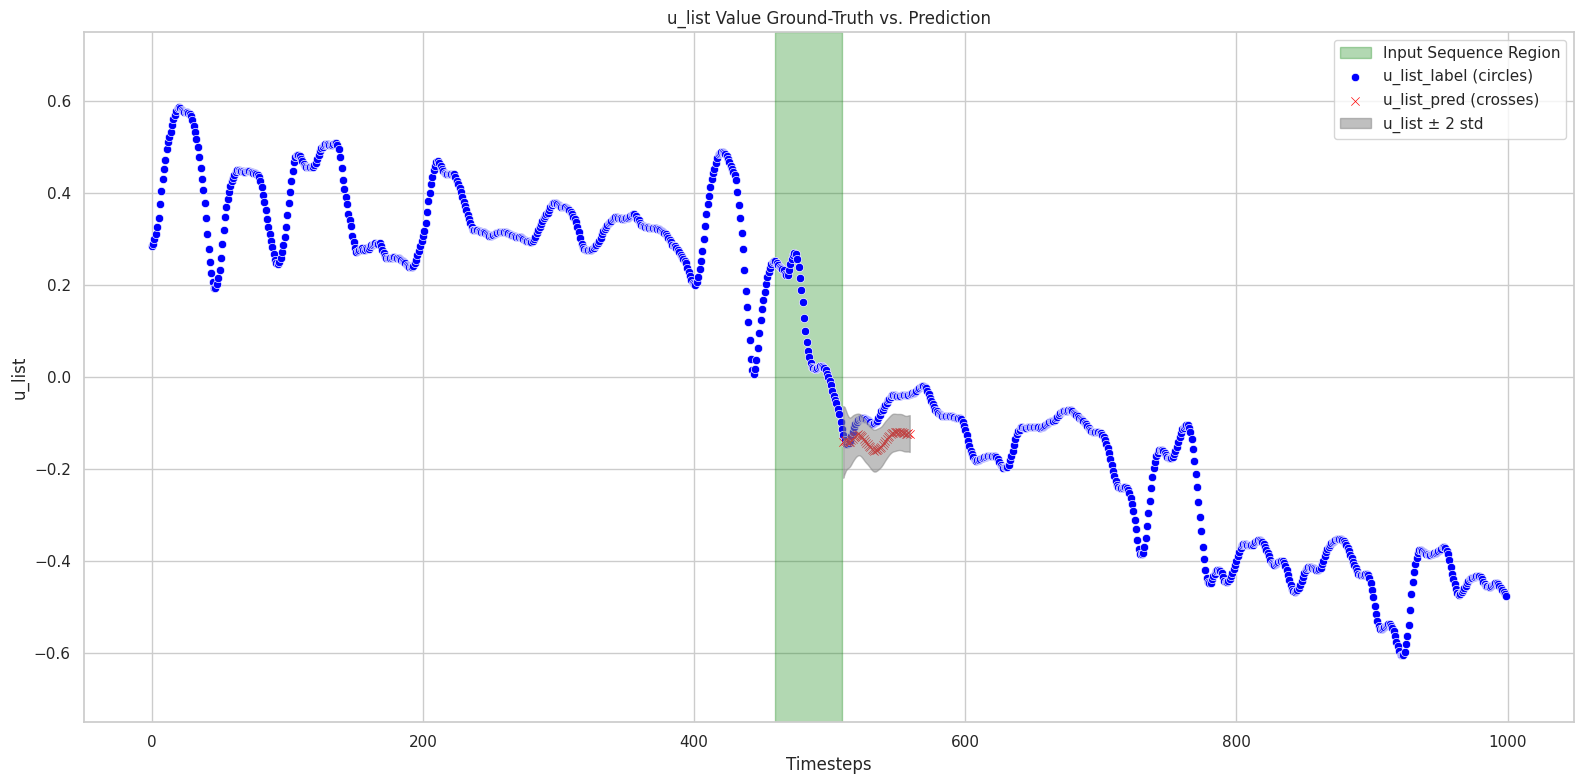

70it [00:07,  4.74it/s, single_test_loss=1.577235]

Output Timestep 511
    Input Timesteps [508 507 506 505 509 510 503 504 502 501]
    Scores ['0.02798', '0.02770', '0.02757', '0.02741', '0.02601', '0.02565', '0.02551', '0.02545', '0.02470', '0.02202']

Output Timestep 512
    Input Timesteps [506 505 507 508 503 504 509 502 510 501]
    Scores ['0.02757', '0.02756', '0.02736', '0.02720', '0.02579', '0.02557', '0.02513', '0.02510', '0.02467', '0.02246']

Output Timestep 513
    Input Timesteps [505 506 507 503 504 502 508 501 509 510]
    Scores ['0.02709', '0.02686', '0.02603', '0.02580', '0.02538', '0.02535', '0.02511', '0.02287', '0.02285', '0.02237']

Output Timestep 514
    Input Timesteps [505 506 503 502 504 507 501 508 496 500]
    Scores ['0.02596', '0.02554', '0.02530', '0.02514', '0.02469', '0.02430', '0.02296', '0.02295', '0.02142', '0.02131']

Output Timestep 515
    Input Timesteps [505 502 503 506 504 507 501 496 500 508]
    Scores ['0.02466', '0.02459', '0.02451', '0.02413', '0.02378', '0.02277', '0.02274', '0.02149'

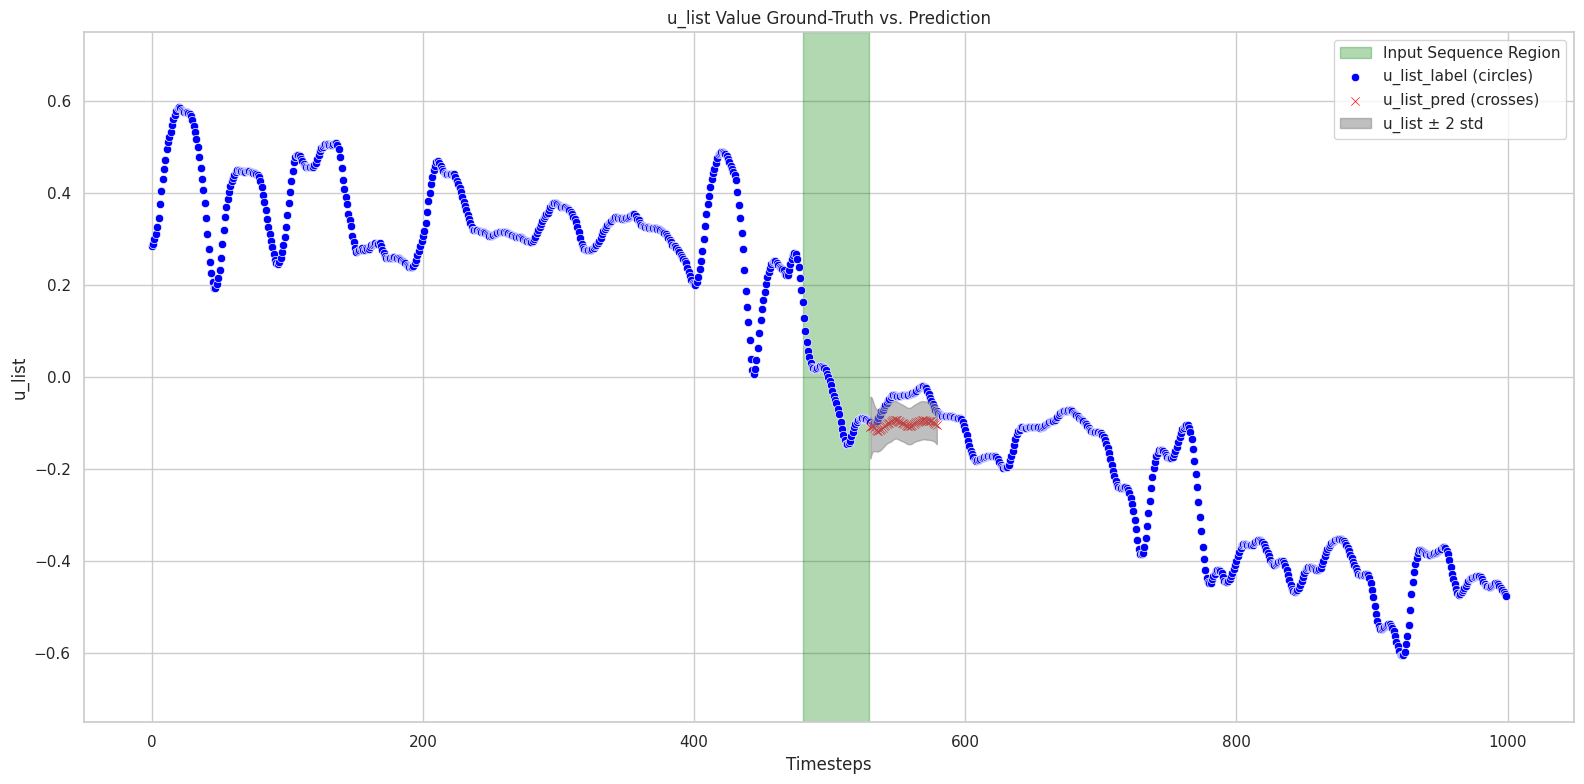

71it [00:08,  4.43it/s, single_test_loss=6.398206]

Output Timestep 531
    Input Timesteps [529 528 527 530 526 525 524 523 522 521]
    Scores ['0.03232', '0.03216', '0.03162', '0.02934', '0.02903', '0.02787', '0.02753', '0.02700', '0.02659', '0.02564']

Output Timestep 532
    Input Timesteps [528 529 527 526 530 525 524 523 522 521]
    Scores ['0.03197', '0.03176', '0.03170', '0.02951', '0.02913', '0.02838', '0.02802', '0.02761', '0.02716', '0.02635']

Output Timestep 533
    Input Timesteps [527 528 529 526 525 524 523 530 522 521]
    Scores ['0.03027', '0.03009', '0.02953', '0.02886', '0.02801', '0.02777', '0.02755', '0.02753', '0.02718', '0.02657']

Output Timestep 534
    Input Timesteps [527 528 526 529 525 524 523 522 521 530]
    Scores ['0.02831', '0.02784', '0.02757', '0.02712', '0.02705', '0.02695', '0.02686', '0.02663', '0.02622', '0.02568']

Output Timestep 535
    Input Timesteps [527 526 523 524 525 522 528 521 529 520]
    Scores ['0.02636', '0.02613', '0.02594', '0.02593', '0.02589', '0.02585', '0.02578', '0.02561'

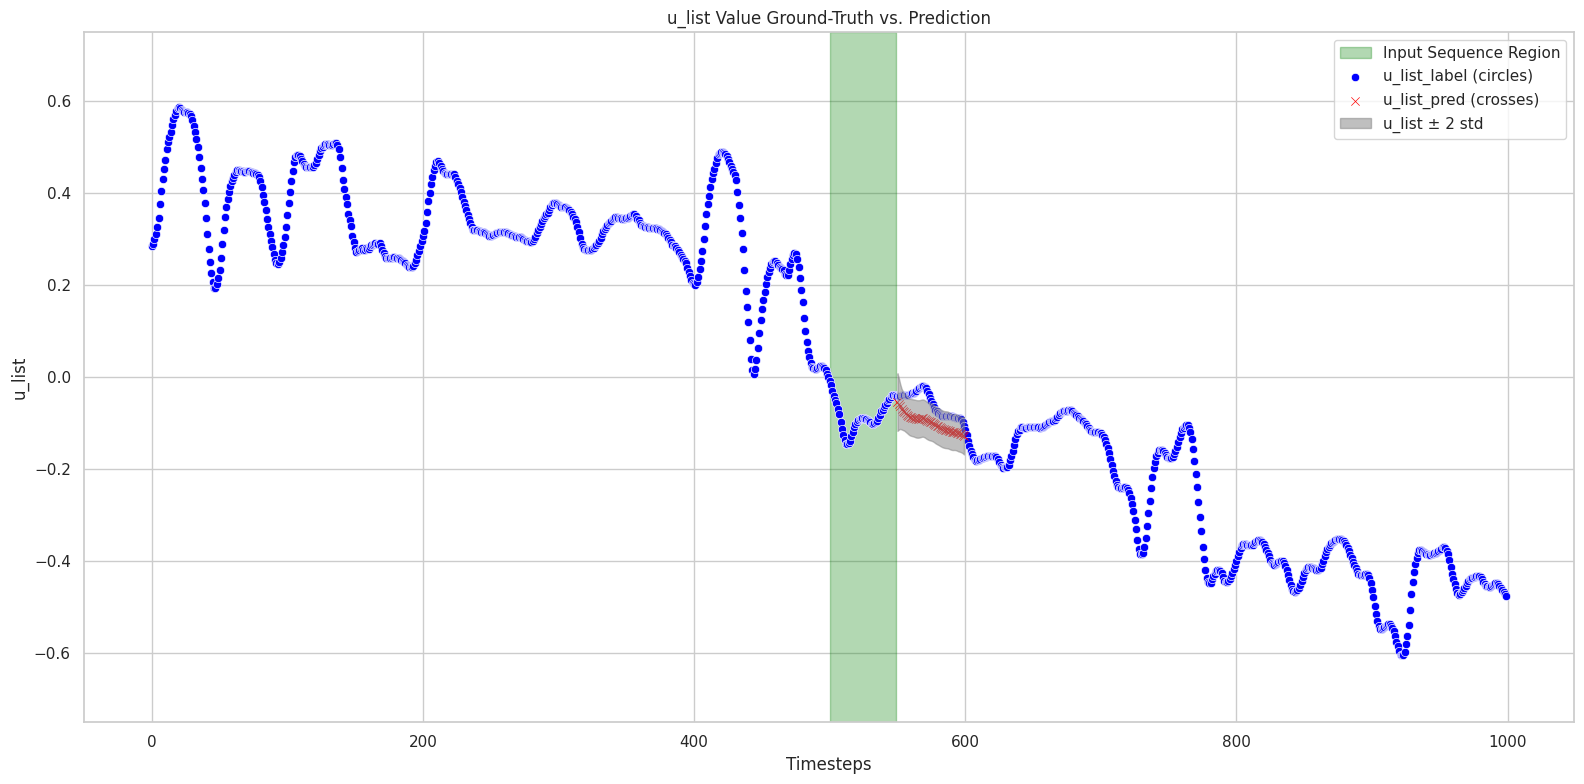

72it [00:08,  4.16it/s, single_test_loss=15.933352]

Output Timestep 551
    Input Timesteps [547 546 548 545 549 544 543 542 541 550]
    Scores ['0.02889', '0.02855', '0.02843', '0.02797', '0.02754', '0.02729', '0.02672', '0.02629', '0.02584', '0.02567']

Output Timestep 552
    Input Timesteps [547 546 548 545 544 549 543 542 541 540]
    Scores ['0.02873', '0.02854', '0.02816', '0.02810', '0.02755', '0.02709', '0.02704', '0.02660', '0.02610', '0.02571']

Output Timestep 553
    Input Timesteps [546 547 545 544 548 543 542 549 541 540]
    Scores ['0.02771', '0.02770', '0.02748', '0.02716', '0.02710', '0.02680', '0.02644', '0.02600', '0.02596', '0.02554']

Output Timestep 554
    Input Timesteps [546 545 547 544 543 542 548 541 540 549]
    Scores ['0.02644', '0.02640', '0.02630', '0.02626', '0.02603', '0.02577', '0.02574', '0.02535', '0.02493', '0.02475']

Output Timestep 555
    Input Timesteps [545 544 546 543 547 542 541 548 540 535]
    Scores ['0.02524', '0.02521', '0.02515', '0.02506', '0.02494', '0.02486', '0.02450', '0.02447'

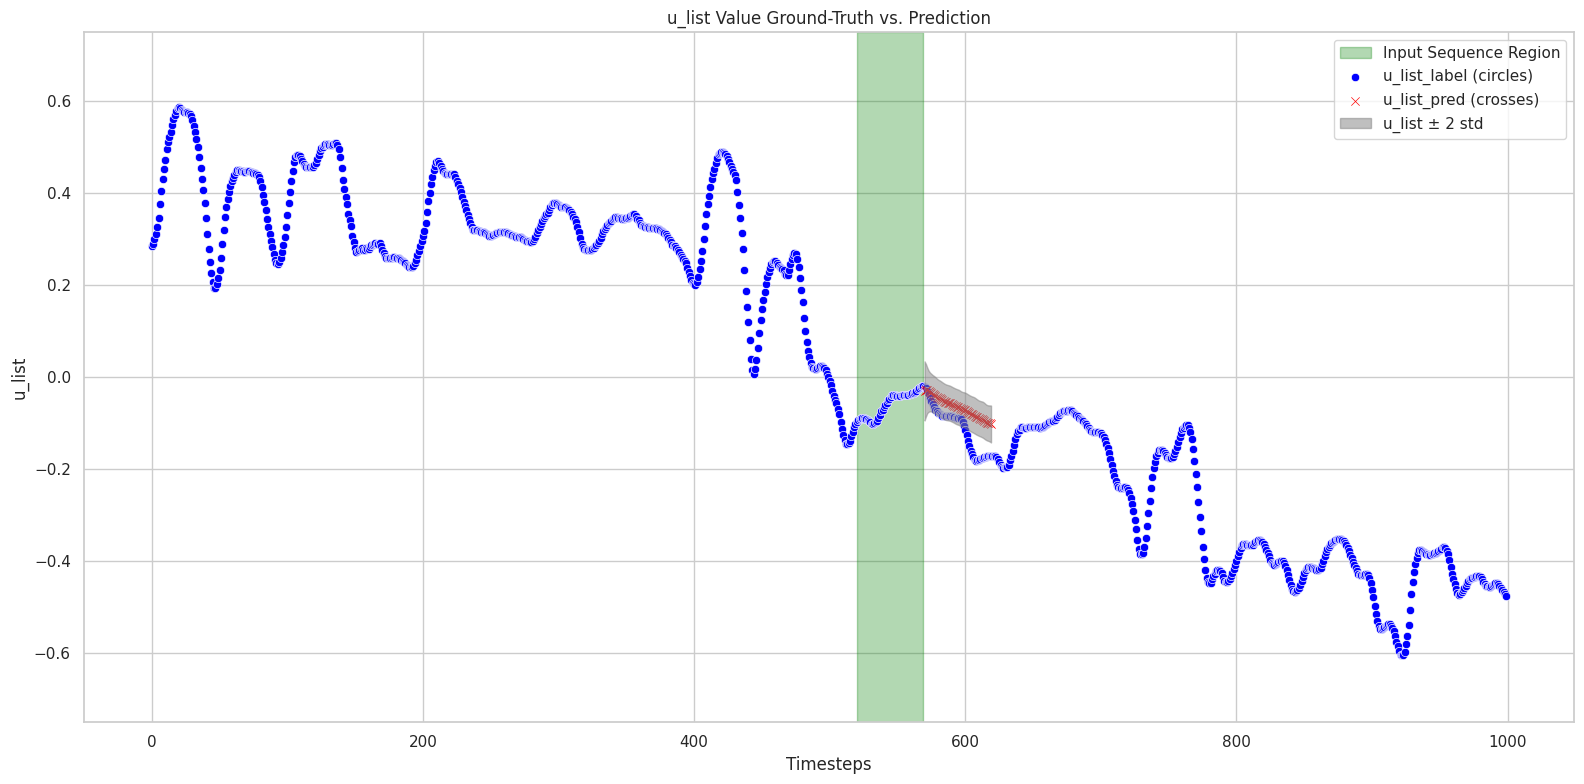

73it [00:08,  3.93it/s, single_test_loss=8.018991] 

Output Timestep 571
    Input Timesteps [568 567 566 569 564 565 563 570 562 561]
    Scores ['0.03106', '0.03088', '0.03075', '0.03061', '0.02994', '0.02988', '0.02914', '0.02903', '0.02863', '0.02789']

Output Timestep 572
    Input Timesteps [566 567 568 564 565 569 563 562 561 570]
    Scores ['0.03050', '0.03042', '0.03003', '0.02999', '0.02986', '0.02941', '0.02936', '0.02891', '0.02820', '0.02810']

Output Timestep 573
    Input Timesteps [566 564 565 567 563 562 561 568 560 569]
    Scores ['0.02923', '0.02915', '0.02898', '0.02879', '0.02878', '0.02853', '0.02798', '0.02784', '0.02739', '0.02711']

Output Timestep 574
    Input Timesteps [564 565 563 562 566 561 560 567 559 558]
    Scores ['0.02775', '0.02761', '0.02759', '0.02757', '0.02753', '0.02729', '0.02689', '0.02680', '0.02648', '0.02628']

Output Timestep 575
    Input Timesteps [562 561 564 563 565 560 566 559 558 557]
    Scores ['0.02655', '0.02649', '0.02646', '0.02639', '0.02639', '0.02626', '0.02610', '0.02590'

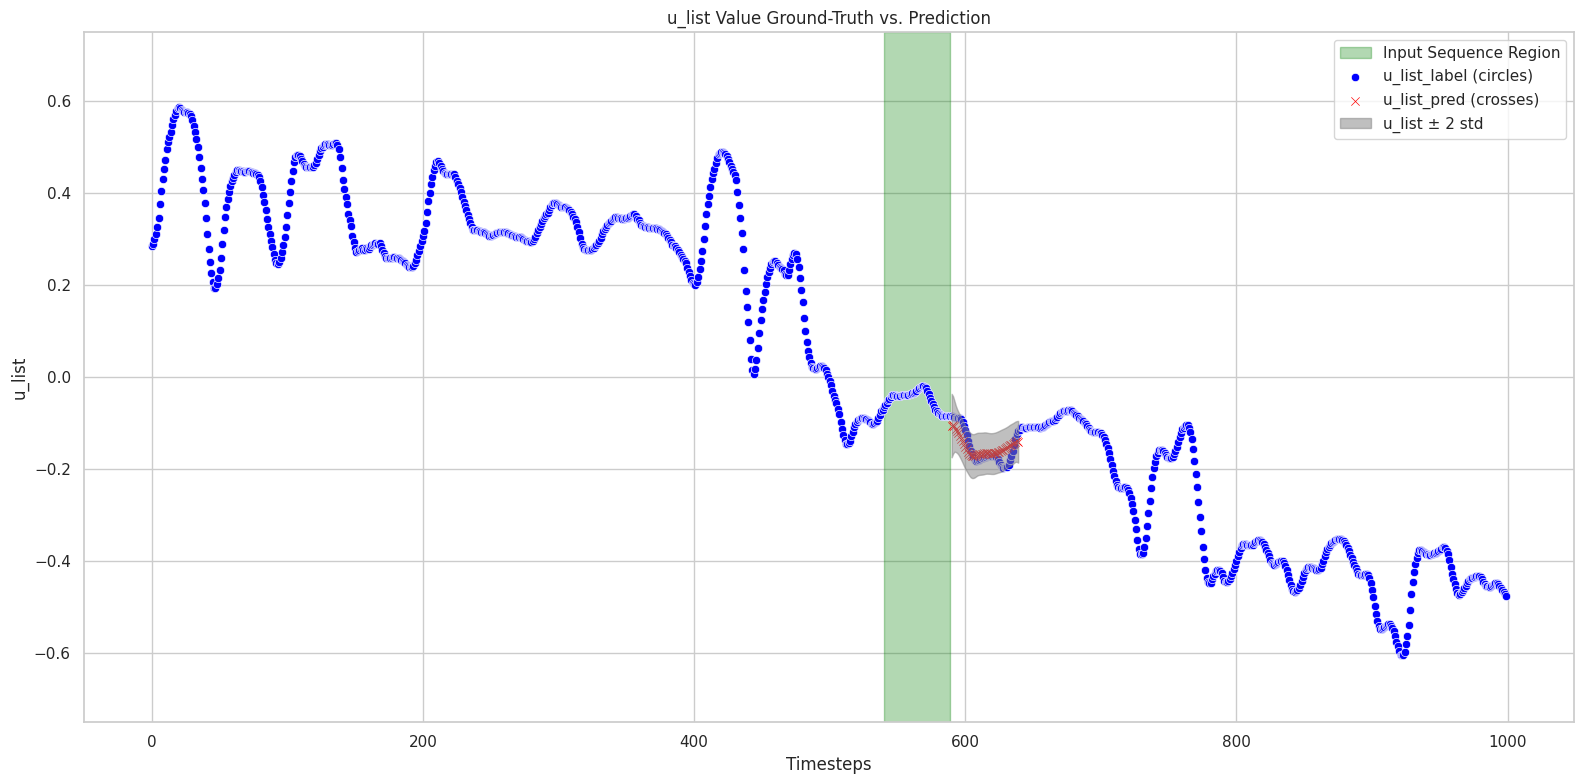

74it [00:09,  3.75it/s, single_test_loss=5.877914]

Output Timestep 591
    Input Timesteps [588 589 587 590 586 585 584 583 582 574]
    Scores ['0.02823', '0.02749', '0.02709', '0.02636', '0.02631', '0.02473', '0.02469', '0.02422', '0.02381', '0.02375']

Output Timestep 592
    Input Timesteps [588 587 589 586 590 585 584 583 582 575]
    Scores ['0.02785', '0.02719', '0.02676', '0.02665', '0.02557', '0.02534', '0.02531', '0.02487', '0.02451', '0.02353']

Output Timestep 593
    Input Timesteps [588 587 586 584 585 589 583 582 590 581]
    Scores ['0.02610', '0.02606', '0.02591', '0.02515', '0.02514', '0.02489', '0.02485', '0.02465', '0.02387', '0.02385']

Output Timestep 594
    Input Timesteps [586 587 584 585 583 582 588 581 580 575]
    Scores ['0.02482', '0.02466', '0.02458', '0.02453', '0.02440', '0.02439', '0.02427', '0.02390', '0.02367', '0.02358']

Output Timestep 595
    Input Timesteps [582 584 583 585 586 581 580 575 576 574]
    Scores ['0.02394', '0.02388', '0.02380', '0.02379', '0.02372', '0.02368', '0.02362', '0.02356'

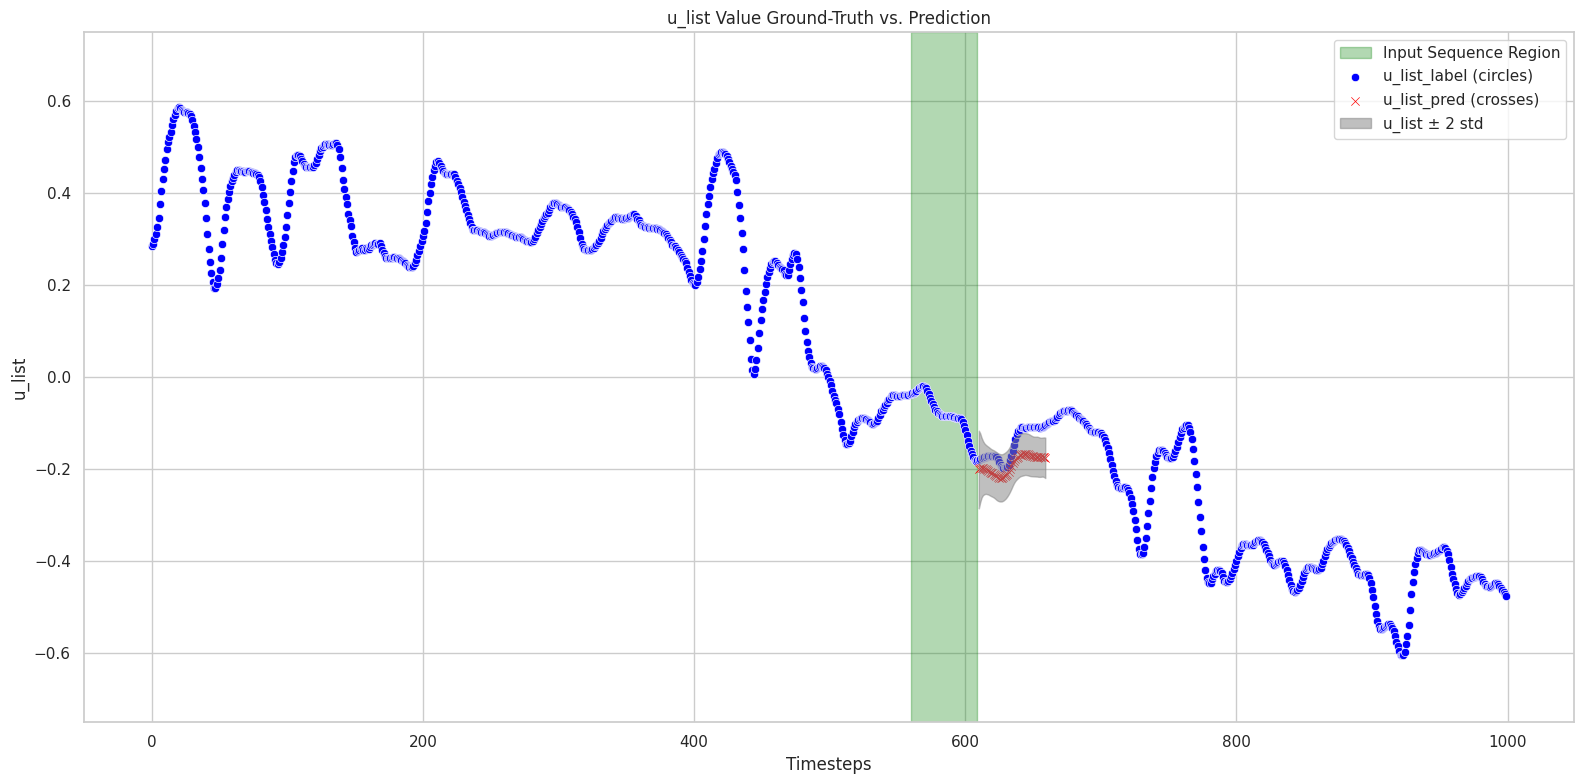

75it [00:09,  3.62it/s, single_test_loss=5.605326]

Output Timestep 611
    Input Timesteps [608 609 607 606 610 605 604 603 602 601]
    Scores ['0.03725', '0.03585', '0.03534', '0.03526', '0.03380', '0.03290', '0.03235', '0.03038', '0.02906', '0.02811']

Output Timestep 612
    Input Timesteps [608 609 607 606 610 605 604 603 602 601]
    Scores ['0.03517', '0.03407', '0.03379', '0.03379', '0.03231', '0.03176', '0.03157', '0.03003', '0.02896', '0.02827']

Output Timestep 613
    Input Timesteps [608 606 607 609 604 605 610 603 602 601]
    Scores ['0.03156', '0.03135', '0.03117', '0.03048', '0.03005', '0.02986', '0.02917', '0.02905', '0.02831', '0.02791']

Output Timestep 614
    Input Timesteps [606 607 604 608 605 603 602 609 601 600]
    Scores ['0.02889', '0.02851', '0.02837', '0.02827', '0.02796', '0.02782', '0.02734', '0.02728', '0.02716', '0.02681']

Output Timestep 615
    Input Timesteps [604 606 603 602 605 607 601 600 608 599]
    Scores ['0.02680', '0.02678', '0.02660', '0.02633', '0.02631', '0.02630', '0.02629', '0.02603'

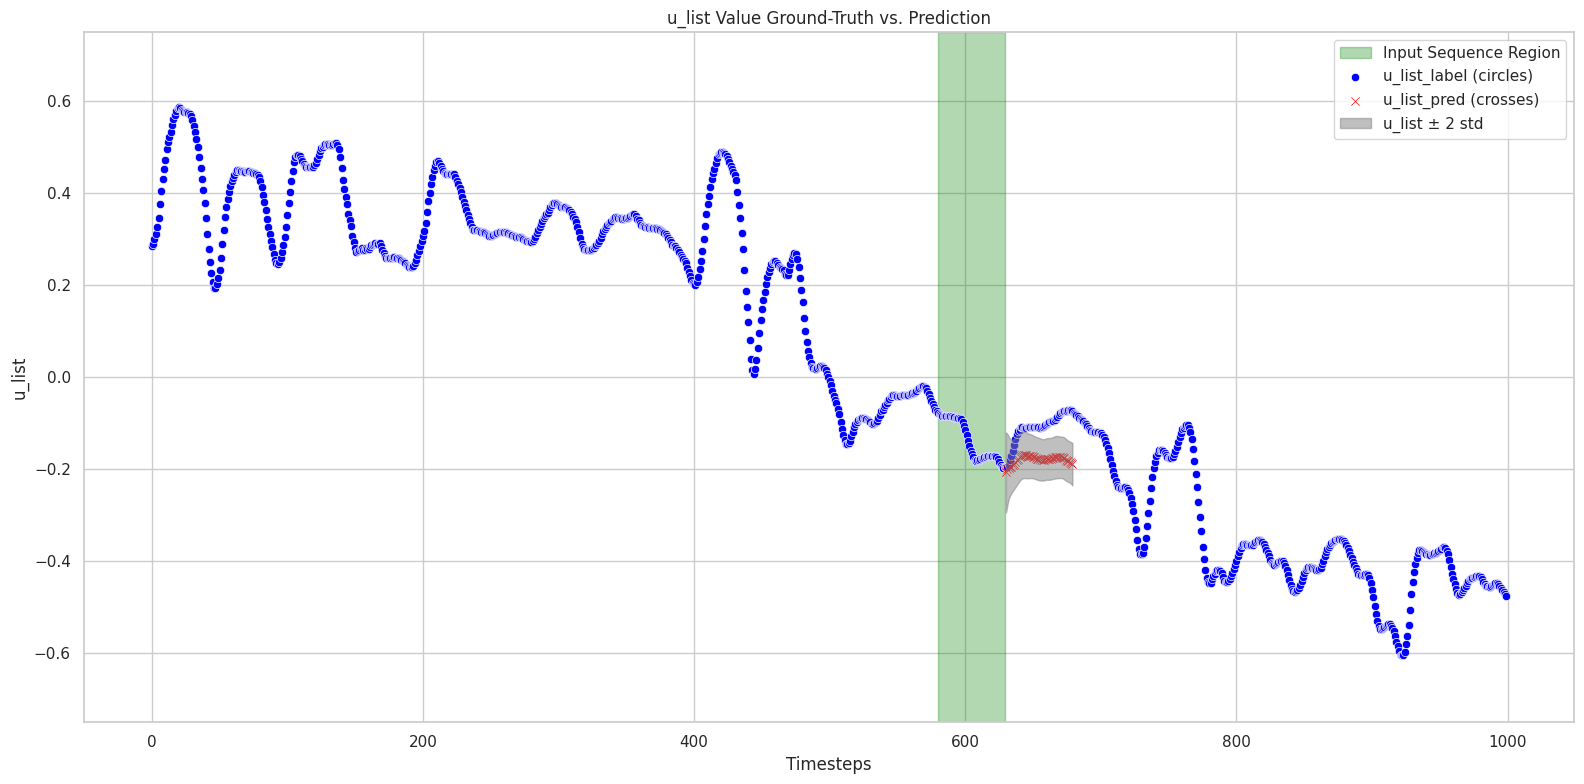

76it [00:09,  3.52it/s, single_test_loss=5.631275]

Output Timestep 631
    Input Timesteps [626 625 627 624 628 623 629 622 630 621]
    Scores ['0.02941', '0.02901', '0.02886', '0.02835', '0.02814', '0.02717', '0.02716', '0.02620', '0.02619', '0.02470']

Output Timestep 632
    Input Timesteps [626 625 627 624 628 623 629 622 630 621]
    Scores ['0.02872', '0.02845', '0.02826', '0.02796', '0.02761', '0.02699', '0.02662', '0.02614', '0.02569', '0.02475']

Output Timestep 633
    Input Timesteps [626 625 624 627 623 628 622 629 621 630]
    Scores ['0.02729', '0.02728', '0.02703', '0.02669', '0.02637', '0.02594', '0.02577', '0.02497', '0.02462', '0.02437']

Output Timestep 634
    Input Timesteps [625 624 626 623 622 627 621 628 620 619]
    Scores ['0.02589', '0.02587', '0.02570', '0.02551', '0.02516', '0.02497', '0.02432', '0.02418', '0.02393', '0.02360']

Output Timestep 635
    Input Timesteps [624 623 625 622 626 621 620 627 619 618]
    Scores ['0.02478', '0.02468', '0.02466', '0.02450', '0.02433', '0.02394', '0.02367', '0.02355'

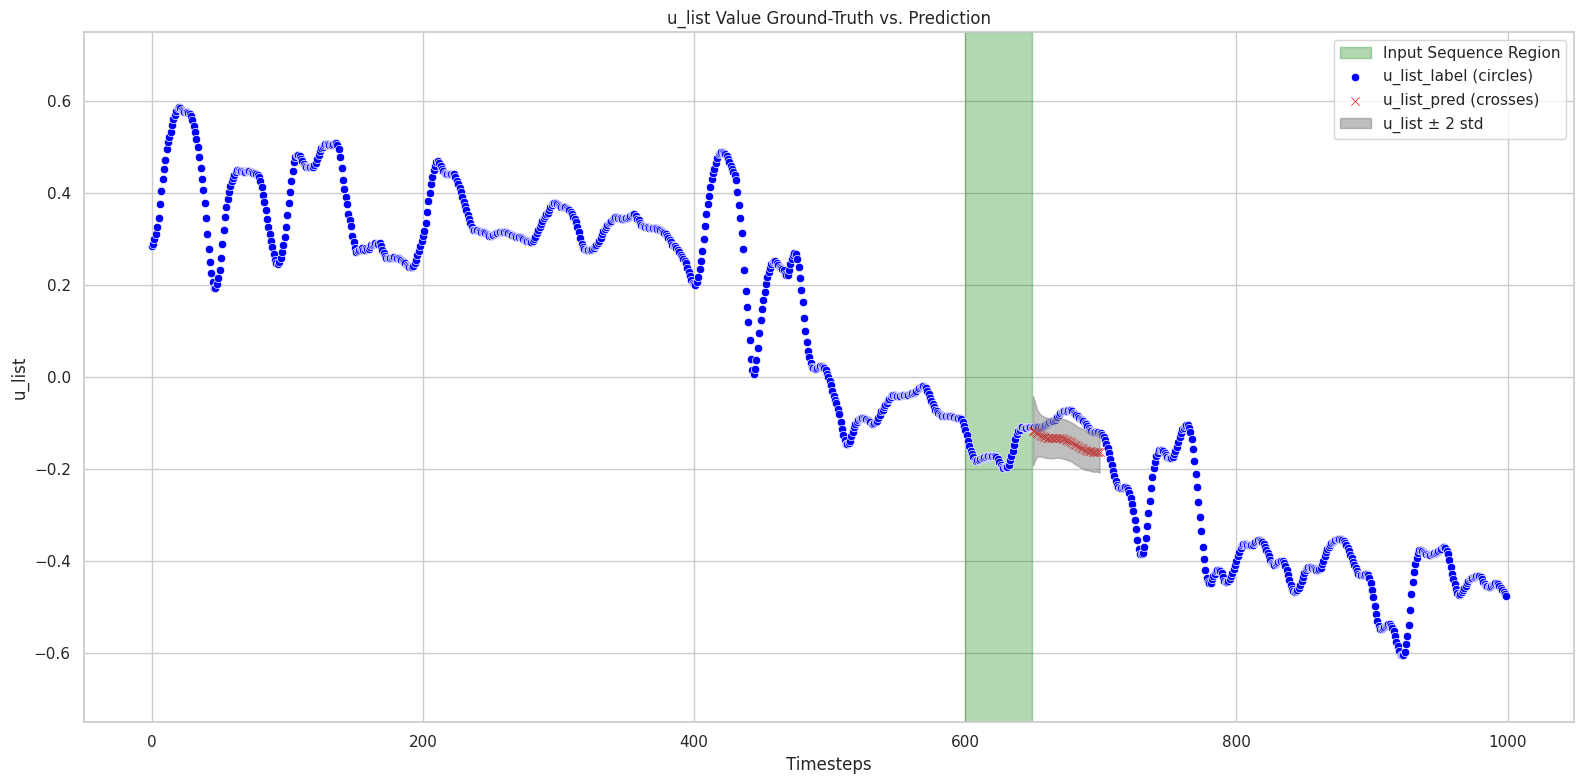

77it [00:10,  3.42it/s, single_test_loss=33.986382]

Output Timestep 651
    Input Timesteps [646 645 648 647 644 649 643 642 650 635]
    Scores ['0.02905', '0.02860', '0.02860', '0.02846', '0.02807', '0.02775', '0.02730', '0.02655', '0.02641', '0.02556']

Output Timestep 652
    Input Timesteps [646 645 647 644 648 643 649 642 650 635]
    Scores ['0.02903', '0.02871', '0.02847', '0.02828', '0.02824', '0.02765', '0.02719', '0.02691', '0.02592', '0.02573']

Output Timestep 653
    Input Timesteps [646 645 644 647 643 642 648 641 635 636]
    Scores ['0.02799', '0.02791', '0.02766', '0.02729', '0.02727', '0.02671', '0.02645', '0.02558', '0.02546', '0.02542']

Output Timestep 654
    Input Timesteps [645 646 644 643 642 647 641 635 636 640]
    Scores ['0.02644', '0.02636', '0.02635', '0.02619', '0.02589', '0.02557', '0.02524', '0.02500', '0.02497', '0.02480']

Output Timestep 655
    Input Timesteps [643 645 644 642 646 641 636 635 637 640]
    Scores ['0.02497', '0.02497', '0.02496', '0.02488', '0.02481', '0.02469', '0.02462', '0.02462'

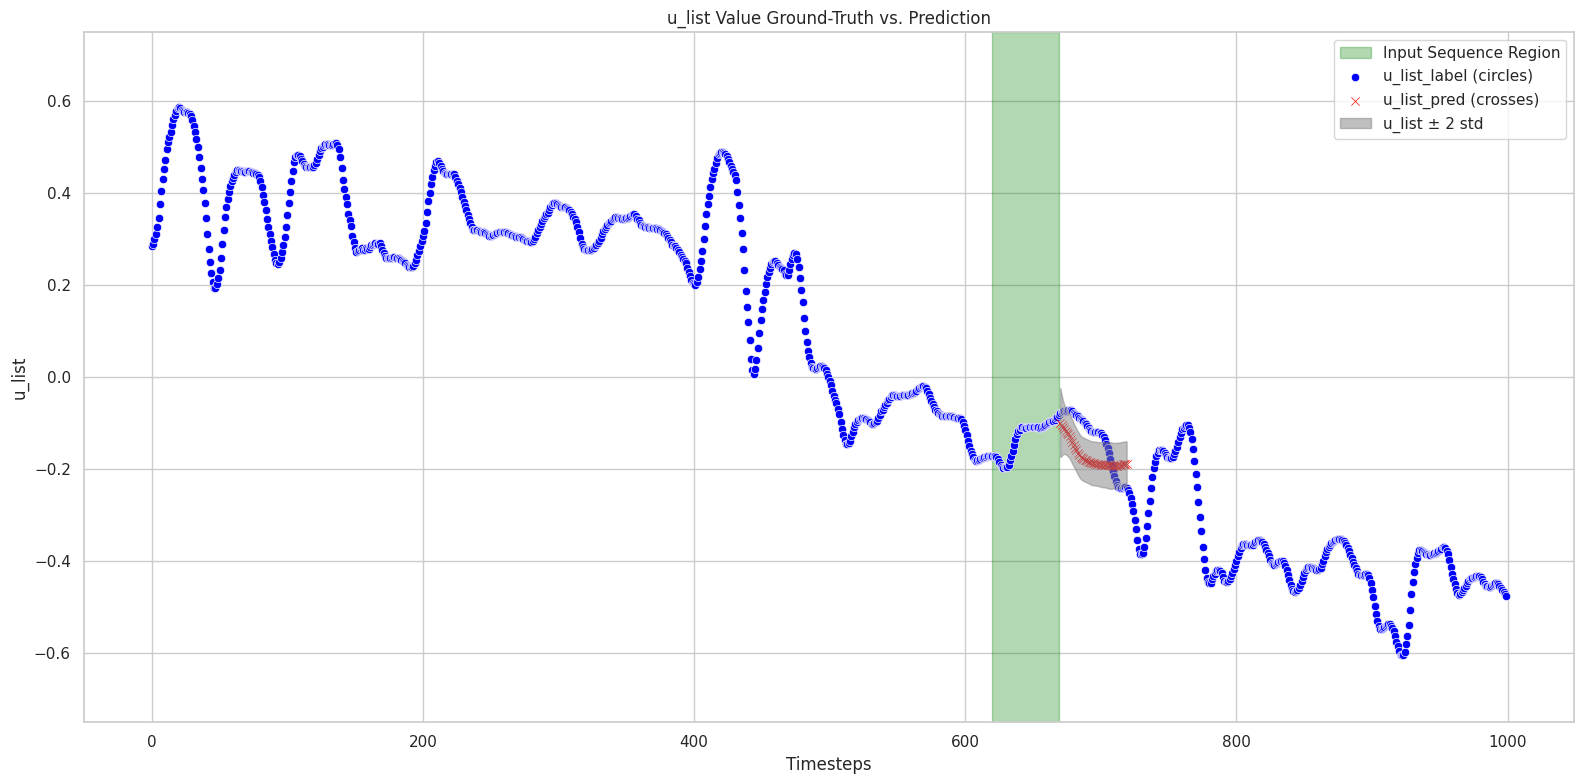

78it [00:10,  3.30it/s, single_test_loss=119.204597]

Output Timestep 671
    Input Timesteps [669 668 670 667 666 665 664 663 662 661]
    Scores ['0.03372', '0.03256', '0.03197', '0.03061', '0.02856', '0.02731', '0.02573', '0.02512', '0.02433', '0.02376']

Output Timestep 672
    Input Timesteps [669 668 670 667 666 665 664 663 662 661]
    Scores ['0.03140', '0.03118', '0.02988', '0.02978', '0.02824', '0.02722', '0.02586', '0.02534', '0.02463', '0.02408']

Output Timestep 673
    Input Timesteps [668 669 667 666 670 665 664 663 662 661]
    Scores ['0.02855', '0.02808', '0.02786', '0.02703', '0.02693', '0.02635', '0.02536', '0.02495', '0.02441', '0.02395']

Output Timestep 674
    Input Timesteps [668 667 666 669 665 670 664 663 662 661]
    Scores ['0.02602', '0.02582', '0.02552', '0.02533', '0.02517', '0.02449', '0.02449', '0.02418', '0.02383', '0.02350']

Output Timestep 675
    Input Timesteps [666 667 665 668 664 663 669 662 661 656]
    Scores ['0.02421', '0.02415', '0.02409', '0.02408', '0.02363', '0.02338', '0.02336', '0.02317'

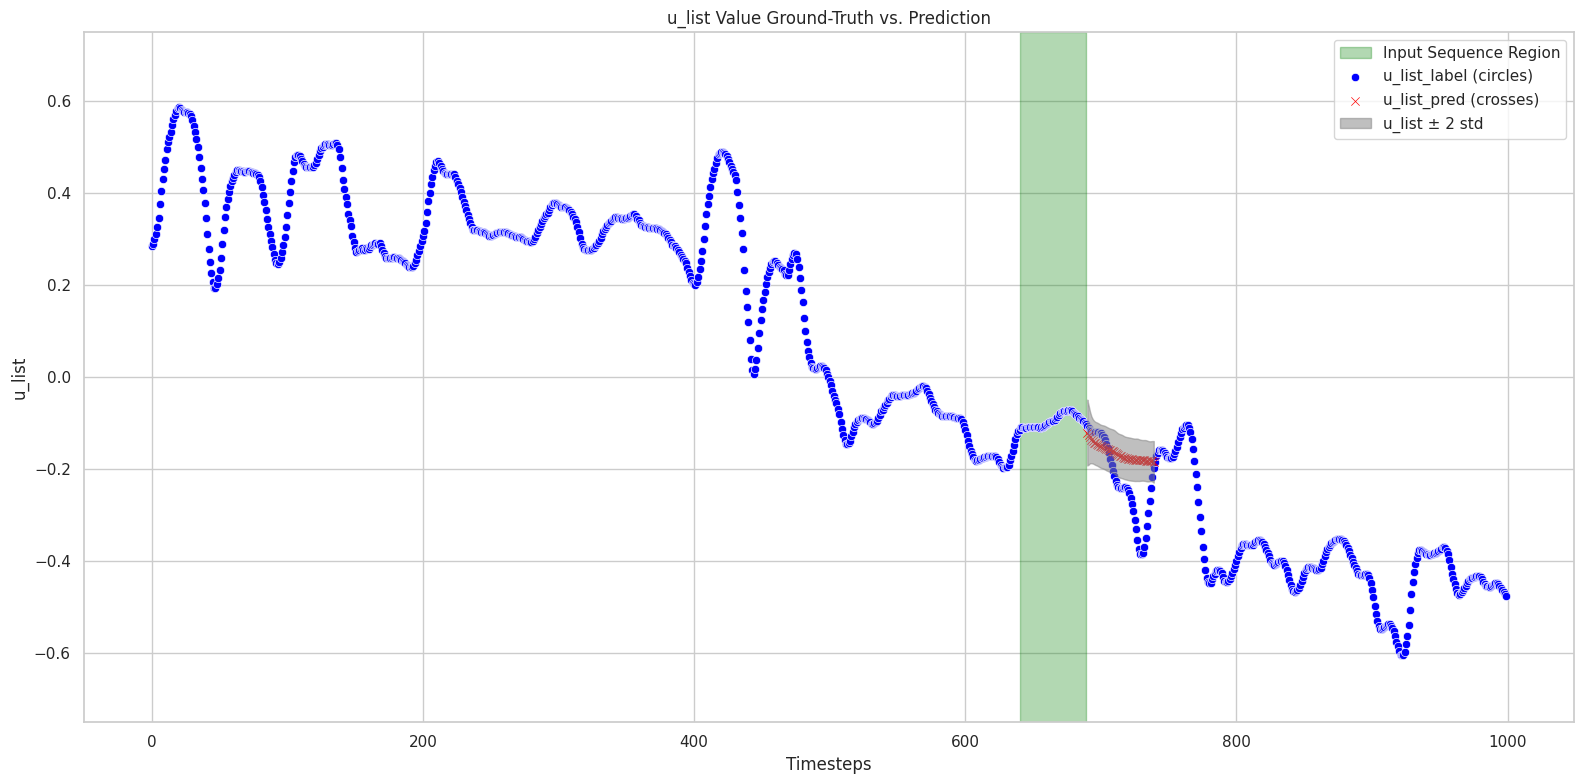

79it [00:10,  3.29it/s, single_test_loss=18.571177] 

Output Timestep 691
    Input Timesteps [688 689 687 690 686 685 684 683 682 681]
    Scores ['0.03115', '0.03077', '0.03051', '0.02973', '0.02942', '0.02883', '0.02808', '0.02711', '0.02705', '0.02703']

Output Timestep 692
    Input Timesteps [687 688 686 689 685 690 684 683 682 681]
    Scores ['0.03015', '0.02993', '0.02935', '0.02933', '0.02891', '0.02838', '0.02830', '0.02755', '0.02742', '0.02732']

Output Timestep 693
    Input Timesteps [687 686 685 684 688 683 682 681 689 690]
    Scores ['0.02851', '0.02820', '0.02800', '0.02760', '0.02758', '0.02715', '0.02705', '0.02700', '0.02683', '0.02614']

Output Timestep 694
    Input Timesteps [685 686 687 684 681 683 682 680 688 679]
    Scores ['0.02670', '0.02668', '0.02657', '0.02642', '0.02626', '0.02621', '0.02615', '0.02568', '0.02528', '0.02525']

Output Timestep 695
    Input Timesteps [685 681 686 684 683 682 680 687 679 678]
    Scores ['0.02554', '0.02547', '0.02537', '0.02531', '0.02526', '0.02523', '0.02514', '0.02500'

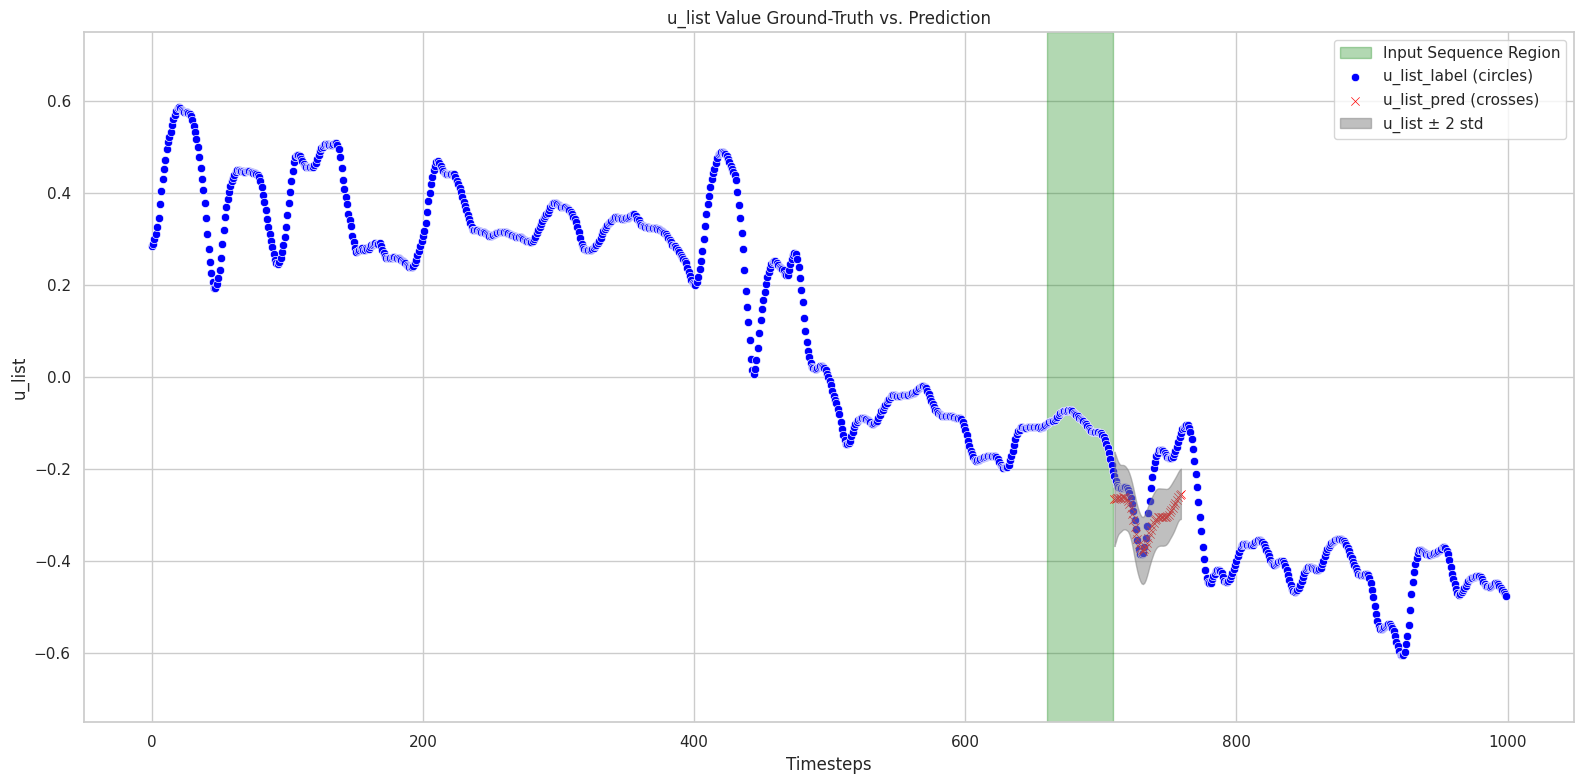

80it [00:11,  3.26it/s, single_test_loss=32.730499]

Output Timestep 711
    Input Timesteps [709 708 710 707 706 702 705 704 701 700]
    Scores ['0.02840', '0.02815', '0.02761', '0.02626', '0.02580', '0.02527', '0.02523', '0.02503', '0.02485', '0.02456']

Output Timestep 712
    Input Timesteps [709 702 708 701 710 700 699 704 703 705]
    Scores ['0.02606', '0.02585', '0.02581', '0.02560', '0.02551', '0.02522', '0.02510', '0.02476', '0.02467', '0.02454']

Output Timestep 713
    Input Timesteps [702 701 700 699 698 703 697 704 696 705]
    Scores ['0.02565', '0.02557', '0.02517', '0.02511', '0.02453', '0.02435', '0.02433', '0.02409', '0.02395', '0.02364']

Output Timestep 714
    Input Timesteps [701 702 700 699 698 697 696 703 690 688]
    Scores ['0.02523', '0.02508', '0.02483', '0.02481', '0.02439', '0.02431', '0.02374', '0.02369', '0.02355', '0.02336']

Output Timestep 715
    Input Timesteps [701 702 699 700 697 698 690 688 696 689]
    Scores ['0.02489', '0.02451', '0.02449', '0.02449', '0.02434', '0.02423', '0.02393', '0.02384'

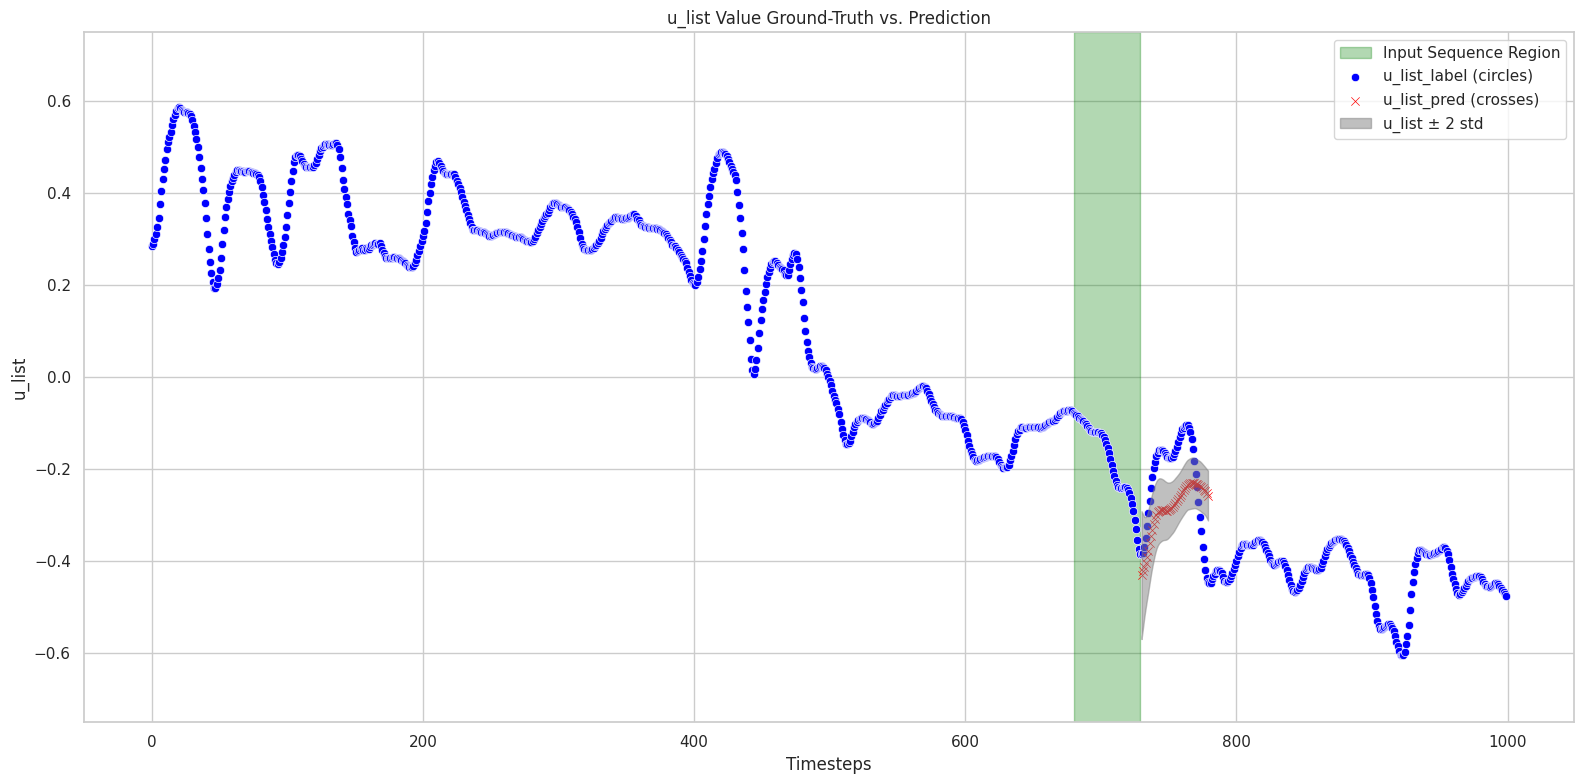

81it [00:11,  3.24it/s, single_test_loss=31.915689]

Output Timestep 731
    Input Timesteps [728 729 730 727 726 725 724 723 722 721]
    Scores ['0.03772', '0.03725', '0.03636', '0.03573', '0.03400', '0.03249', '0.03058', '0.02931', '0.02714', '0.02661']

Output Timestep 732
    Input Timesteps [728 729 730 727 726 725 724 723 722 721]
    Scores ['0.03686', '0.03654', '0.03572', '0.03506', '0.03343', '0.03218', '0.03063', '0.02960', '0.02769', '0.02734']

Output Timestep 733
    Input Timesteps [728 729 727 730 726 725 724 723 722 721]
    Scores ['0.03371', '0.03320', '0.03279', '0.03247', '0.03168', '0.03091', '0.02989', '0.02933', '0.02787', '0.02780']

Output Timestep 734
    Input Timesteps [728 727 726 729 725 730 724 723 721 718]
    Scores ['0.03009', '0.03009', '0.02955', '0.02938', '0.02921', '0.02876', '0.02858', '0.02847', '0.02777', '0.02766']

Output Timestep 735
    Input Timesteps [727 718 726 725 721 723 720 719 724 728]
    Scores ['0.02756', '0.02749', '0.02746', '0.02744', '0.02740', '0.02733', '0.02731', '0.02716'

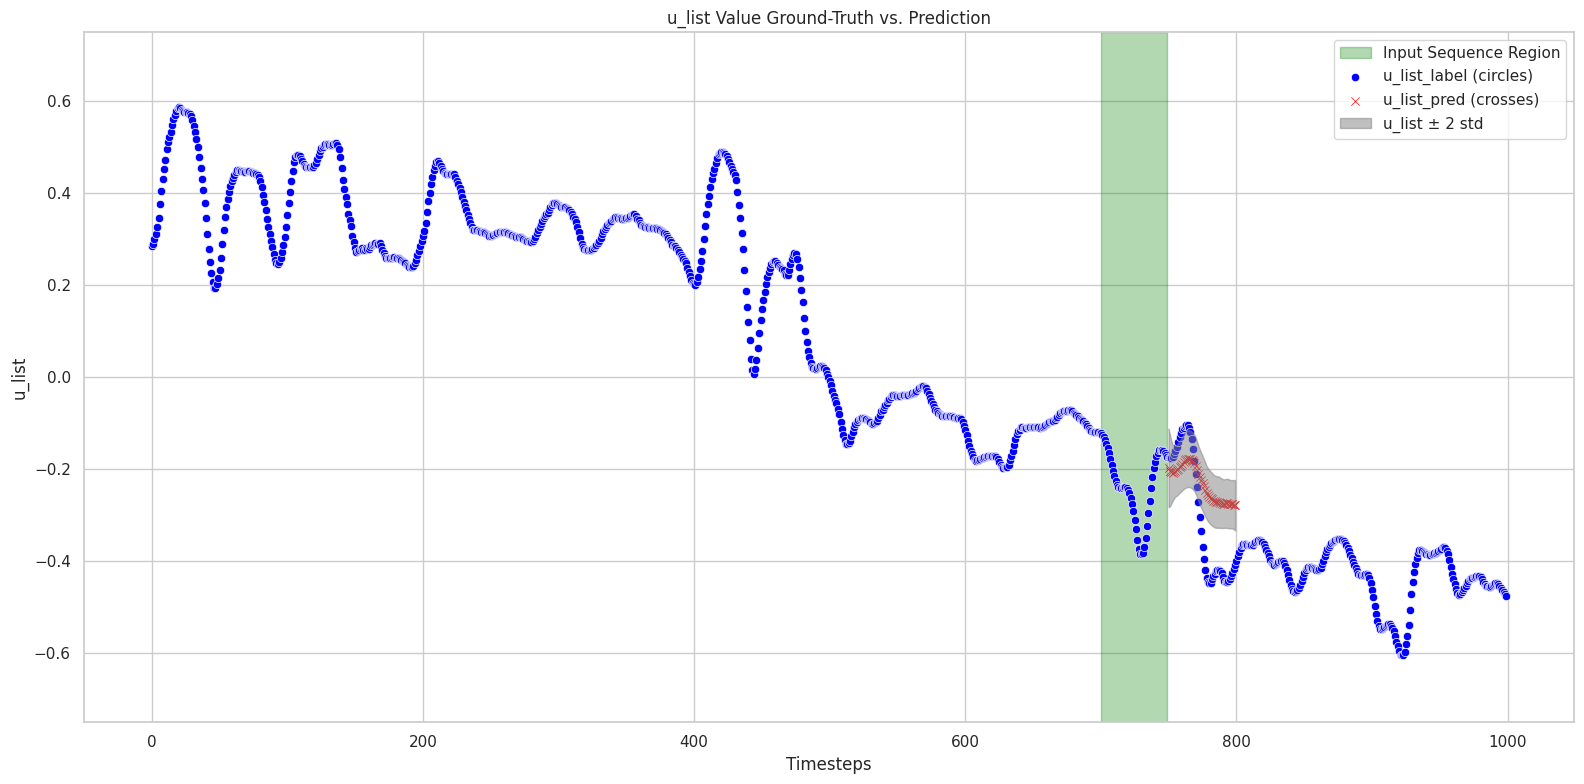

82it [00:11,  3.25it/s, single_test_loss=24.854980]

Output Timestep 751
    Input Timesteps [748 749 750 747 746 745 744 735 734 743]
    Scores ['0.02715', '0.02712', '0.02634', '0.02627', '0.02572', '0.02534', '0.02452', '0.02427', '0.02424', '0.02419']

Output Timestep 752
    Input Timesteps [748 749 747 746 745 750 744 743 742 738]
    Scores ['0.02785', '0.02733', '0.02729', '0.02684', '0.02645', '0.02632', '0.02572', '0.02531', '0.02459', '0.02404']

Output Timestep 753
    Input Timesteps [748 747 746 745 749 744 743 750 742 741]
    Scores ['0.02693', '0.02682', '0.02663', '0.02638', '0.02617', '0.02595', '0.02560', '0.02523', '0.02502', '0.02422']

Output Timestep 754
    Input Timesteps [746 747 745 744 748 743 742 749 741 750]
    Scores ['0.02558', '0.02552', '0.02548', '0.02534', '0.02528', '0.02507', '0.02468', '0.02447', '0.02402', '0.02371']

Output Timestep 755
    Input Timesteps [744 745 746 743 747 742 748 741 740 749]
    Scores ['0.02443', '0.02440', '0.02440', '0.02421', '0.02419', '0.02396', '0.02375', '0.02345'

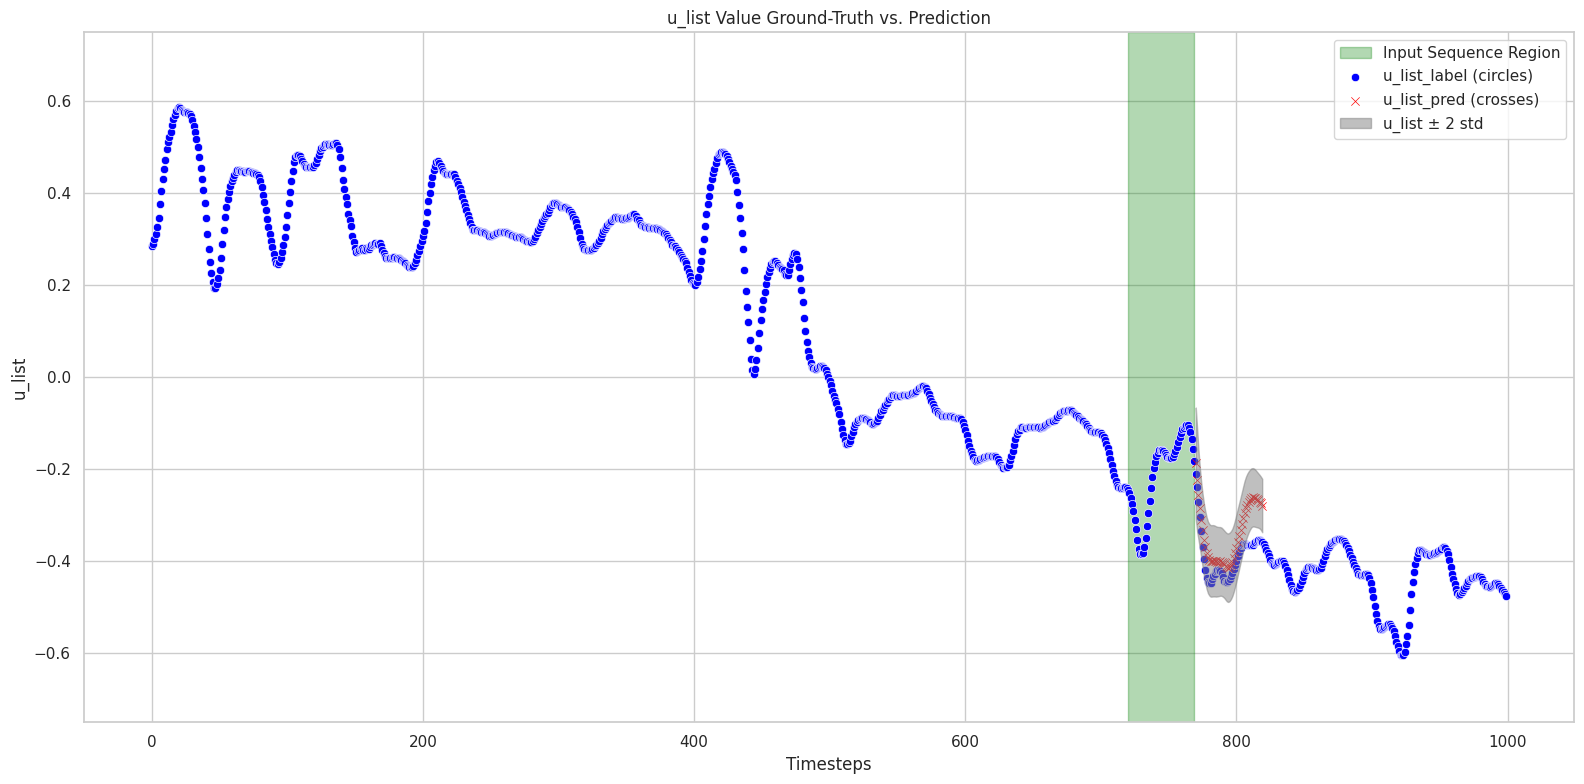

83it [00:11,  3.17it/s, single_test_loss=15.394571]

Output Timestep 771
    Input Timesteps [767 768 766 769 765 770 764 763 762 761]
    Scores ['0.03830', '0.03815', '0.03425', '0.03223', '0.03062', '0.02706', '0.02668', '0.02535', '0.02447', '0.02383']

Output Timestep 772
    Input Timesteps [768 767 769 766 765 770 764 763 762 761]
    Scores ['0.03845', '0.03766', '0.03428', '0.03375', '0.03033', '0.02924', '0.02688', '0.02557', '0.02468', '0.02388']

Output Timestep 773
    Input Timesteps [768 767 769 766 765 770 764 763 762 761]
    Scores ['0.03535', '0.03473', '0.03251', '0.03191', '0.02936', '0.02864', '0.02673', '0.02566', '0.02490', '0.02400']

Output Timestep 774
    Input Timesteps [768 767 769 766 765 770 764 763 762 761]
    Scores ['0.03139', '0.03106', '0.02957', '0.02934', '0.02774', '0.02700', '0.02596', '0.02521', '0.02463', '0.02380']

Output Timestep 775
    Input Timesteps [768 767 766 769 765 770 764 763 762 761]
    Scores ['0.02799', '0.02785', '0.02686', '0.02682', '0.02596', '0.02523', '0.02484', '0.02438'

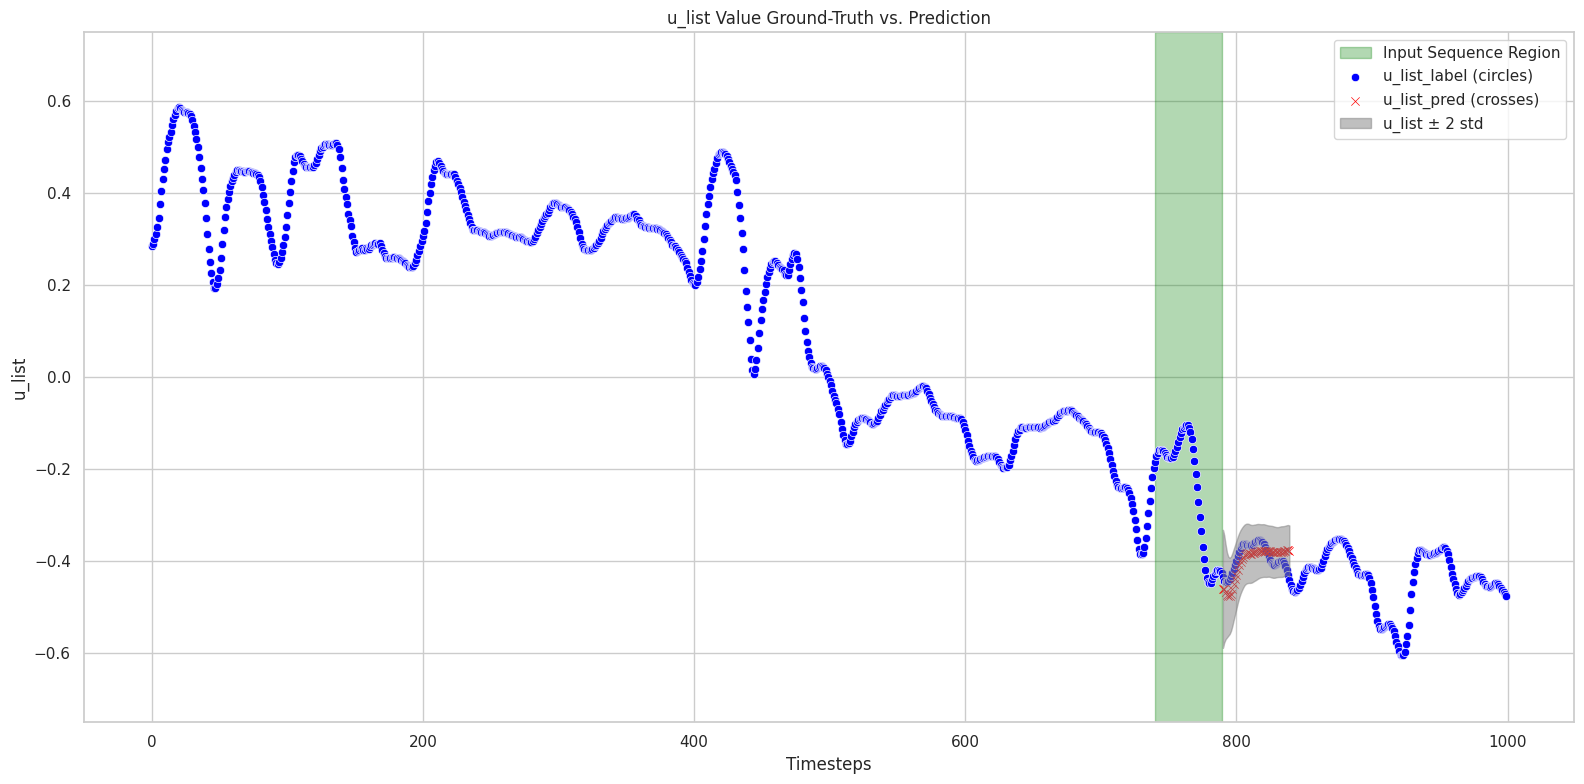

84it [00:12,  3.18it/s, single_test_loss=18.958776]

Output Timestep 791
    Input Timesteps [788 789 787 786 785 790 784 783 765 766]
    Scores ['0.02939', '0.02918', '0.02869', '0.02760', '0.02744', '0.02630', '0.02604', '0.02466', '0.02422', '0.02389']

Output Timestep 792
    Input Timesteps [787 788 786 785 789 784 790 783 782 766]
    Scores ['0.02903', '0.02896', '0.02870', '0.02860', '0.02859', '0.02728', '0.02607', '0.02600', '0.02391', '0.02353']

Output Timestep 793
    Input Timesteps [785 786 787 784 783 788 789 782 781 790]
    Scores ['0.02866', '0.02846', '0.02778', '0.02770', '0.02679', '0.02643', '0.02575', '0.02513', '0.02389', '0.02384']

Output Timestep 794
    Input Timesteps [785 786 784 783 787 782 781 788 774 775]
    Scores ['0.02807', '0.02754', '0.02751', '0.02700', '0.02614', '0.02572', '0.02462', '0.02381', '0.02344', '0.02319']

Output Timestep 795
    Input Timesteps [785 784 783 786 782 781 787 774 775 773]
    Scores ['0.02729', '0.02710', '0.02692', '0.02650', '0.02585', '0.02482', '0.02478', '0.02343'

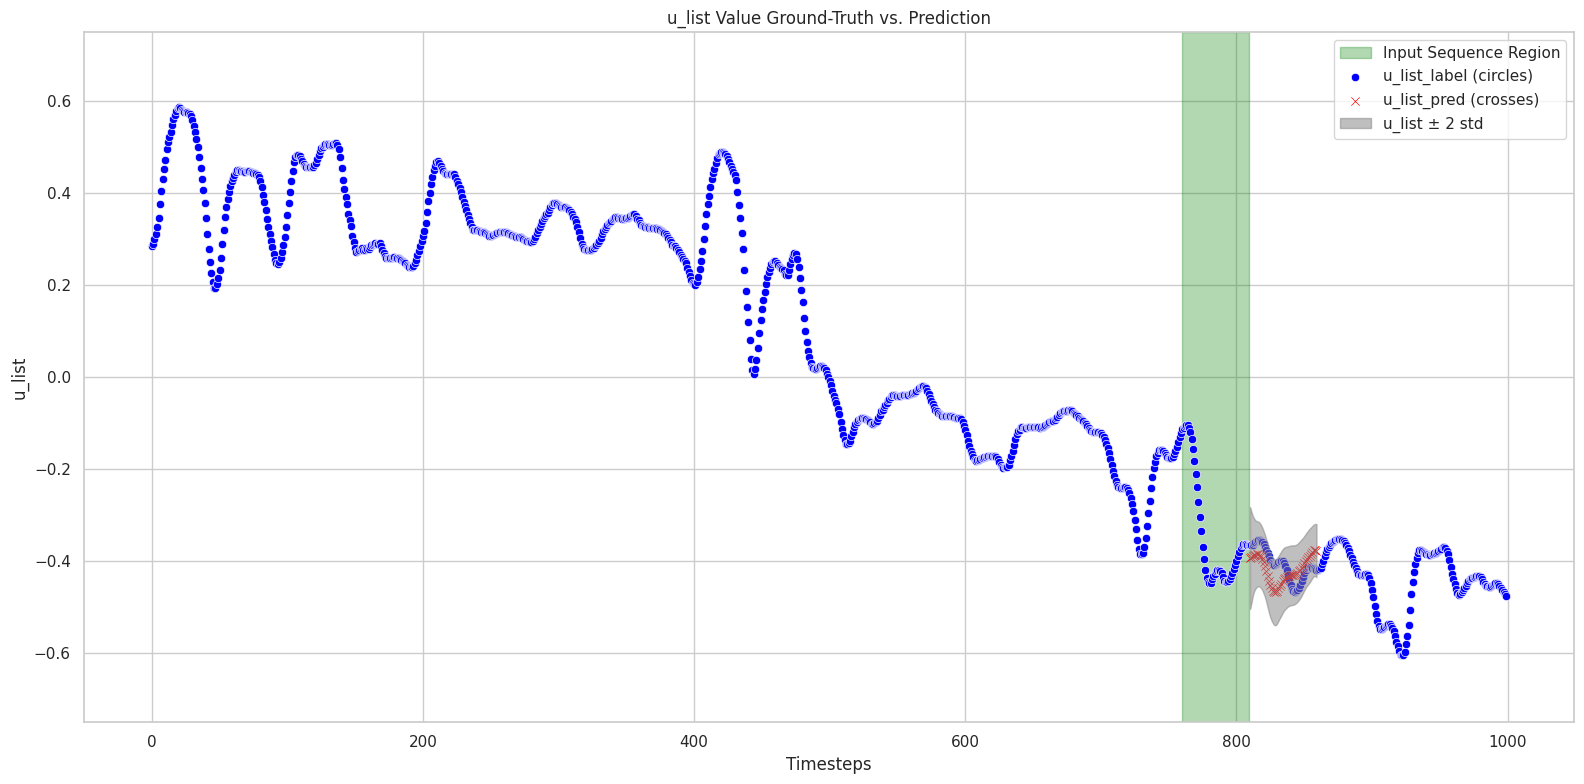

85it [00:12,  3.21it/s, single_test_loss=22.685892]

Output Timestep 811
    Input Timesteps [810 809 808 792 794 793 802 801 791 803]
    Scores ['0.03052', '0.02978', '0.02850', '0.02724', '0.02621', '0.02614', '0.02517', '0.02515', '0.02510', '0.02508']

Output Timestep 812
    Input Timesteps [810 802 801 809 794 803 792 800 808 795]
    Scores ['0.02655', '0.02632', '0.02630', '0.02624', '0.02607', '0.02594', '0.02573', '0.02569', '0.02560', '0.02553']

Output Timestep 813
    Input Timesteps [801 802 800 803 796 799 795 804 794 797]
    Scores ['0.02647', '0.02646', '0.02592', '0.02584', '0.02566', '0.02566', '0.02526', '0.02506', '0.02506', '0.02490']

Output Timestep 814
    Input Timesteps [801 802 800 799 803 796 797 798 795 804]
    Scores ['0.02629', '0.02618', '0.02586', '0.02577', '0.02535', '0.02529', '0.02482', '0.02471', '0.02451', '0.02439']

Output Timestep 815
    Input Timesteps [801 802 799 800 803 796 797 798 804 795]
    Scores ['0.02598', '0.02583', '0.02570', '0.02566', '0.02492', '0.02484', '0.02461', '0.02445'

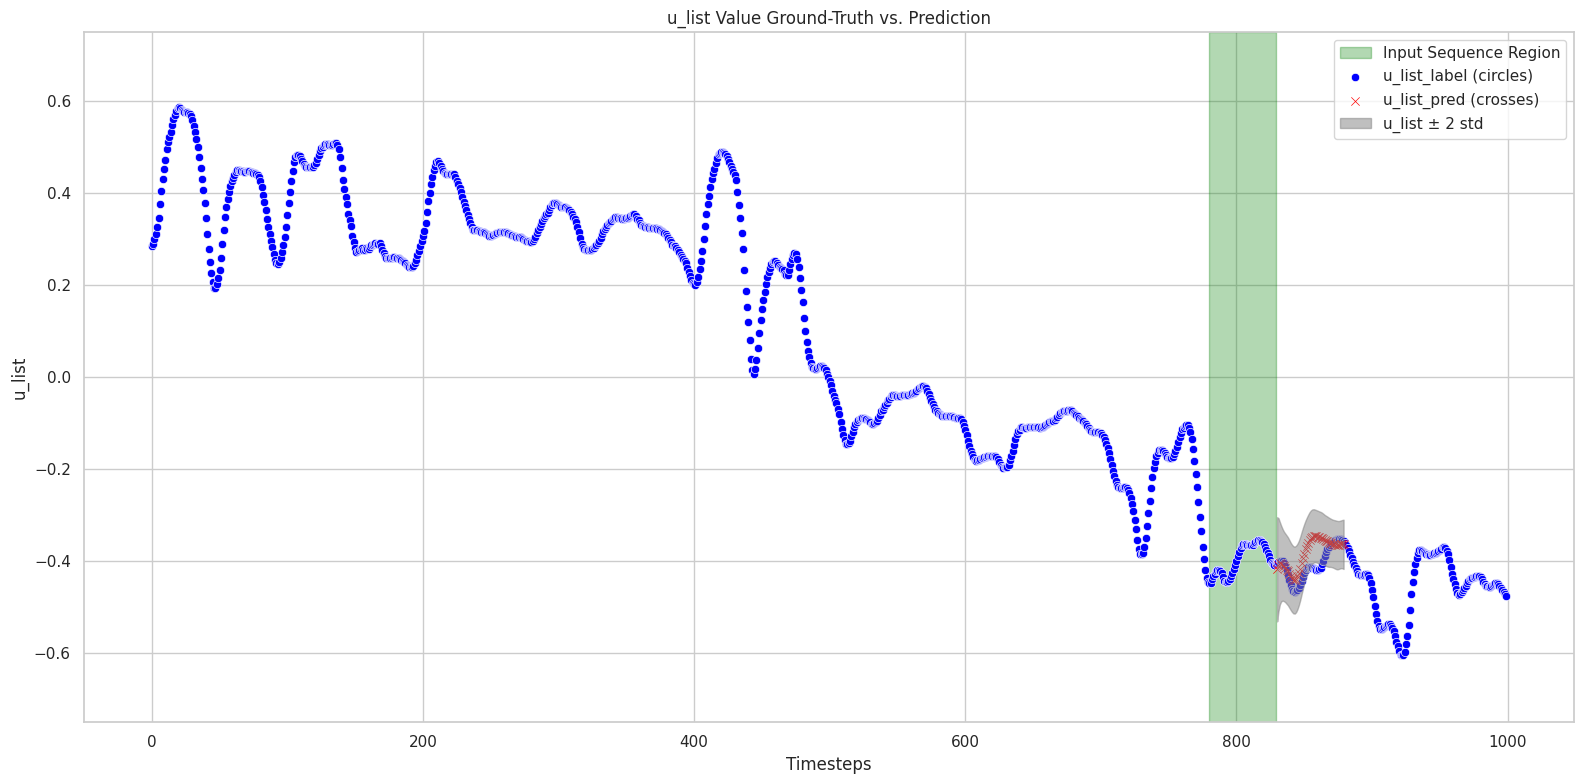

86it [00:12,  3.21it/s, single_test_loss=27.070290]

Output Timestep 831
    Input Timesteps [828 827 829 826 830 825 824 823 822 821]
    Scores ['0.03543', '0.03525', '0.03449', '0.03414', '0.03289', '0.03282', '0.03112', '0.02971', '0.02844', '0.02704']

Output Timestep 832
    Input Timesteps [828 827 829 826 830 825 824 823 822 821]
    Scores ['0.03353', '0.03322', '0.03315', '0.03226', '0.03192', '0.03132', '0.03014', '0.02918', '0.02819', '0.02732']

Output Timestep 833
    Input Timesteps [827 828 829 826 825 830 824 823 822 821]
    Scores ['0.03072', '0.03053', '0.03022', '0.03004', '0.02949', '0.02929', '0.02886', '0.02833', '0.02762', '0.02727']

Output Timestep 834
    Input Timesteps [827 826 825 824 828 823 829 821 822 820]
    Scores ['0.02814', '0.02784', '0.02767', '0.02748', '0.02738', '0.02730', '0.02711', '0.02682', '0.02680', '0.02655']

Output Timestep 835
    Input Timesteps [816 821 823 815 824 820 817 825 822 818]
    Scores ['0.02637', '0.02636', '0.02631', '0.02629', '0.02620', '0.02616', '0.02611', '0.02606'

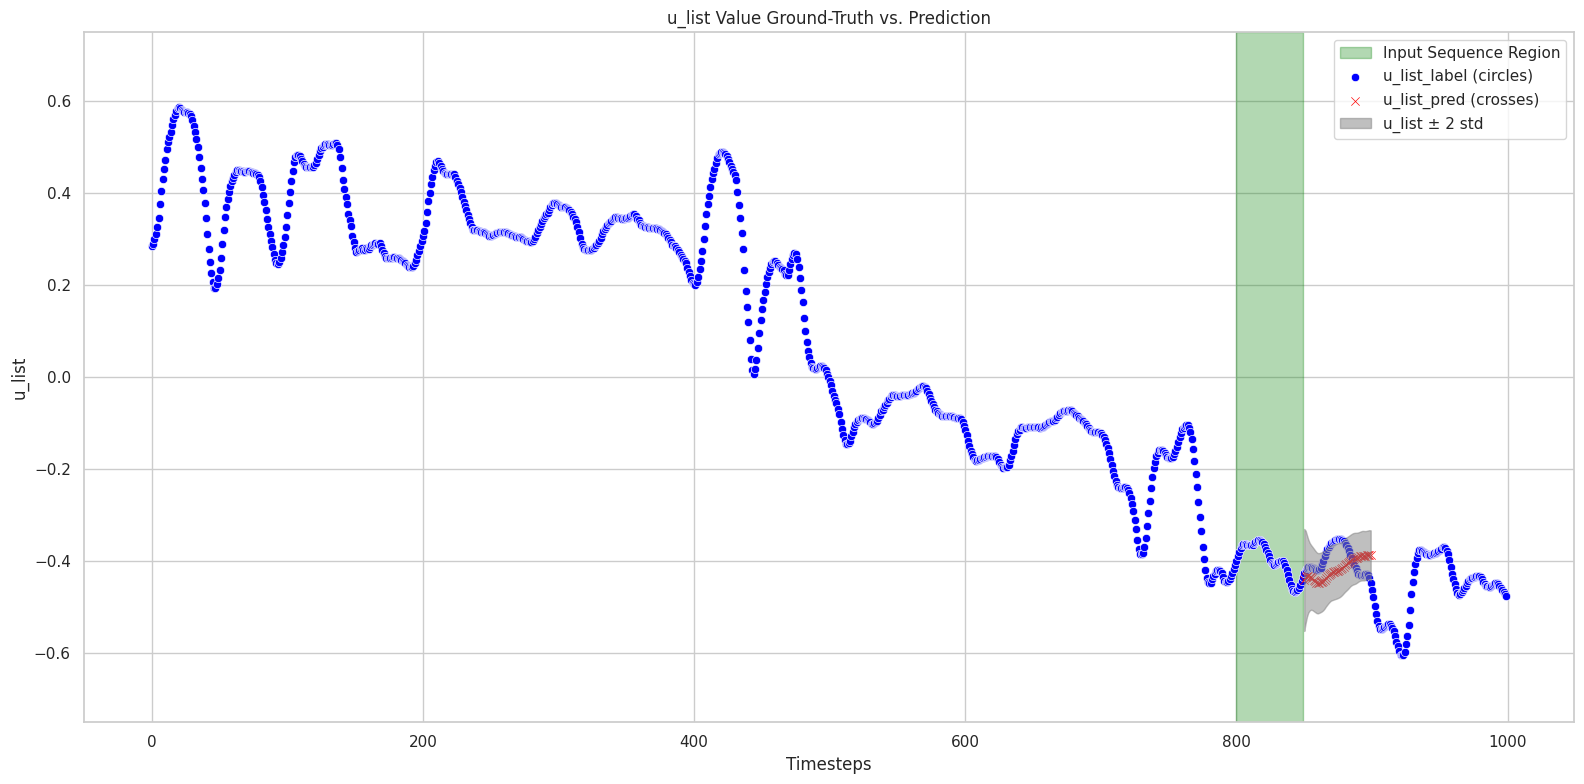

87it [00:13,  3.22it/s, single_test_loss=78.746552]

Output Timestep 851
    Input Timesteps [835 836 837 834 838 839 833 840 841 832]
    Scores ['0.02757', '0.02738', '0.02694', '0.02656', '0.02637', '0.02630', '0.02604', '0.02556', '0.02407', '0.02387']

Output Timestep 852
    Input Timesteps [835 836 837 834 839 838 833 840 842 841]
    Scores ['0.02678', '0.02651', '0.02605', '0.02597', '0.02573', '0.02562', '0.02556', '0.02534', '0.02470', '0.02443']

Output Timestep 853
    Input Timesteps [835 836 842 839 840 834 837 838 833 841]
    Scores ['0.02611', '0.02585', '0.02551', '0.02545', '0.02540', '0.02539', '0.02539', '0.02512', '0.02512', '0.02498']

Output Timestep 854
    Input Timesteps [842 835 840 836 839 841 837 843 834 838]
    Scores ['0.02578', '0.02558', '0.02544', '0.02537', '0.02530', '0.02529', '0.02496', '0.02496', '0.02494', '0.02483']

Output Timestep 855
    Input Timesteps [842 840 835 841 839 836 837 834 838 833]
    Scores ['0.02549', '0.02530', '0.02523', '0.02519', '0.02514', '0.02503', '0.02469', '0.02467'

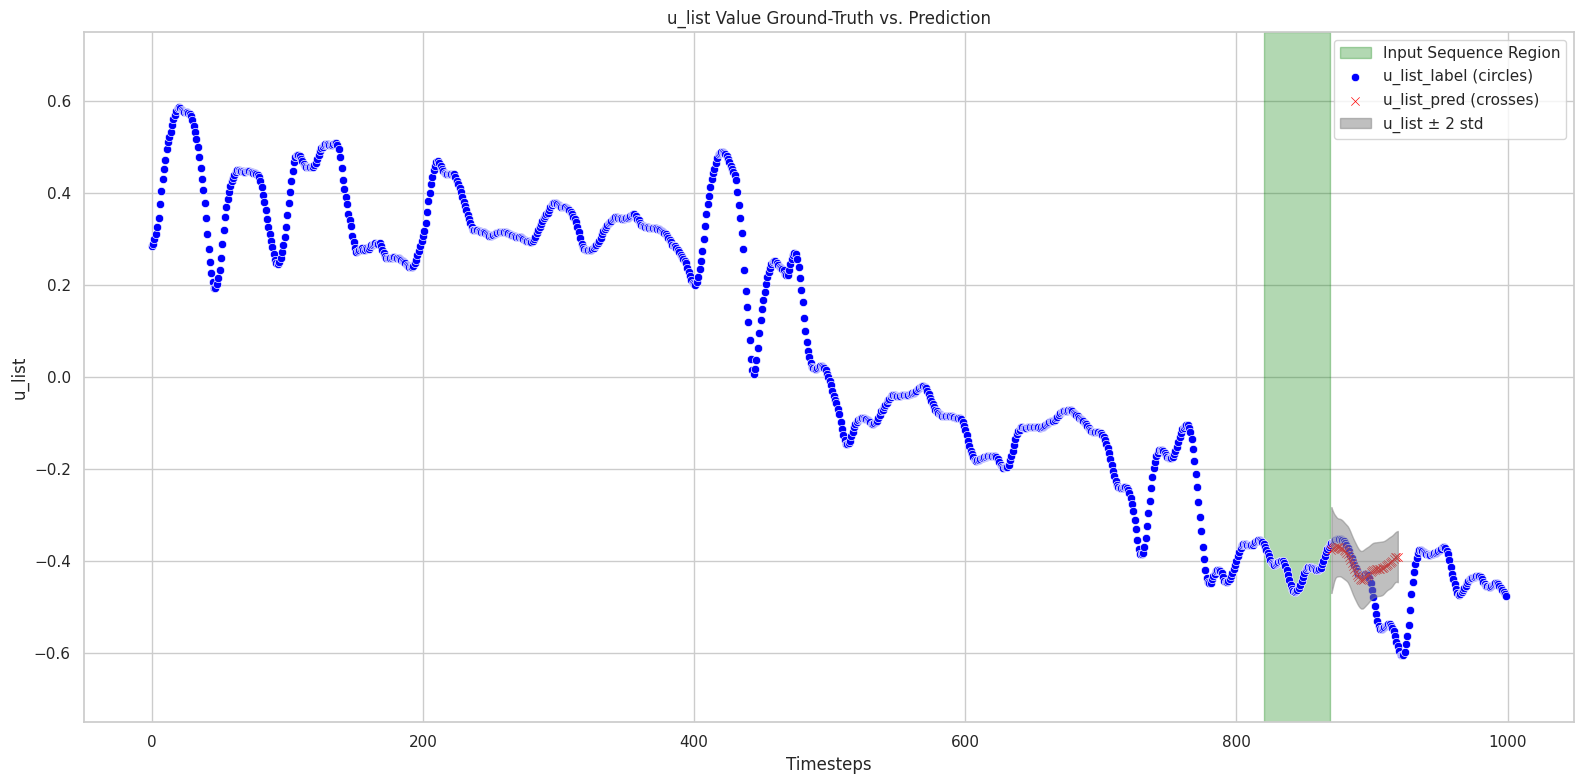

88it [00:13,  3.19it/s, single_test_loss=131.790207]

Output Timestep 871
    Input Timesteps [869 870 868 867 866 857 855 854 859 858]
    Scores ['0.03338', '0.03311', '0.02924', '0.02757', '0.02699', '0.02670', '0.02660', '0.02654', '0.02650', '0.02625']

Output Timestep 872
    Input Timesteps [870 869 868 857 855 854 867 859 866 858]
    Scores ['0.03084', '0.03044', '0.02694', '0.02636', '0.02613', '0.02609', '0.02601', '0.02595', '0.02590', '0.02576']

Output Timestep 873
    Input Timesteps [869 870 861 860 862 857 859 863 866 865]
    Scores ['0.02605', '0.02588', '0.02518', '0.02518', '0.02505', '0.02498', '0.02493', '0.02487', '0.02483', '0.02478']

Output Timestep 874
    Input Timesteps [862 861 863 860 864 865 866 859 857 867]
    Scores ['0.02488', '0.02483', '0.02453', '0.02434', '0.02425', '0.02407', '0.02388', '0.02360', '0.02339', '0.02339']

Output Timestep 875
    Input Timesteps [862 861 863 864 860 865 866 859 867 857]
    Scores ['0.02454', '0.02427', '0.02404', '0.02369', '0.02344', '0.02338', '0.02301', '0.02240'

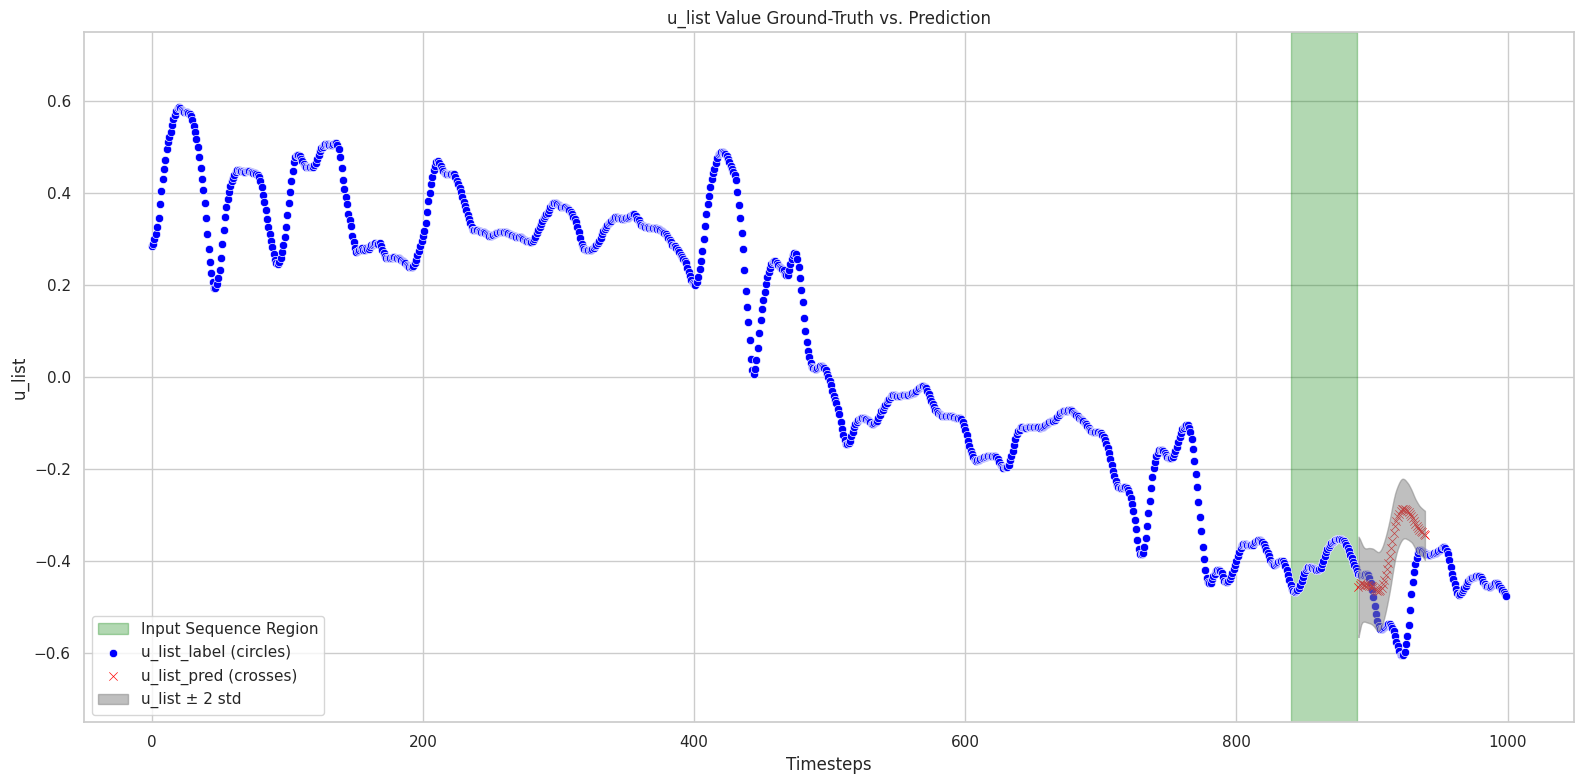

89it [00:14,  2.79it/s, single_test_loss=11.181977] 

Output Timestep 891
    Input Timesteps [887 886 885 888 884 883 889 882 890 881]
    Scores ['0.03232', '0.03218', '0.03145', '0.03101', '0.03054', '0.02920', '0.02881', '0.02815', '0.02769', '0.02689']

Output Timestep 892
    Input Timesteps [887 886 885 884 888 883 882 881 889 880]
    Scores ['0.03134', '0.03132', '0.03088', '0.03033', '0.02951', '0.02937', '0.02850', '0.02757', '0.02691', '0.02617']

Output Timestep 893
    Input Timesteps [886 885 887 884 883 882 881 888 880 879]
    Scores ['0.02946', '0.02930', '0.02924', '0.02912', '0.02860', '0.02804', '0.02752', '0.02691', '0.02656', '0.02598']

Output Timestep 894
    Input Timesteps [884 885 886 883 882 887 881 880 879 878]
    Scores ['0.02781', '0.02776', '0.02771', '0.02762', '0.02728', '0.02720', '0.02708', '0.02648', '0.02612', '0.02498']

Output Timestep 895
    Input Timesteps [883 884 885 882 881 886 880 879 887 878]
    Scores ['0.02676', '0.02673', '0.02655', '0.02651', '0.02647', '0.02634', '0.02608', '0.02588'

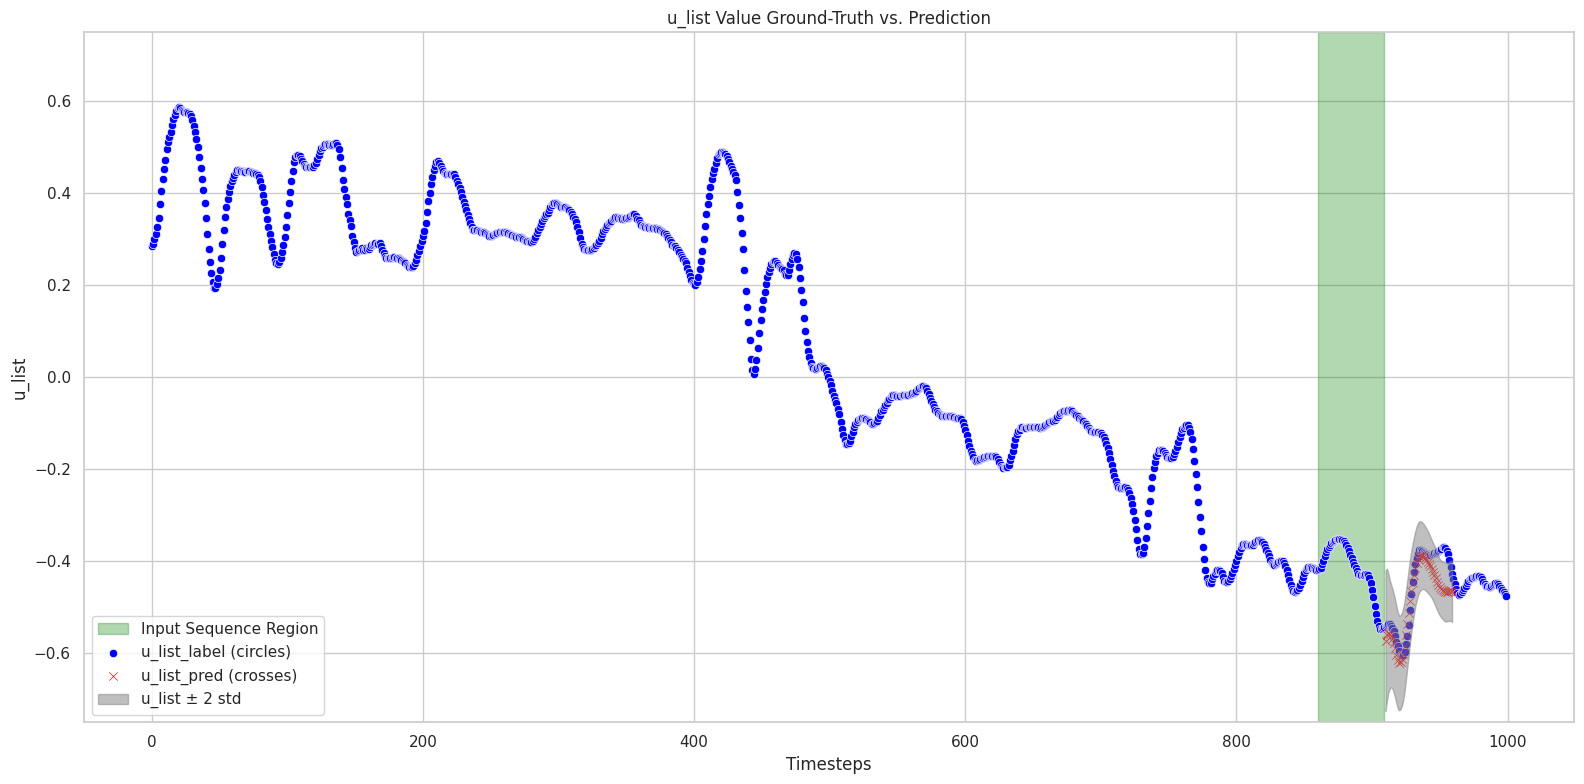

90it [00:14,  2.88it/s, single_test_loss=43.110882]

Output Timestep 911
    Input Timesteps [899 900 898 894 895 896 893 897 901 902]
    Scores ['0.02950', '0.02923', '0.02907', '0.02853', '0.02826', '0.02797', '0.02752', '0.02727', '0.02699', '0.02539']

Output Timestep 912
    Input Timesteps [899 898 900 894 895 896 897 893 901 902]
    Scores ['0.02840', '0.02819', '0.02803', '0.02772', '0.02738', '0.02735', '0.02670', '0.02619', '0.02608', '0.02459']

Output Timestep 913
    Input Timesteps [899 898 900 894 896 895 897 901 893 902]
    Scores ['0.02748', '0.02742', '0.02712', '0.02711', '0.02681', '0.02662', '0.02614', '0.02545', '0.02530', '0.02418']

Output Timestep 914
    Input Timesteps [898 899 894 896 900 895 897 901 893 891]
    Scores ['0.02673', '0.02664', '0.02649', '0.02629', '0.02626', '0.02595', '0.02565', '0.02482', '0.02468', '0.02398']

Output Timestep 915
    Input Timesteps [898 894 899 896 895 900 897 891 893 901]
    Scores ['0.02611', '0.02600', '0.02589', '0.02583', '0.02548', '0.02547', '0.02525', '0.02494'

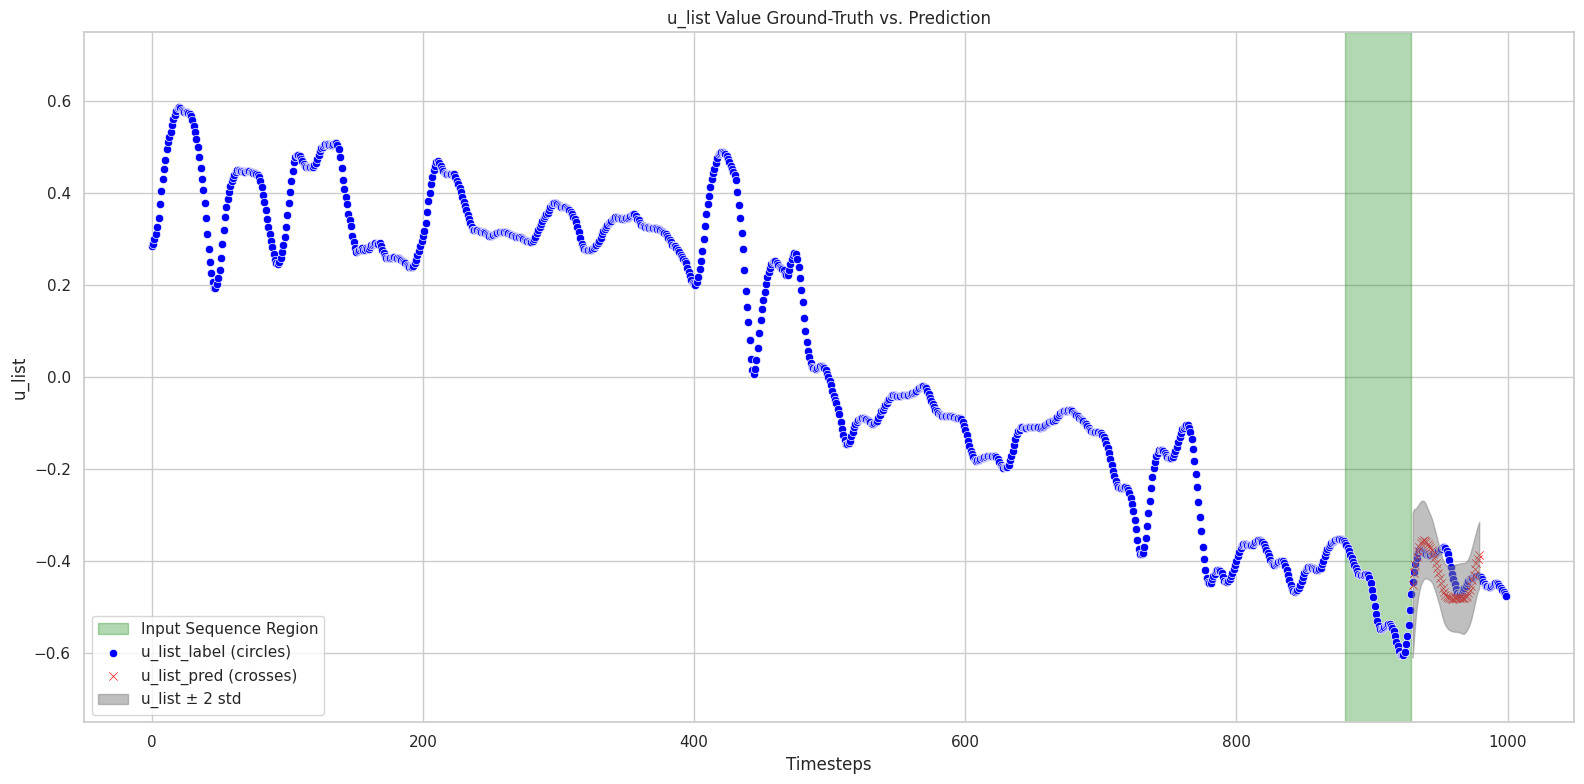

91it [00:14,  2.97it/s, single_test_loss=57.008175]

Output Timestep 931
    Input Timesteps [929 930 928 920 921 917 918 919 922 924]
    Scores ['0.03579', '0.03298', '0.03176', '0.03071', '0.03009', '0.02983', '0.02939', '0.02920', '0.02901', '0.02874']

Output Timestep 932
    Input Timesteps [929 930 917 918 919 920 928 916 921 922]
    Scores ['0.03289', '0.03149', '0.03017', '0.02974', '0.02946', '0.02929', '0.02825', '0.02816', '0.02796', '0.02734']

Output Timestep 933
    Input Timesteps [917 918 919 929 920 916 930 922 921 915]
    Scores ['0.02881', '0.02851', '0.02833', '0.02789', '0.02775', '0.02726', '0.02687', '0.02677', '0.02676', '0.02635']

Output Timestep 934
    Input Timesteps [917 918 919 922 924 920 923 916 925 921]
    Scores ['0.02675', '0.02649', '0.02635', '0.02624', '0.02599', '0.02583', '0.02580', '0.02571', '0.02571', '0.02555']

Output Timestep 935
    Input Timesteps [924 925 922 923 926 917 921 918 919 920]
    Scores ['0.02605', '0.02586', '0.02566', '0.02558', '0.02504', '0.02441', '0.02440', '0.02413'

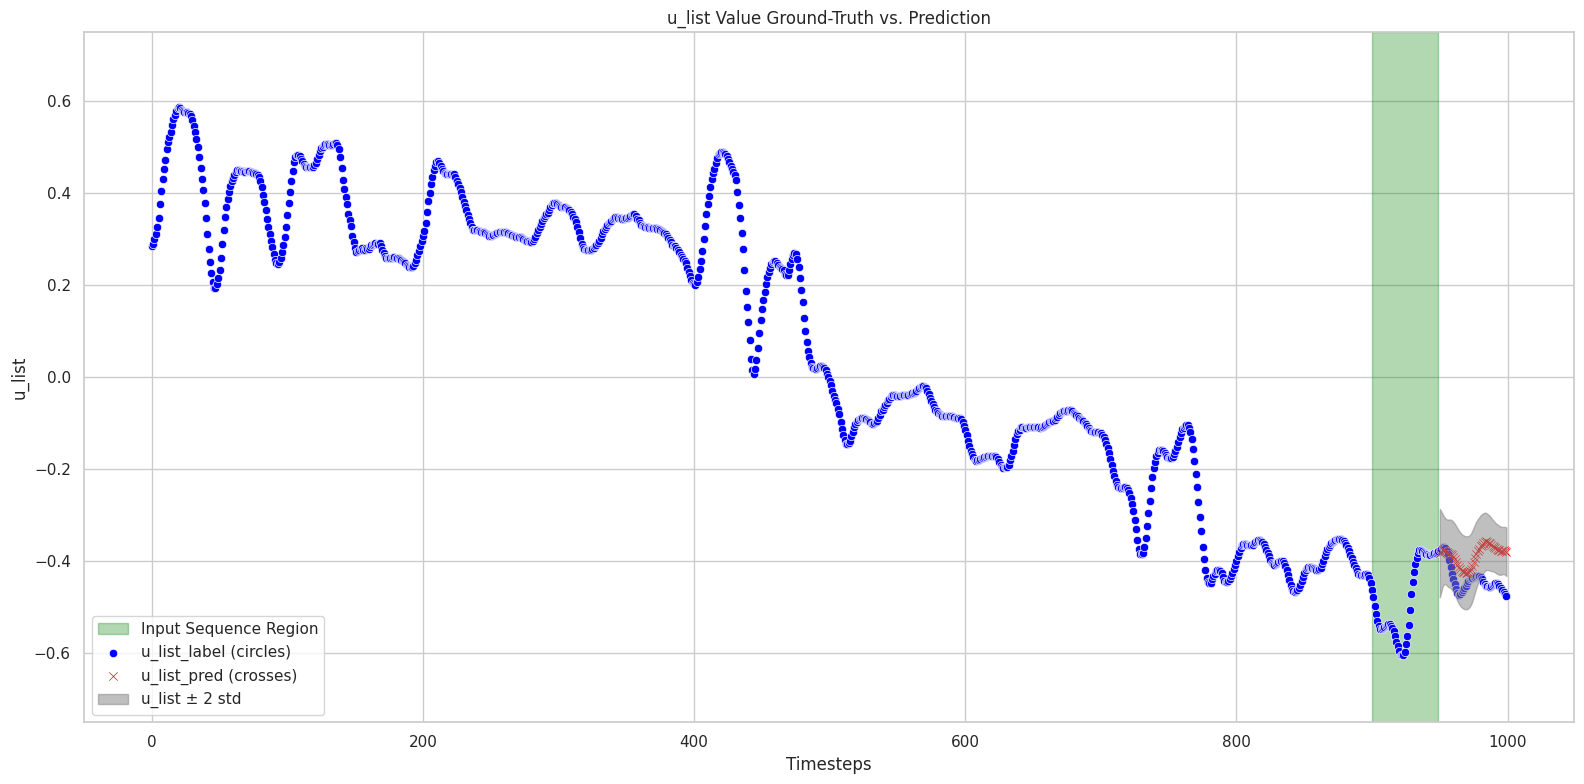

679it [00:14, 675.61it/s, single_test_loss=57.008175]

Output Timestep 951
    Input Timesteps [947 946 945 944 943 942 948 938 939 937]
    Scores ['0.02690', '0.02687', '0.02640', '0.02632', '0.02585', '0.02583', '0.02577', '0.02555', '0.02541', '0.02535']

Output Timestep 952
    Input Timesteps [946 947 944 945 943 942 941 938 939 940]
    Scores ['0.02704', '0.02688', '0.02688', '0.02687', '0.02653', '0.02647', '0.02583', '0.02568', '0.02564', '0.02552']

Output Timestep 953
    Input Timesteps [944 945 943 942 946 941 947 940 939 938]
    Scores ['0.02661', '0.02646', '0.02646', '0.02643', '0.02636', '0.02591', '0.02589', '0.02547', '0.02538', '0.02529']

Output Timestep 954
    Input Timesteps [942 944 943 945 941 946 940 939 938 947]
    Scores ['0.02585', '0.02579', '0.02578', '0.02553', '0.02551', '0.02530', '0.02504', '0.02481', '0.02465', '0.02450']

Output Timestep 955
    Input Timesteps [942 943 941 944 945 940 946 939 938 937]
    Scores ['0.02530', '0.02512', '0.02510', '0.02505', '0.02472', '0.02470', '0.02444', '0.02443'

5842it [00:16, 362.49it/s, single_test_loss=57.008175] 


In [ ]:
# IPYWIDGETS!!!!

test_loss = 0.0
test_progress_bar = tqdm(
    data_loader_test
)

criterion = torch.nn.GaussianNLLLoss(full = True)

num_label_features = len(label_features)

target_timeseries_idx = 1
feature = "u_list"
figure_range = 0.75

num_datapoints_per_timeseries = 1 + (num_single_sample_timesteps - (input_window_length + label_window_length) + 1) // window_stride

with torch.no_grad():
    for datapoint_idx, (batch_x, batch_y, x_labels) in enumerate(test_progress_bar):
        if(datapoint_idx >= target_timeseries_idx * num_datapoints_per_timeseries and datapoint_idx < (target_timeseries_idx + 1) * num_datapoints_per_timeseries):
            window_idx = datapoint_idx % num_datapoints_per_timeseries

            batch_x = batch_x.to(device)
            batch_y = batch_y.to(device)

            preds = autoregress(
                model = model,
                batch_x = batch_x,
                batch_y = batch_y,
                device = device,
                extract_attention = True
            )

            preds_mean, preds_var = preds[:, :, :num_label_features], preds[:, :, num_label_features:]
            
            loss = criterion(preds_mean, batch_y, preds_var)
            test_progress_bar.set_postfix({
                "single_test_loss": f"{loss.item():.6f}"
            })

            x = list(range(num_single_sample_timesteps))

            feature_idx = label_features.index(feature)

            feature_label = batch_y[0, :, feature_idx].cpu()
            feature_pred_mean = preds_mean[0, :, feature_idx].cpu()
            feature_pred_std = torch.sqrt(preds_var[0, :, feature_idx].cpu())
            feature_x_labels = x_labels[0, :, feature_idx]

            # feature_pred = (feature_pred * stats["std"][feature]) + stats["mean"][feature]
            # feature_label = (feature_label * stats["std"][feature]) + stats["mean"][feature]
            # feature_x_labels = (feature_x_labels * stats["std"][feature]) + stats["mean"][feature]
        
            feature_label = (feature_label * output_stats[window_idx, f"{feature}_std"]) + output_stats[window_idx, f"{feature}_mean"]
            feature_pred_mean = (feature_pred_mean * output_stats[window_idx, f"{feature}_std"]) + output_stats[window_idx, f"{feature}_mean"]
            feature_pred_std = feature_pred_std * output_stats[window_idx, f"{feature}_std"]
            # No normalization on x_labels in WindowedIterableDataset!

            sns.set_theme(style = "whitegrid")
            fig, ax = plt.subplots(figsize = (16, 8))
            ax.set_ylim(-figure_range, figure_range)

            # Input region
            ax.axvspan(
                x[window_idx * window_stride],
                x[window_idx * window_stride + input_window_length - 1],
                color = "green",
                alpha = 0.3,
                label = "Input Sequence Region"
            )

            # Label values
            sns.scatterplot(
                x = x,
                y = feature_x_labels,
                marker = "o",
                label = f"{feature}_label (circles)",
                color = "blue",
                ax = ax
            )

            # Pred values
            sns.scatterplot(
                x = x[(input_window_length + window_idx * window_stride):(input_window_length + window_idx * window_stride + label_window_length)],
                y = feature_pred_mean,
                marker = "x",
                label = f"{feature}_pred (crosses)",
                color = "red",
                ax = ax
            )
            ax.fill_between(
                x = x[(input_window_length + window_idx * window_stride):(input_window_length + window_idx * window_stride + label_window_length)],
                y1 = feature_pred_mean - 2 * feature_pred_std,
                y2 = feature_pred_mean + 2 * feature_pred_std,
                color = "gray",
                alpha = 0.5,
                label = f"{feature} ± 2 std"
            )

            ax.set_title(f"{feature} Value Ground-Truth vs. Prediction")
            ax.set_xlabel("Timesteps")
            ax.set_ylabel(feature)
            ax.legend()

            plt.tight_layout()
            plt.show()
            
            avg_attn_vals = model.get_average_attention_values()

            for i in range(20):                                      # First 20 predictions following input sequence 
                output_row = avg_attn_vals[i, :]
                top_k_indices = np.argsort(output_row)[::-1][:10]    # Top 10 highest attention input timesteps
                top_k_scores = output_row[top_k_indices]
                print(f"Output Timestep {input_window_length + window_idx * window_stride + i + 1}")
                print(f"    Input Timesteps {top_k_indices + (window_idx * window_stride + 1)}")
                print(f"    Scores {[f'{score:.5f}' for score in top_k_scores]}\n")
